# **Supervised Learning - Foundations Project: ReCell**

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.


### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.


### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

## Loading the dataset

In [ ]:
df= pd.read_csv('used_device_data.csv')
df.head()

brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
0               5.0        64.0  3.0   3020.0   146.0          2020   
1              16.0       128.0  8.0   4300.0   213.0          2020   
2               8.0       128.0  8.0   4200.0   213.0          2020   
3               8.0        64.0  6.0   7250.0   480.0          2020   
4               8.0        64.0  3.0   5000.0   185.0          2020   

   days_used  normalized_used_price  normalized_new_price  
0        127               4.307572              4.715100  
1        325               5.162097              5.519018  
2        162               5.111084              5.884631  
3        345               5.135387              5.630961  
4        293               4.389995              4.947837

## Data Overview

- Observations
- Sanity checks

In [ ]:
df2= df.copy()

In [ ]:
df.shape

(3454, 15)

The dataset has 3,454 rows and 15 columns.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

The dataset contains:

* 4 object columns

* 9 float columns

* 2 Int columns.

In [ ]:
df.describe().T

count         mean          std          min  \
screen_size            3454.0    13.713115     3.805280     5.080000   
main_camera_mp         3275.0     9.460208     4.815461     0.080000   
selfie_camera_mp       3452.0     6.554229     6.970372     0.000000   
int_memory             3450.0    54.573099    84.972371     0.010000   
ram                    3450.0     4.036122     1.365105     0.020000   
battery                3448.0  3133.402697  1299.682844   500.000000   
weight                 3447.0   182.751871    88.413228    69.000000   
release_year           3454.0  2015.965258     2.298455  2013.000000   
days_used              3454.0   674.869716   248.580166    91.000000   
normalized_used_price  3454.0     4.364712     0.588914     1.536867   
normalized_new_price   3454.0     5.233107     0.683637     2.901422   

                               25%          50%          75%          max  
screen_size              12.700000    12.830000    15.340000    30.710000  
main_camera_mp            5.000000     8.000000    13.000000    48.000000  
selfie_camera_mp          2.000000     5.000000     8.000000    32.000000  
int_memory               16.000000    32.000000    64.000000  1024.000000  
ram                       4.000000     4.000000     4.000000    12.000000  
battery                2100.000000  3000.000000  4000.000000  9720.000000  
weight                  142.000000   160.000000   185.000000   855.000000  
release_year           2014.000000  2015.500000  2018.000000  2020.000000  
days_used               533.500000   690.500000   868.750000  1094.000000  
normalized_used_price     4.033931     4.405133     4.755700     6.619433  
normalized_new_price      4.790342     5.245892     5.673718     7.847841

Observations:

Normalized used price;

- Mean: 4.36, Min: 1.54, Max: 6.61

- Median: 4.41 suggests a slightly symmetric distribution

Normalized_new_price:

- Mean: 5.23, Max: 7.84

Potential Outliers:

- Battery = 9720, weight = 855g, screen_size = 30.71



In [ ]:
df.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

Observations:

- main_camera_mp - 179

- selfie_camera_mp - 2

- int_memory - 4

- ram - 4

- battery - 6

- weight - 7

In [ ]:
df['main_camera_mp'].value_counts( dropna=False)

main_camera_mp
13.00    1035
8.00      755
5.00      546
12.00     189
NaN       179
2.00      171
16.00     154
3.15      122
0.30       69
10.50      30
1.30       26
21.00      19
23.00      19
20.70      16
14.50      13
20.00      13
12.20      12
4.00       10
12.30       9
19.00       8
8.10        7
13.10       6
10.00       6
24.00       5
3.00        5
48.00       4
6.70        4
6.50        4
12.50       4
21.20       2
20.20       1
18.00       1
1.00        1
0.08        1
12.60       1
20.10       1
41.00       1
16.30       1
21.50       1
22.60       1
1.20        1
22.50       1
Name: count, dtype: int64

In [ ]:
df.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df['4g'].value_counts( dropna=False)

4g
yes    2335
no     1119
Name: count, dtype: int64

In [ ]:
df['5g'].value_counts( dropna=False)

5g
no     3302
yes     152
Name: count, dtype: int64

In [ ]:
df['brand_name'].nunique()

34

In [ ]:
df['brand_name'].value_counts( dropna=False)

brand_name
Others        502
Samsung       341
Huawei        251
LG            201
Lenovo        171
ZTE           140
Xiaomi        132
Oppo          129
Asus          122
Alcatel       121
Micromax      117
Vivo          117
Honor         116
HTC           110
Nokia         106
Motorola      106
Sony           86
Meizu          62
Gionee         56
Acer           51
XOLO           49
Panasonic      47
Realme         41
Apple          39
Lava           36
Celkon         33
Spice          30
Karbonn        29
BlackBerry     22
OnePlus        22
Microsoft      22
Coolpad        22
Google         15
Infinix        10
Name: count, dtype: int64

## Exploratory Data Analysis (EDA)

### Questions

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

**1- What does the distribution of normalized used device prices look like?**


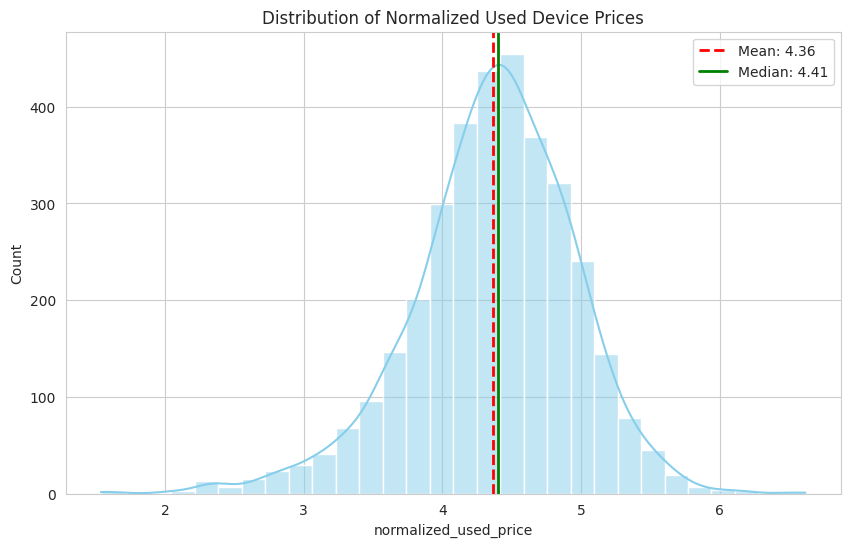

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

# Plot histogram with KDE
sns.histplot(df['normalized_used_price'], bins=30, kde=True, color='skyblue')

# Calculate mean and median
mean_val = df['normalized_used_price'].mean()
median_val = df['normalized_used_price'].median()

# Add mean line
plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')

# Add median line
plt.axvline(median_val, color='green', linestyle='-', linewidth=2, label=f'Median: {median_val:.2f}')

# Customize plot
plt.title("Distribution of Normalized Used Device Prices")
plt.xlabel("normalized_used_price")
plt.ylabel("Count")
plt.legend()

# Show plot
plt.show()

Observations:
The distribution appears approximately normal with a slight right skew, mean and median are close to each other.

**2 -What percentage of the used device market is dominated by Android devices?**

In [ ]:
#2 -What percentage of the used device market is dominated by Android devices?
android_percentage= df[df['os']== 'Android'].shape[0] / df.shape[0]*100
print(f"Percentage of Android devices: {android_percentage:.2f}%")

Percentage of Android devices: 93.05%


In [ ]:
df['os'].value_counts( dropna=False)

os
Android    3214
Others      137
Windows      67
iOS          36
Name: count, dtype: int64

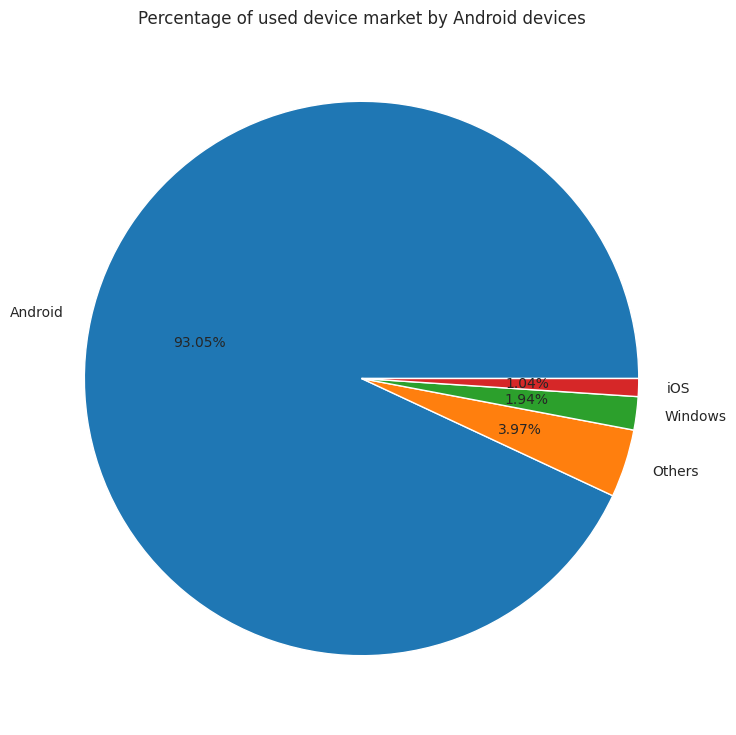

In [ ]:
#plotting the % of the used device market by Android devices

plt.figure(figsize=(15, 9))
plt.pie(df['os'].value_counts(), labels=df['os'].value_counts().index, autopct='%1.2f%%')
plt.title('Percentage of used device market by Android devices')
plt.show()




Observations:

Percentage of Android devices: 93.05% dominating the market of used device.

**3 - The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?**

In [ ]:
#3 - The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
df.groupby('brand_name')['ram'].describe()

count      mean       std   min   25%   50%  75%   max
brand_name                                                        
Acer         51.0  3.901961  0.500196  1.00  4.00  4.00  4.0   4.0
Alcatel     121.0  3.407025  1.263730  0.25  4.00  4.00  4.0   4.0
Apple        39.0  4.000000  0.606977  2.00  4.00  4.00  4.0   6.0
Asus        122.0  4.049180  0.600997  2.00  4.00  4.00  4.0   8.0
BlackBerry   22.0  3.829545  0.799503  0.25  4.00  4.00  4.0   4.0
Celkon       33.0  1.613636  1.831891  0.25  0.25  0.25  4.0   4.0
Coolpad      22.0  3.954545  0.213201  3.00  4.00  4.00  4.0   4.0
Gionee       56.0  3.933036  0.501115  0.25  4.00  4.00  4.0   4.0
Google       15.0  4.533333  0.915475  4.00  4.00  4.00  5.0   6.0
HTC         110.0  4.000000  0.331801  3.00  4.00  4.00  4.0   6.0
Honor       116.0  4.603448  1.625232  2.00  4.00  4.00  6.0   8.0
Huawei      251.0  4.655378  1.595387  0.25  4.00  4.00  4.0  12.0
Infinix      10.0  2.600000  0.843274  2.00  2.00  2.00  3.0   4.0
Karbonn      29.0  3.353448  1.441597  0.25  4.00  4.00  4.0   4.0
LG          201.0  3.936567  1.076461  0.25  4.00  4.00  4.0   8.0
Lava         36.0  3.277778  1.413933  0.25  4.00  4.00  4.0   4.0
Lenovo      171.0  3.885965  0.774222  0.25  4.00  4.00  4.0   6.0
Meizu        62.0  4.451613  1.223773  2.00  4.00  4.00  4.0   8.0
Micromax    117.0  3.679487  1.052934  0.25  4.00  4.00  4.0   4.0
Microsoft    22.0  4.000000  0.000000  4.00  4.00  4.00  4.0   4.0
Motorola    106.0  3.943396  1.329735  2.00  4.00  4.00  4.0  12.0
Nokia       102.0  2.420294  1.889325  0.02  0.03  4.00  4.0   6.0
OnePlus      22.0  6.363636  2.592029  4.00  4.00  6.00  8.0  12.0
Oppo        129.0  4.961240  2.122804  1.00  4.00  4.00  6.0  12.0
Others      502.0  3.777888  1.015827  0.25  4.00  4.00  4.0   8.0
Panasonic    47.0  4.000000  0.000000  4.00  4.00  4.00  4.0   4.0
Realme       41.0  4.195122  1.327018  2.00  3.00  4.00  6.0   6.0
Samsung     341.0  4.199413  1.377140  0.25  4.00  4.00  4.0  12.0
Sony         86.0  4.069767  0.479968  4.00  4.00  4.00  4.0   8.0
Spice        30.0  3.750000  0.951405  0.25  4.00  4.00  4.0   4.0
Vivo        117.0  4.756410  1.638196  0.50  4.00  4.00  4.0   8.0
XOLO         49.0  4.000000  0.000000  4.00  4.00  4.00  4.0   4.0
Xiaomi      132.0  4.583333  1.508458  2.00  4.00  4.00  4.0  12.0
ZTE         140.0  4.023214  0.909530  0.25  4.00  4.00  4.0   8.0

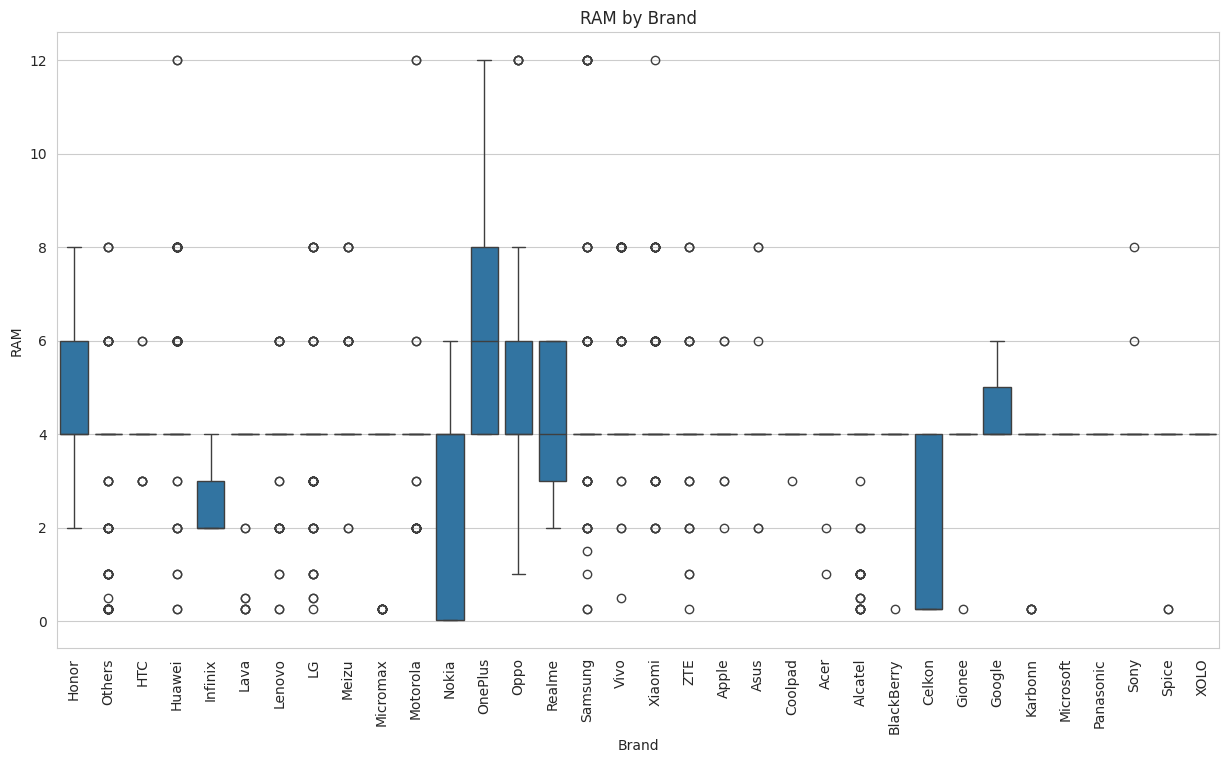

In [ ]:
#boxplot to check how does the amount of ram vary within the brands
plt.figure(figsize=(15, 8))
sns.boxplot(data=df, x='brand_name', y='ram')
plt.title('RAM by Brand')
plt.xlabel('Brand')
plt.ylabel('RAM')
plt.xticks(rotation=90)
plt.show()

Observations:

How does the amount of RAM vary with the brand:

- Nokia, OnePlus, Oppo, and Realme show high variability in RAM, suggesting
  these brands offer a wide range of models from low to high specs.

- Brands like Infinix, Gionee, Karbonn, Celkon, and Micromax have a tight  
  interquartile range, indicating consistency in RAM offerings, mostly in the low to mid range (2–4 GB).

- Celkon and BlackBerry have very low median RAM values, with several models
  offering just 0.5 to 2 GB, indicating older or low-end models.

-  Outliers (small dots) are present in almost all brands.

**4- How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?**

In [ ]:
#4. A large battery often increases a device's weight,
# making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
df[df['battery']>4500]['weight'].describe()

count    341.000000
mean     332.275660
std      155.501832
min      118.000000
25%      198.000000
50%      300.000000
75%      467.000000
max      855.000000
Name: weight, dtype: float64

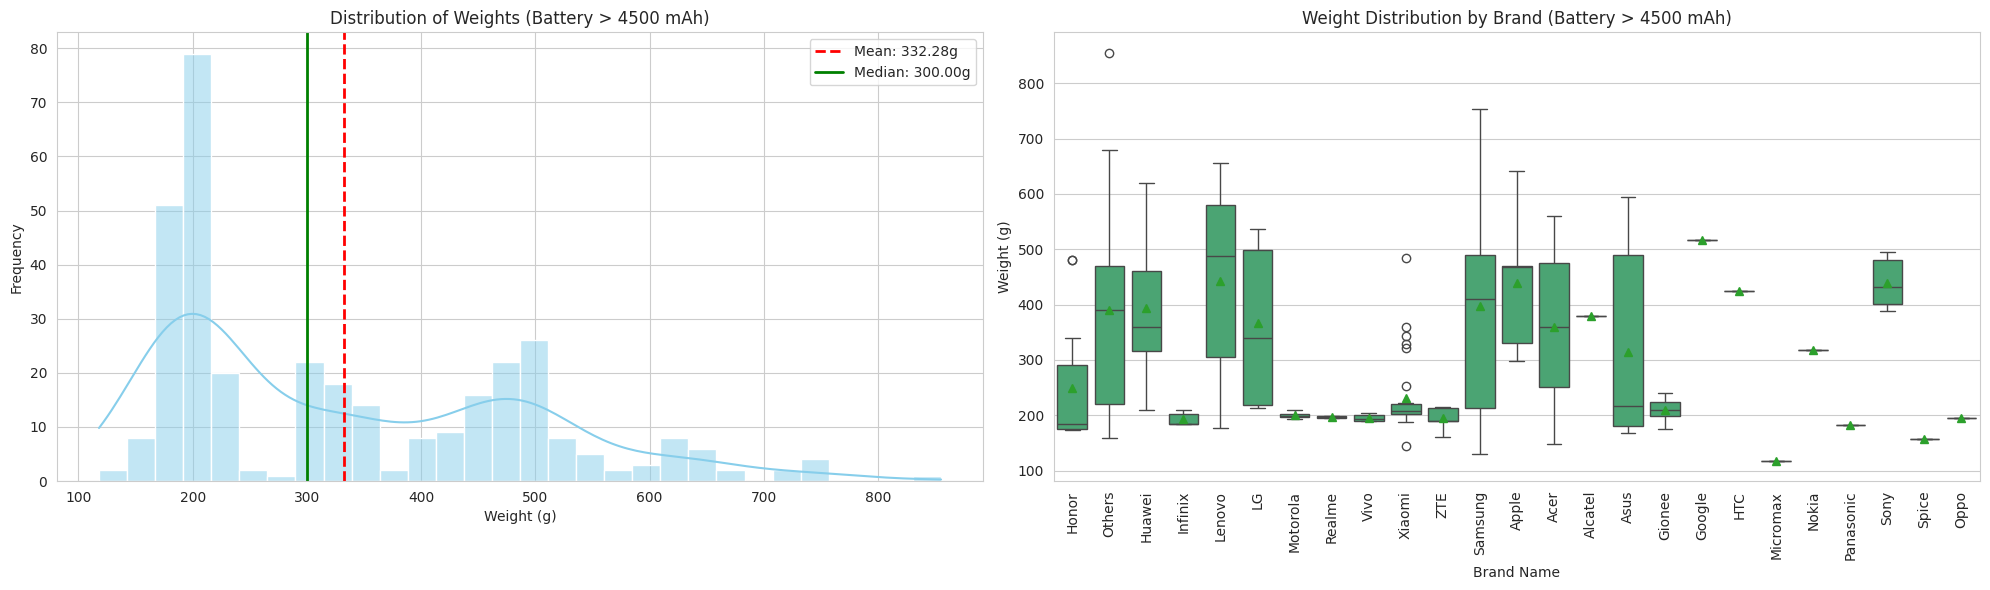

In [ ]:
# Filtered data: devices with battery > 4500 mAh
df_large_battery = df[df['battery'] > 4500]
weights = df_large_battery['weight']

# Calculate mean and median
mean_weight = weights.mean()
median_weight = weights.median()

# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# --- Plot 1: Histogram with KDE and mean/median lines ---
sns.histplot(weights, bins=30, kde=True, color='skyblue', ax=axes[0])
axes[0].axvline(mean_weight, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_weight:.2f}g')
axes[0].axvline(median_weight, color='green', linestyle='-', linewidth=2, label=f'Median: {median_weight:.2f}g')
axes[0].set_title("Distribution of Weights (Battery > 4500 mAh)")
axes[0].set_xlabel("Weight (g)")
axes[0].set_ylabel("Frequency")
axes[0].legend()

# --- Plot 2: Boxplot of weight by brand ---
sns.boxplot(data=df_large_battery, x="brand_name", y="weight", color='mediumseagreen', showmeans=True, ax=axes[1])
axes[1].set_title("Weight Distribution by Brand (Battery > 4500 mAh)")
axes[1].set_xlabel("Brand Name")
axes[1].set_ylabel("Weight (g)")
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

Observations:

How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)

- A large battery > 4500 mah tends to increase a device's weight, the
  distribution shows a bimodal shape.

- One cluster of devices weights around 170-300g, while another falls between
  400-500g, indicating that some manufactures are able to deliver higher battery
  capacity without increasing weight significantly.

- The average weight of phones with batteries > 4500 mah is 332.27

- Samsung, LG, Apple, Acer, ZTE: Show higher median weights and wide
  variability. These brands likely offer both phones and tablets or premium metal-body phones.

- Brands like Realme, Xiaomi, HTC, Micromax, Oppo show low weight with minimal
  variability, indicating standardized and lightweight designs  

**5- How many phones and tablets are available across different brands with a screen size larger than 6 inches?**

In [ ]:
screen_size_threshold = 15.24  # 6 inches in cm

# Filter devices with screen size > 6 inches (15.24 cm)
large_screen_devices = df[df['screen_size'] > screen_size_threshold]

# Count devices by brand
brand_counts = large_screen_devices['brand_name'].value_counts().reset_index()
brand_counts.columns = ['Brand', 'Count']

# Sort by count (descending)
brand_counts = brand_counts.sort_values('Count', ascending=False)



In [ ]:
# Display the result
print("Number of devices with screen size > 6 inches (15.24 cm) per brand:")
print(brand_counts)

Number of devices with screen size > 6 inches (15.24 cm) per brand:
        Brand  Count
0      Huawei    149
1     Samsung    119
2      Others     99
3        Vivo     80
4       Honor     72
5        Oppo     70
6      Lenovo     69
7      Xiaomi     69
8          LG     59
9    Motorola     42
10       Asus     41
11     Realme     40
12    Alcatel     26
13      Apple     24
14       Acer     19
15      Meizu     17
16        ZTE     17
17    OnePlus     16
18      Nokia     15
19       Sony     12
20    Infinix     10
21        HTC      7
22   Micromax      7
23     Google      4
24    Coolpad      3
25     Gionee      3
26       XOLO      3
27  Panasonic      2
28    Karbonn      2
29      Spice      2
30  Microsoft      1


In [ ]:
# Get TOTAL count of large-screen devices
total_large_screen = len(large_screen_devices)
print(f"Total devices with screen size > 6 inches (15.24 cm): {total_large_screen}\n")

Total devices with screen size > 6 inches (15.24 cm): 1099



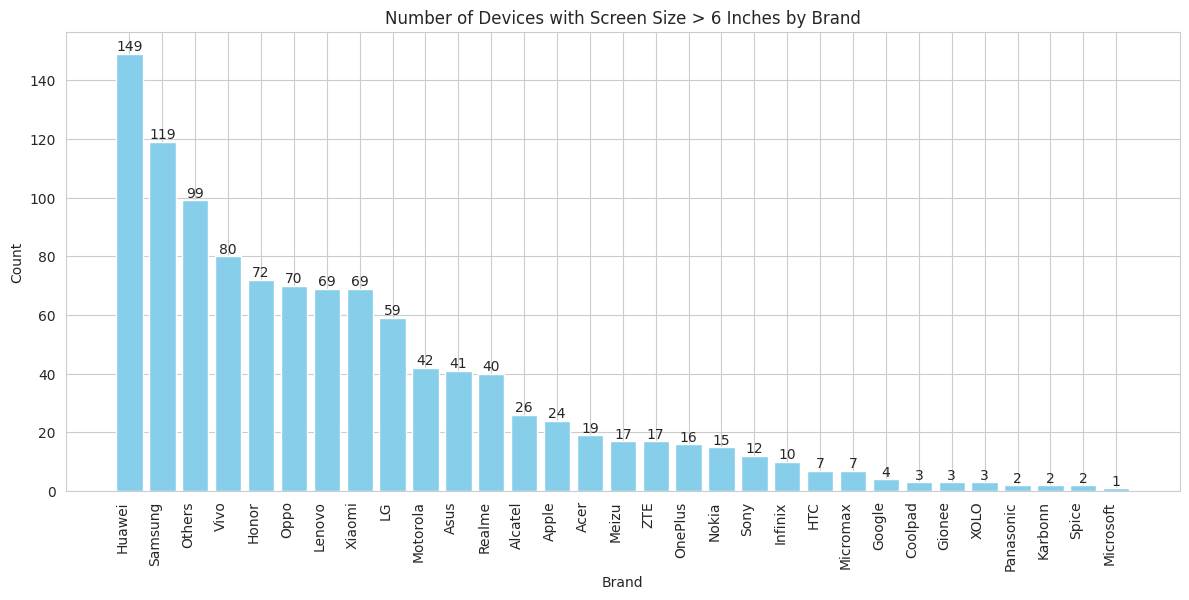

In [ ]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.bar(brand_counts['Brand'], brand_counts['Count'], color='skyblue')
plt.title('Number of Devices with Screen Size > 6 Inches by Brand')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.xticks(rotation=90)

#adding label
for i, count in enumerate(brand_counts['Count']):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.show()

Observations:

Total devices with screen size > 6 inches (15.24 cm): **1099**

Number of devices with screen size > 6 inches (15.24 cm) per brand:

item  Brand    Count
        
0      Huawei    149

1     Samsung    119

2      Others     99

3        Vivo     80

4       Honor     72

5        Oppo     70

6      Lenovo     69

7      Xiaomi     69

8          LG     59

9    Motorola     42

10       Asus     41

11     Realme     40

12    Alcatel     26

13      Apple     24

14       Acer     19

15      Meizu     17

16        ZTE     17

17    OnePlus     16

18      Nokia     15

19       Sony     12

20    Infinix     10

21        HTC      7

22   Micromax      7

23     Google      4

24    Coolpad      3

25     Gionee      3

26       XOLO      3

27  Panasonic      2

28    Karbonn      2

29      Spice      2

30  Microsoft      1



**6- What is the distribution of devices offering greater than 8MP selfie cameras across brands?**

In [ ]:
#6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones.
# What is the distribution of devices offering greater than 8MP selfie cameras across brands?
df[df['selfie_camera_mp']>8].groupby('brand_name').size()

brand_name
Acer           1
Asus           6
BlackBerry     2
Coolpad        3
Gionee         4
HTC           20
Honor         41
Huawei        87
Infinix        4
LG            32
Lenovo        14
Meizu         24
Micromax       2
Motorola      26
Nokia         10
OnePlus       18
Oppo          75
Others        34
Panasonic      2
Realme        18
Samsung       57
Sony          14
Vivo          78
Xiaomi        63
ZTE           20
dtype: int64

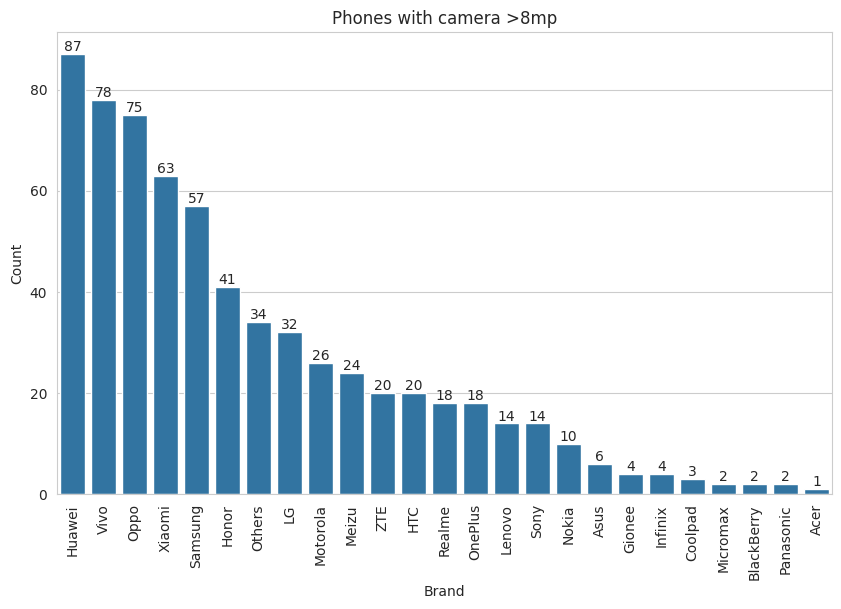

In [ ]:
#plottingphones with camera >8mp sorted values
plt.figure(figsize=(10, 6))
sns.countplot(data=df[df['selfie_camera_mp']>8], x='brand_name', order=df[df['selfie_camera_mp']>8].groupby('brand_name').size().sort_values(ascending=False).index)
plt.title('Phones with camera >8mp')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=90)

#adding labels
for i, count in enumerate(df[df['selfie_camera_mp']>8].groupby('brand_name').size().sort_values(ascending=False)):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()


Observations:

The distribution of devices offering greater than 8MP selfie cameras across brands:

- Brands like Huawei (87), Vivo (78), Oppo (75), and Xiaomi (63) offer the
  highest number of devices with selfie cameras greater than 8MP.

**7- Which attributes are highly correlated with the normalized price of a used device?**

In [ ]:
#7 Which attributes are highly correlated with the normalized price of a used device?
df.corr(numeric_only=True)['normalized_used_price'].sort_values(ascending=False)

normalized_used_price    1.000000
normalized_new_price     0.834496
screen_size              0.614785
battery                  0.613619
selfie_camera_mp         0.608074
main_camera_mp           0.587302
ram                      0.520289
release_year             0.509790
weight                   0.382354
int_memory               0.190993
days_used               -0.358264
Name: normalized_used_price, dtype: float64

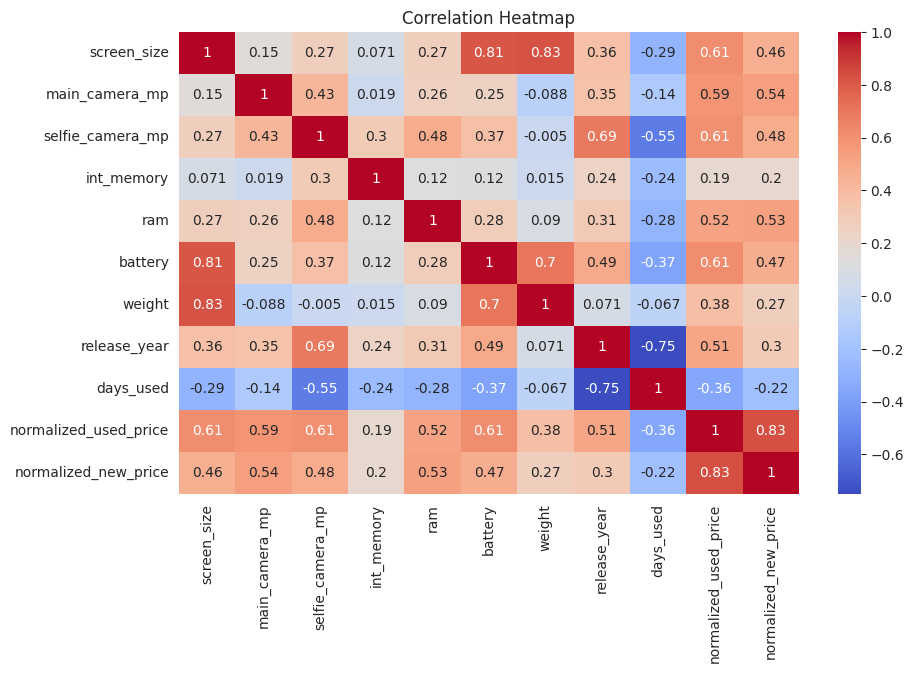

In [ ]:
#plotting the correlation for normalized used price
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Observations:

Attributes are highly correlated with the normalized price of a used device:

**Top 5 positively correlated numerical features:**

Feature	Correlation

- normalized_new_price	0.83

- screen_size	          0.61

- battery	              0.61

- selfie_camera_mp	    0.61

- main_camera_mp	      0.59

**Negative correlated:**

- Days used            -0.36

### **Exploratory Data Analysis (EDA)**


In [ ]:

def histogram_boxplot(
    data, feature, figsize=(15, 10), kde=False, bins=None, style="whitegrid", title=None
):
    """
    Draws a boxplot and histogram for a given feature in the dataset.

    Parameters:
    - data: pandas DataFrame
    - feature: column name (string)
    - figsize: tuple of (width, height) in inches
    - kde: whether to show Kernel Density Estimation on histogram
    - bins: number of bins for histogram (optional)
    - style: seaborn style (default: 'whitegrid')
    - title: title for the histogram plot
    """
    # Set seaborn style
    sns.set_style(style)

    # Clean missing values
    feature_data = data[feature].dropna()

    # Create subplots
    fig, (ax_box, ax_hist) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize
    )

    # Boxplot
    sns.boxplot(x=feature_data, ax=ax_box, showmeans=True, color="skyblue")
    ax_box.set(xlabel="")

    # Histogram
    sns.histplot(x=feature_data, kde=kde, bins=bins, ax=ax_hist, color="steelblue", edgecolor="black")

    # Mean and Median lines
    ax_hist.axvline(feature_data.mean(), color="green", linestyle="--", label="Mean")
    ax_hist.axvline(feature_data.median(), color="red", linestyle="-", label="Median")

    # Titles and labels
    ax_hist.set_title(title or f"Histogram and Boxplot of '{feature}'", fontsize=14)
    ax_hist.set_xlabel(feature)
    ax_hist.set_ylabel("Frequency")
    ax_hist.legend()

    # Tidy up
    plt.tight_layout()
    plt.show()


In [ ]:
df.columns

Index(['brand_name', 'os', 'screen_size', '4g', '5g', 'main_camera_mp',
       'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight',
       'release_year', 'days_used', 'normalized_used_price',
       'normalized_new_price'],
      dtype='object')

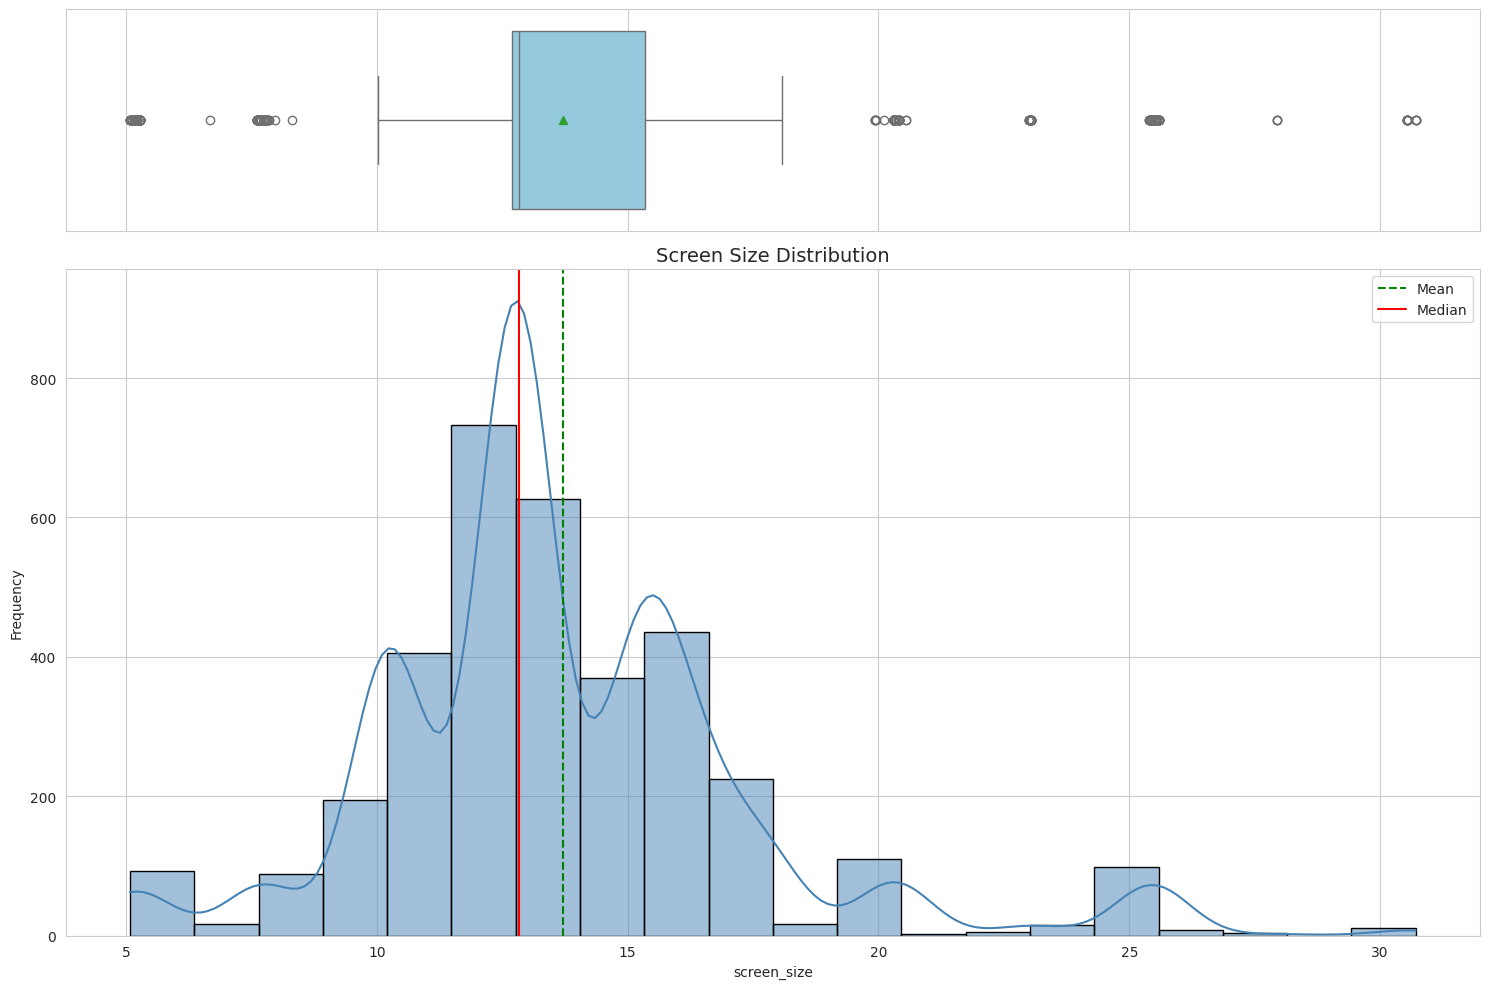

In [ ]:
histogram_boxplot(df,'screen_size',kde=True, bins=20, title="Screen Size Distribution")

Observations:

The histogram shows a right- skewed distributio.

The boxplot indicates the presence of multiple end outliers.

Most values are conentrated below 18 inches.

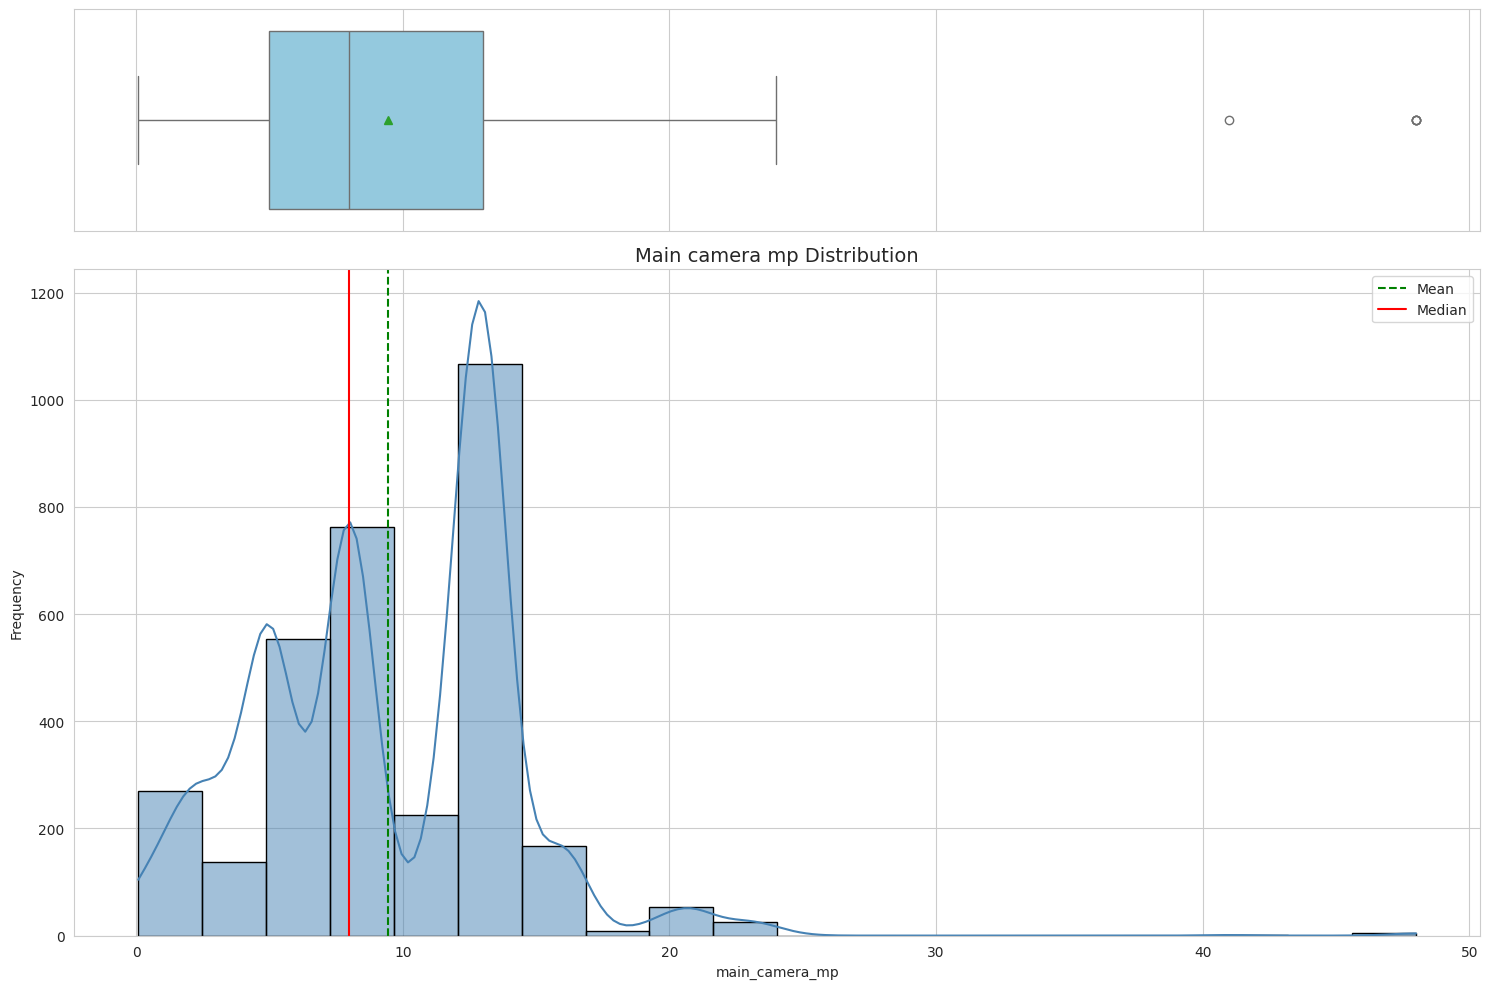

In [ ]:
histogram_boxplot(df,'main_camera_mp',kde=True, bins=20, title="Main camera mp Distribution")

Observations:
- The distribution is right skewed.

- Median is lower than the mean.

- The boxplot shows outliers.



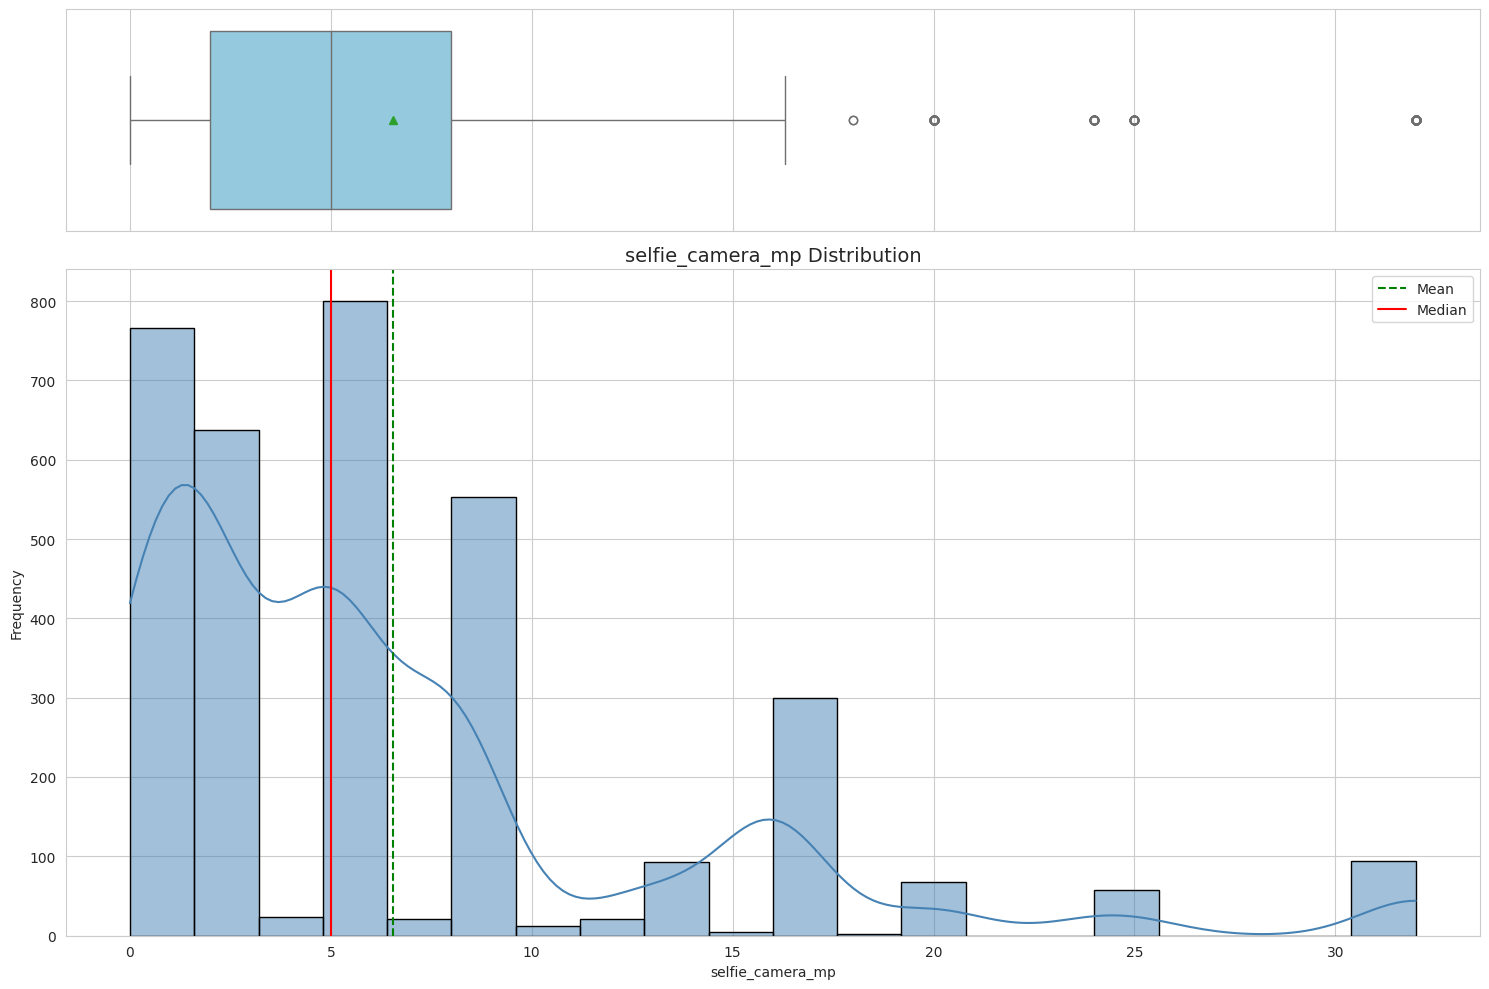

In [ ]:
histogram_boxplot(df,'selfie_camera_mp',kde=True, bins=20, title="selfie_camera_mp Distribution")

Observations:

- The distribution is right skewed.

- Median is lower than the mean.

- Boxplot shows outlier in the end.

- Most commom selfie camera is around 5 MP.

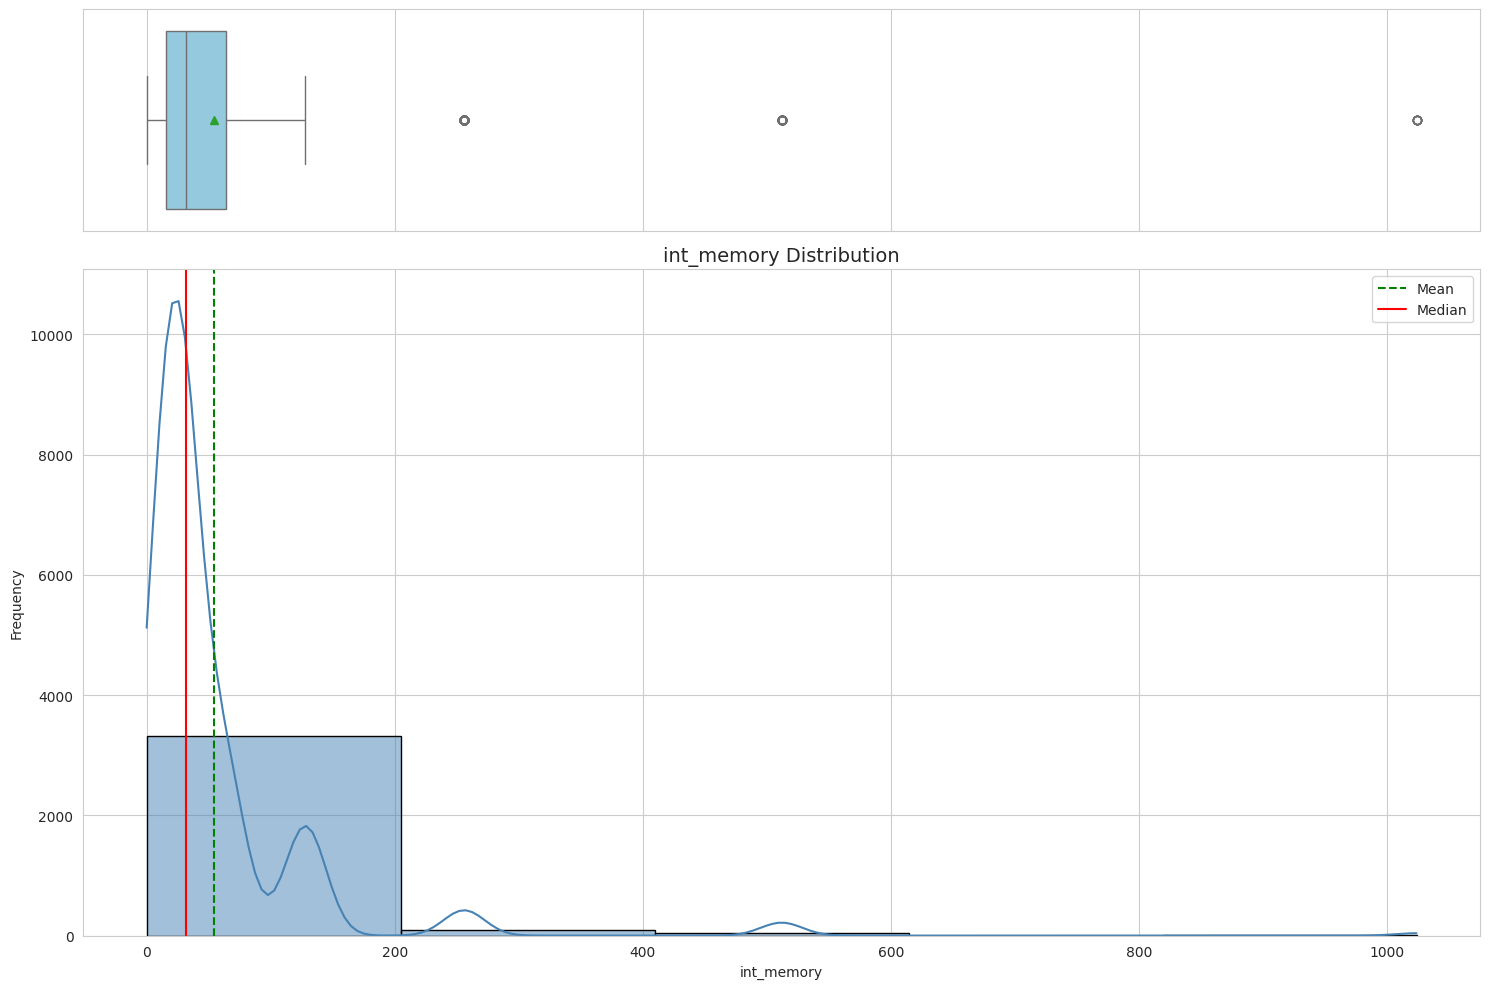

In [ ]:
histogram_boxplot(df,'int_memory',kde=True, bins=5, title="int_memory Distribution")

Observations:

- The distribution is right skewed.

- Median is lower than the mean.

- Boxplot shows outlier beyond 256 GB reaching up to 1030 GB

- Most commom Int memory  is around 128 GB.

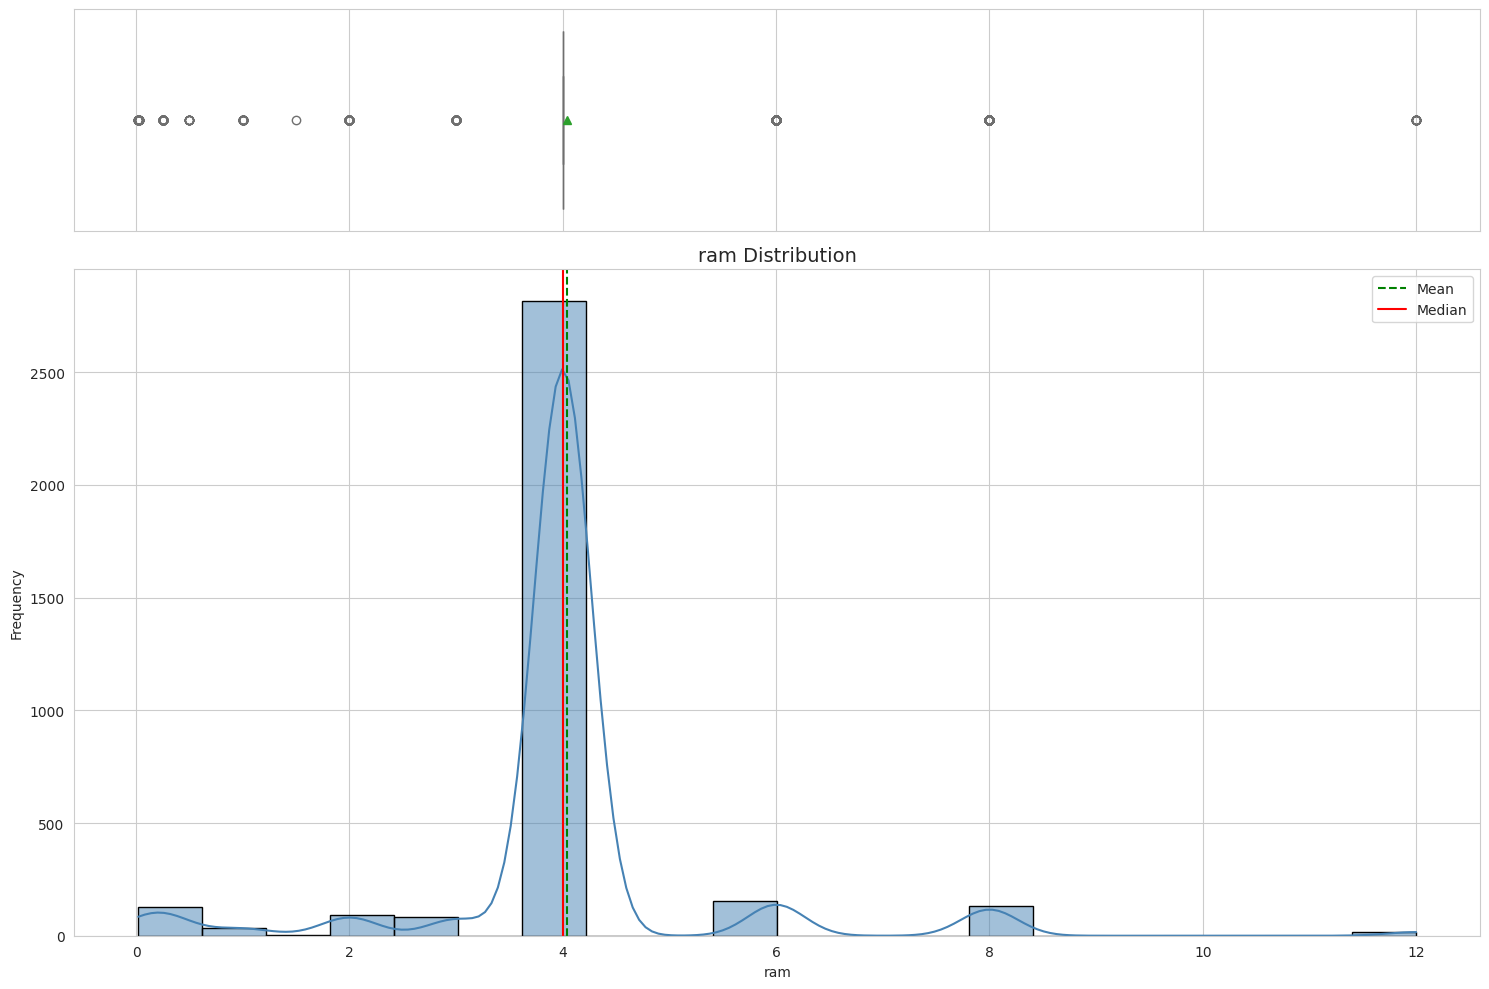

In [ ]:
histogram_boxplot(df,'ram',kde=True, bins=20, title="ram Distribution")

Observations:

- The distribution is right skewed.

- Median, Mode and Mean are almost aligned around 4 GB of ram.

- Devices with RAM at 0 GB, 1 GB, 2 GB, 6 GB, 8 GB, 10 GB, and 12 GB are
  statistical outliers

- Nearly all RAM values cluster around 4 GB.

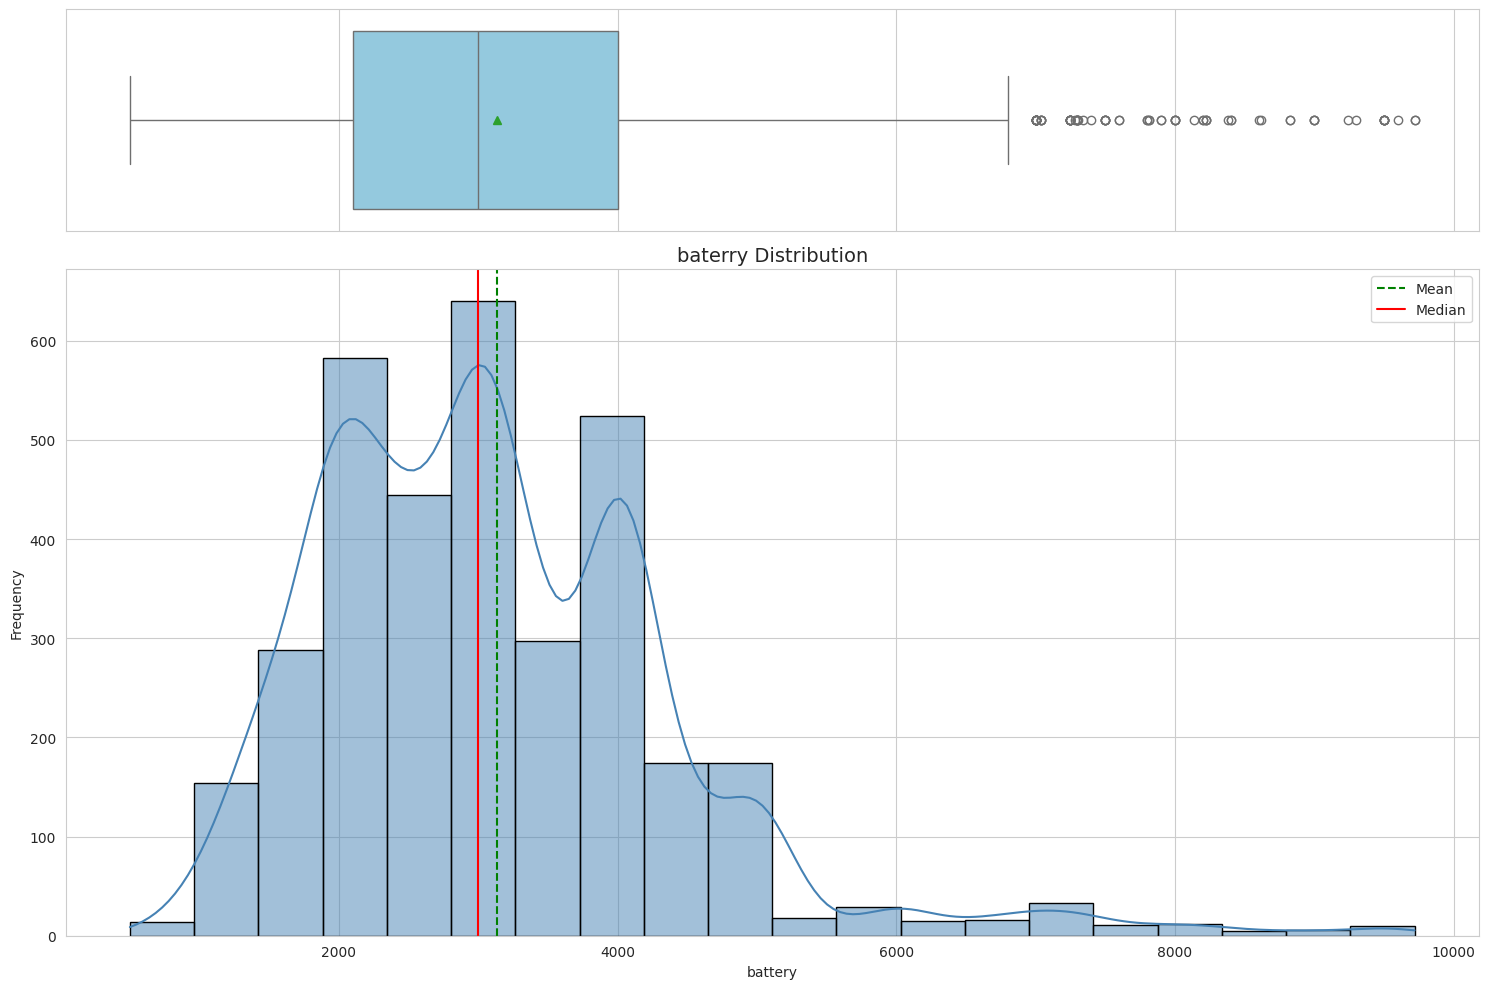

In [ ]:
histogram_boxplot(df,'battery',kde=True, bins=20, title="baterry Distribution")

Observations:

- The distribution is right skewed.

- Median is lower than the mean.

- Boxplot shows outlier beyond 6000 mah.

- Most commom battery capacity are concentrated in the 3000-4500 mah range.

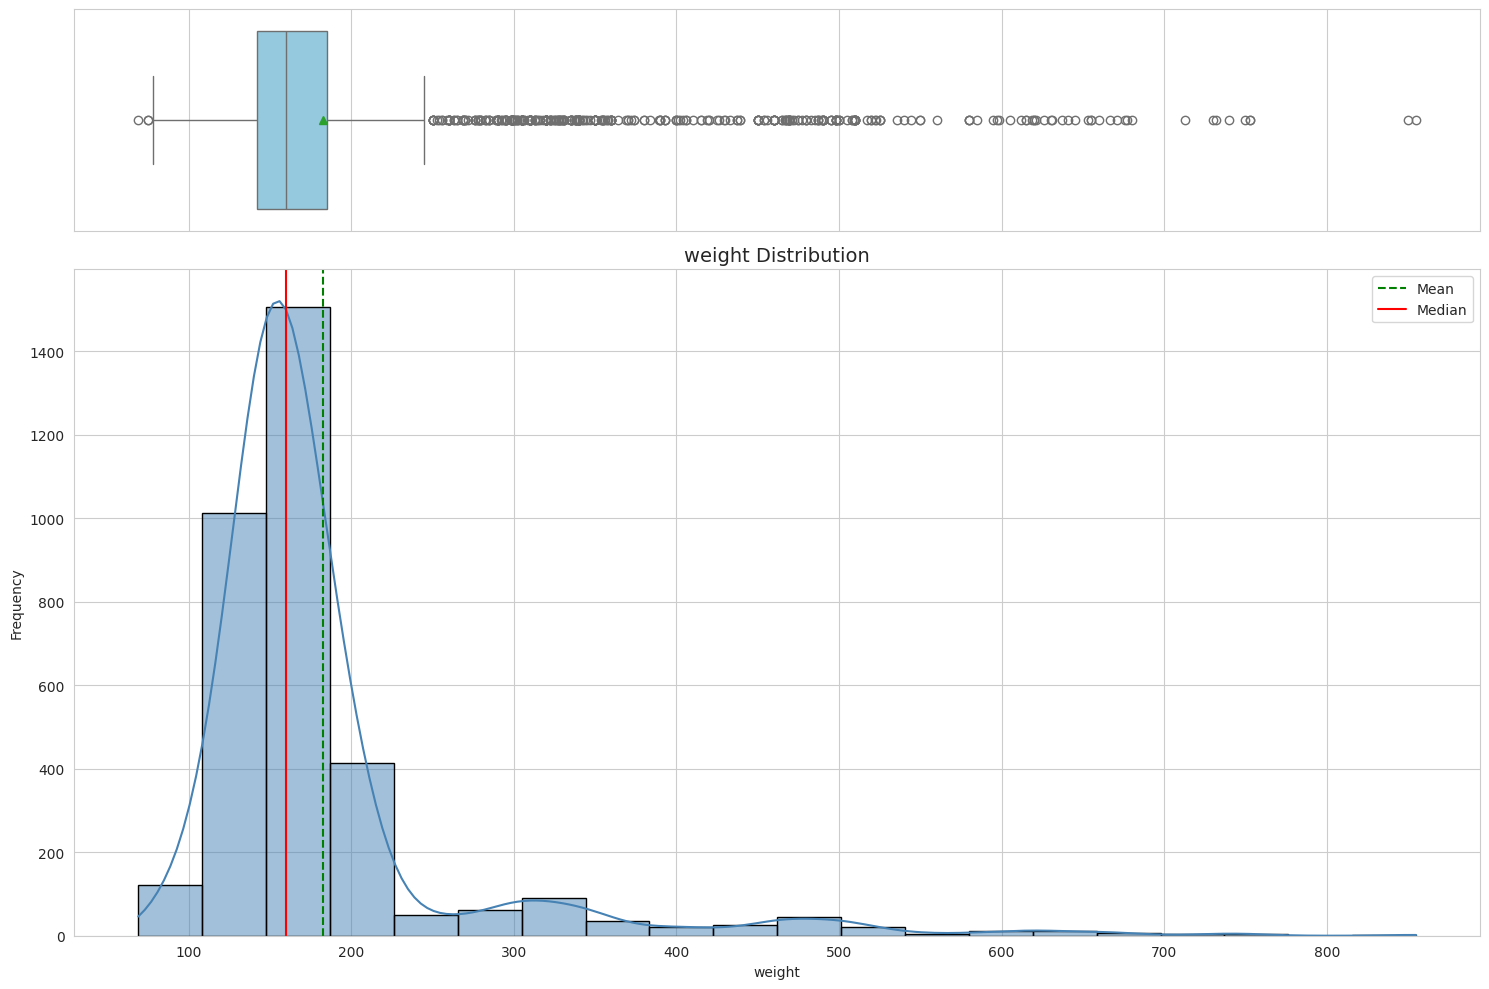

In [ ]:
histogram_boxplot(df,'weight',kde=True, bins=20, title="weight Distribution")

Observations:

- The distribution is right skewed.

- Median is lower than the mean.

- Boxplot shows outlier beyond 200 weight

- Most commom weight is between 150-200.

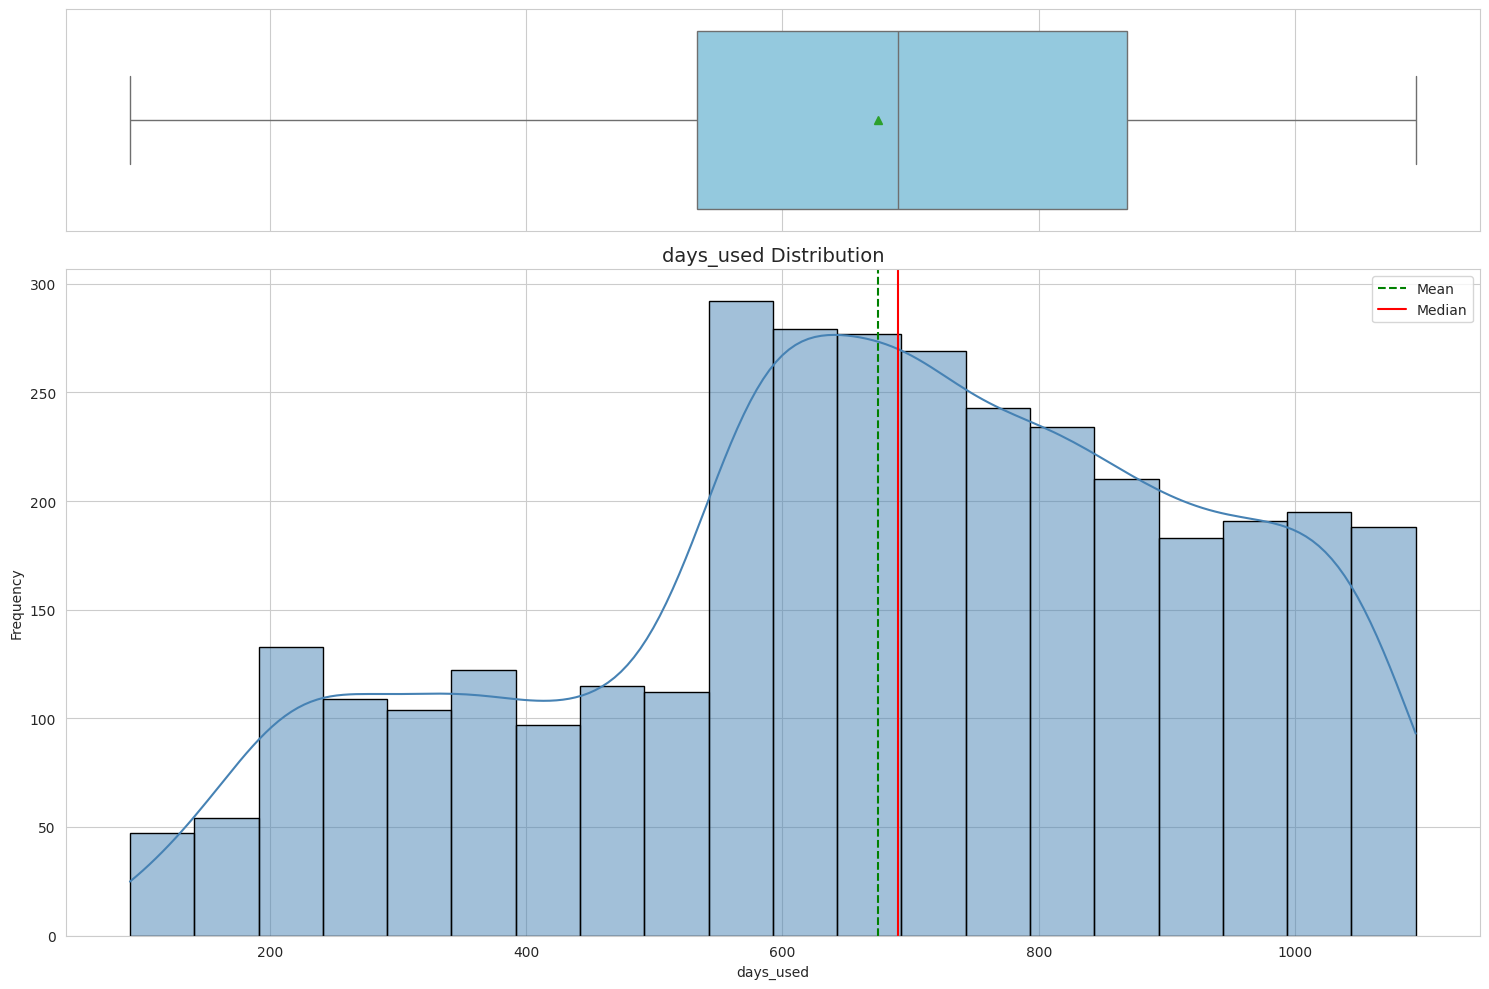

In [ ]:

histogram_boxplot(df,'days_used',kde=True, bins=20, title="days_used Distribution")

Observations:

- The distribution is left skewed.

- Median is higher than the mean.

- Boxplot do not shows mayor outlier

- Most commom days used is between 590 and 1100 days

- Mean ~660 days, Median ~700 days showing use nearly 2 years.

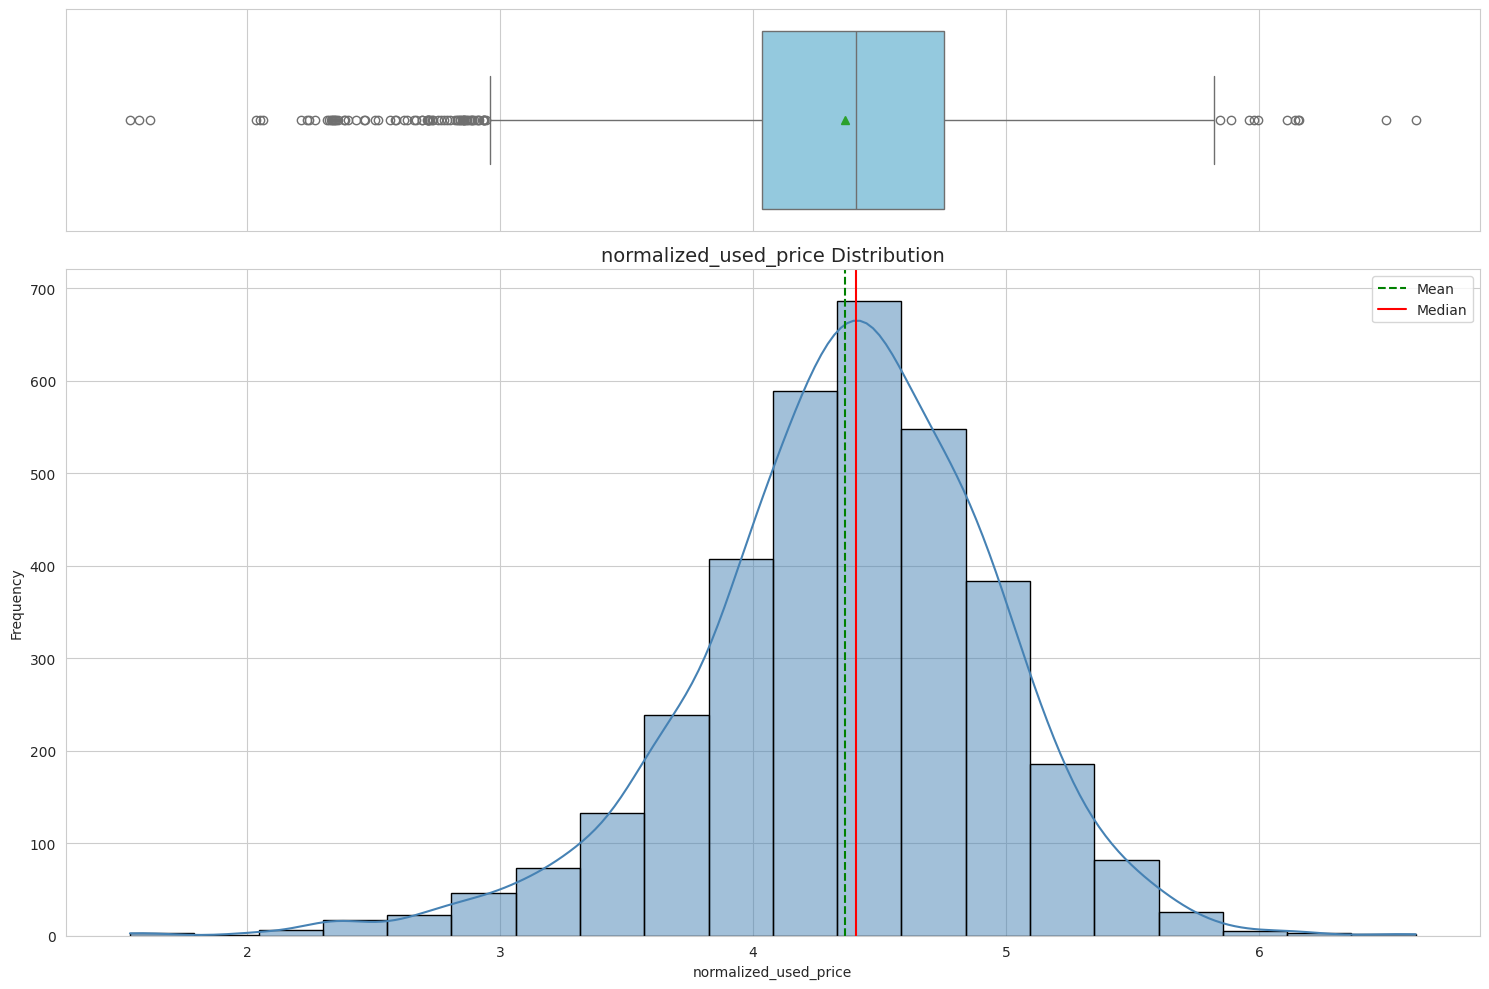

In [ ]:
histogram_boxplot(df,'normalized_used_price',kde=True, bins=20, title="normalized_used_price Distribution")

Observations:

- The histogram follows an approximately normal distribution.

- - Median, Mode and mean are almost identical.

- Boxplot shows mayor outlier

- Most commom used price is between 4 and 5.



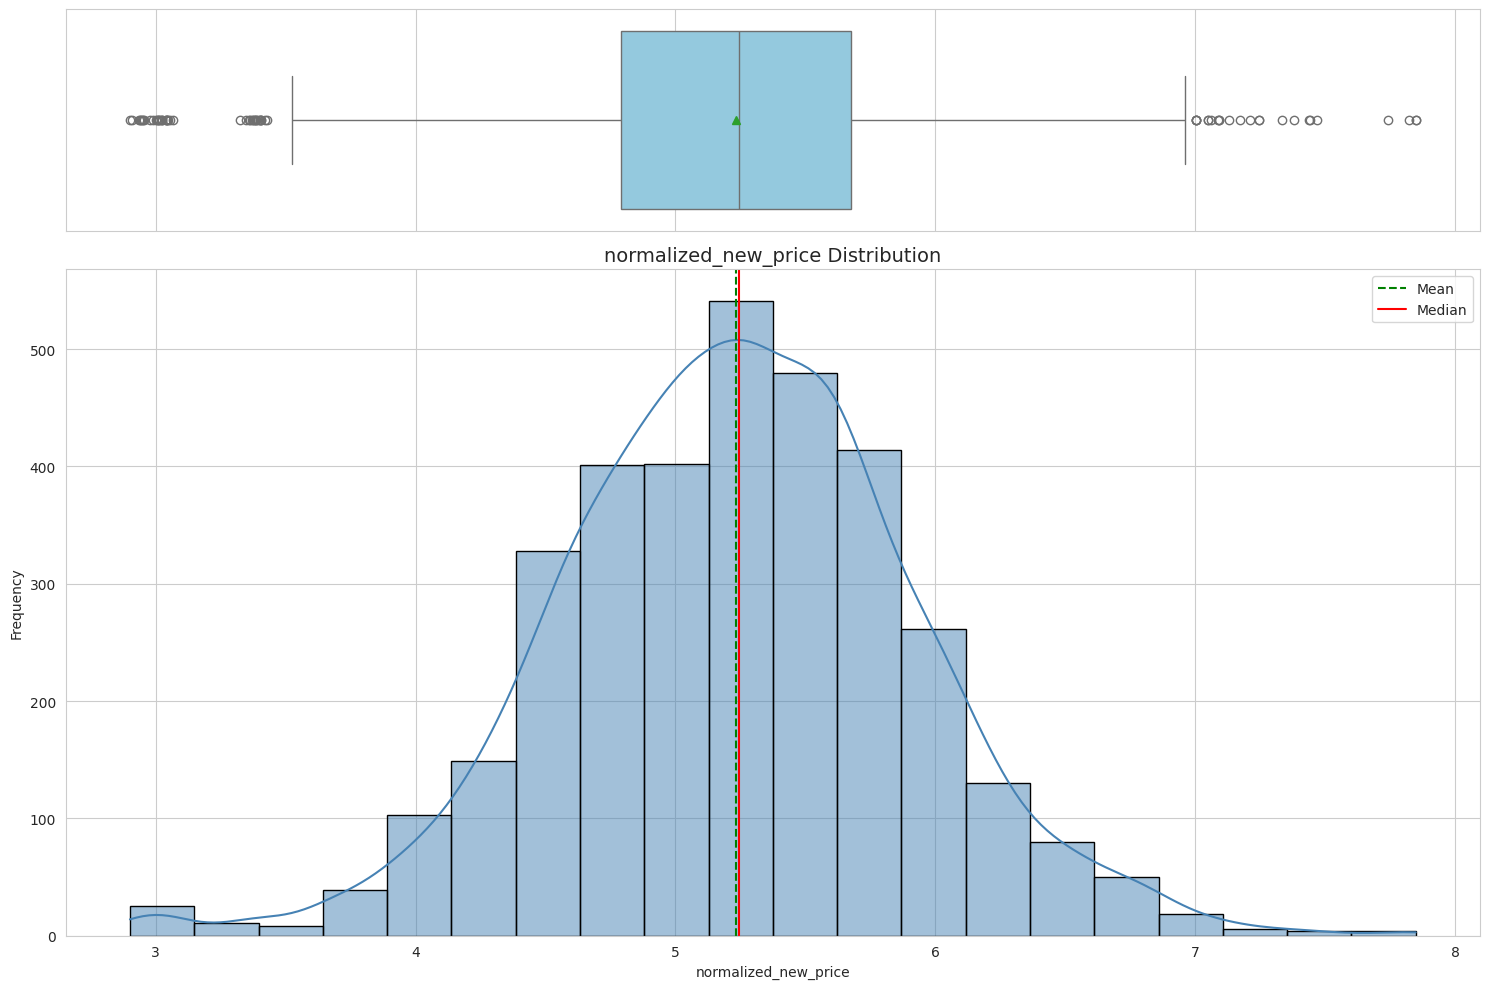

In [ ]:
histogram_boxplot(df,'normalized_new_price',kde=True, bins=20, title="normalized_new_price Distribution")

Observations:

- The histogram follows an approximately normal distribution.

- Median, Mode and mean are almost identical.

- Boxplot shows mayor outlier

- Most commom used price is between 4 and 6.

**Barplots**

In [ ]:
def labeled_barplot(data, feature, perc=False, n=None, title=None, palette="Set2", grid=True):
    """
    Barplot with count or percentage labels.

    Parameters:
    - data: pd.DataFrame
    - feature: str, column name to plot
    - perc: bool, if True displays percentages instead of counts
    - n: int or None, top n categories to display (default is all)
    - title: str or None, plot title
    - palette: str, seaborn color palette
    - grid: bool, show gridlines in the plot
    """

    total = len(data[feature])
    count = data[feature].nunique()
    if n is None:
        n = count

    plt.figure(figsize=(n + 2, 6))
    plt.xticks(rotation=90, fontsize=12)

    # Pass hue as feature and suppress legend to apply palette properly (fixes FutureWarning)
    ax = sns.countplot(
        data=data,
        x=feature,
        hue=feature,
        order=data[feature].value_counts().index[:n],
        palette=palette,
        legend=False  # suppress automatic legend due to hue
    )

    for p in ax.patches:
        if perc:
            label = f"{100 * p.get_height() / total:.1f}%"
        else:
            label = f"{p.get_height()}"

        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=11,
            xytext=(0, 5),
            textcoords="offset points"
        )

    ax.set_ylabel("Percentage" if perc else "Count", fontsize=12)
    ax.set_xlabel(feature.replace("_", " ").title(), fontsize=12)

    if title:
        ax.set_title(title, fontsize=14)

    if grid:
        ax.grid(True, axis='y', linestyle='--', alpha=0.6)

    plt.tight_layout()
    plt.show()


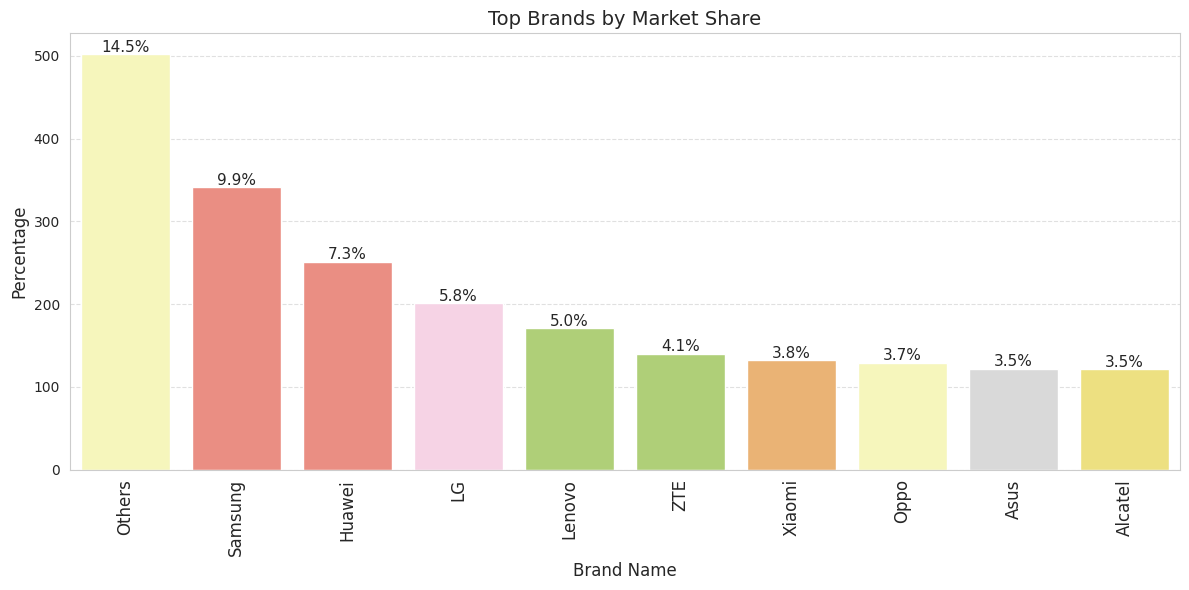

In [ ]:

labeled_barplot(df, 'brand_name', perc=True, n=10, title='Top Brands by Market Share', palette='Set3')

Observations:

- Dominant Brands, others(unknwon), Samsung 9.9% and Huawei 7.3%.


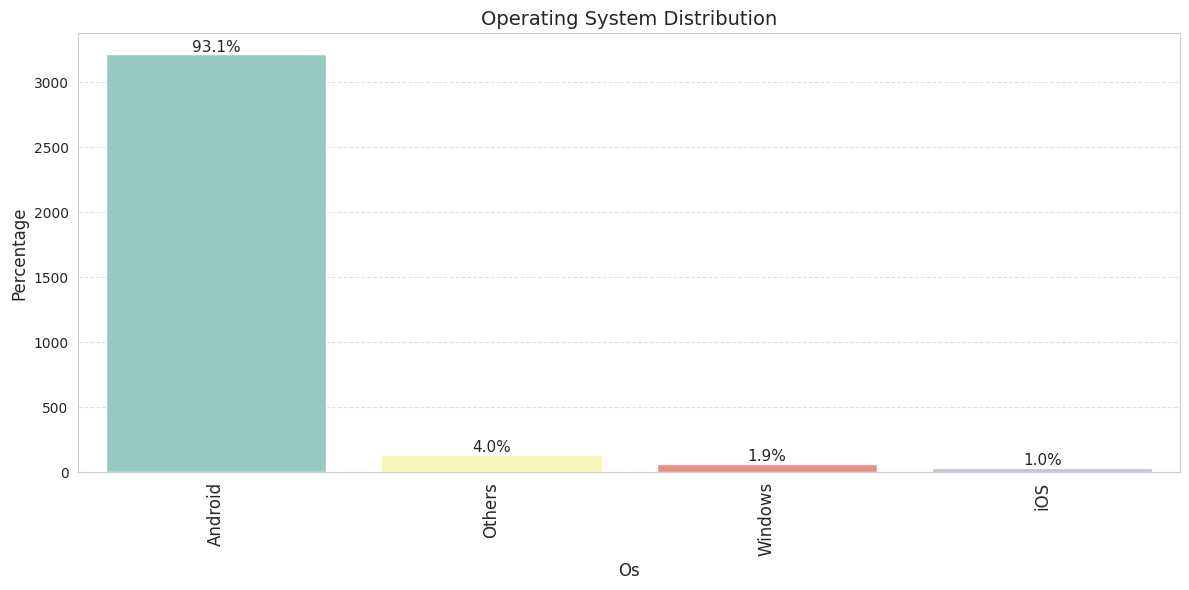

In [ ]:
labeled_barplot(df, 'os', perc=True, n=10, title='Operating System Distribution', palette='Set3')

Observations:

- Dominant OS system 93.10%

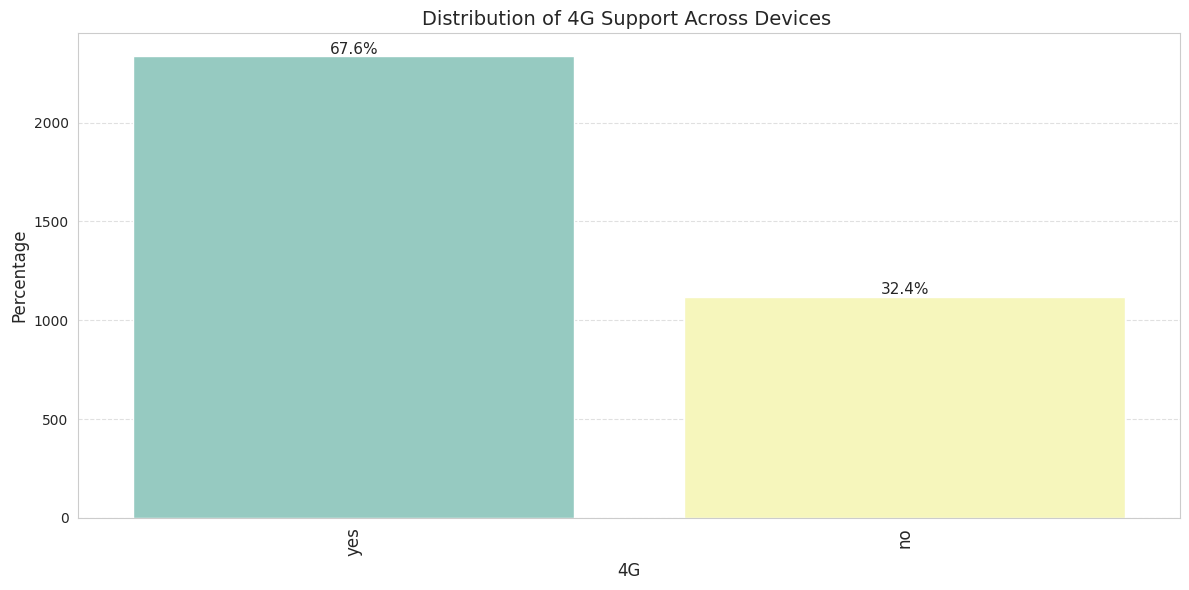

In [ ]:
labeled_barplot(df, '4g', perc=True, n=10, title='Distribution of 4G Support Across Devices ', palette='Set3')

Observations:

- 67.6% of the phones Support 4G.

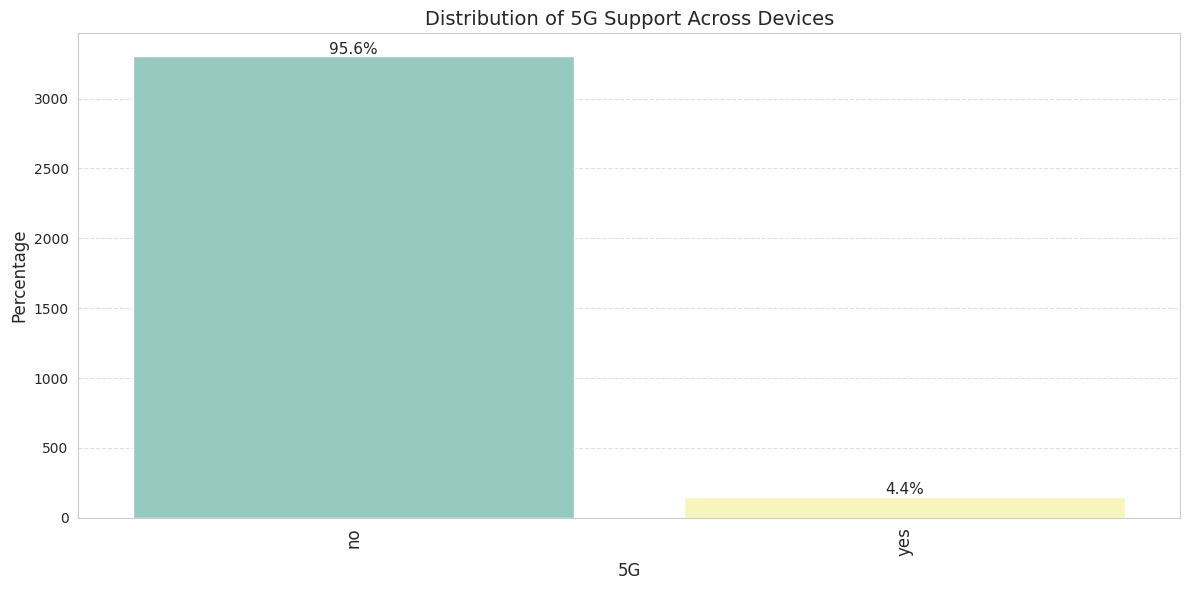

In [ ]:
labeled_barplot(df, '5g', perc=True, n=10, title='Distribution of 5G Support Across Devices', palette='Set3')

Observations:

- 95.6% of the phones do not Support 5G only the 4.4% support 5G.

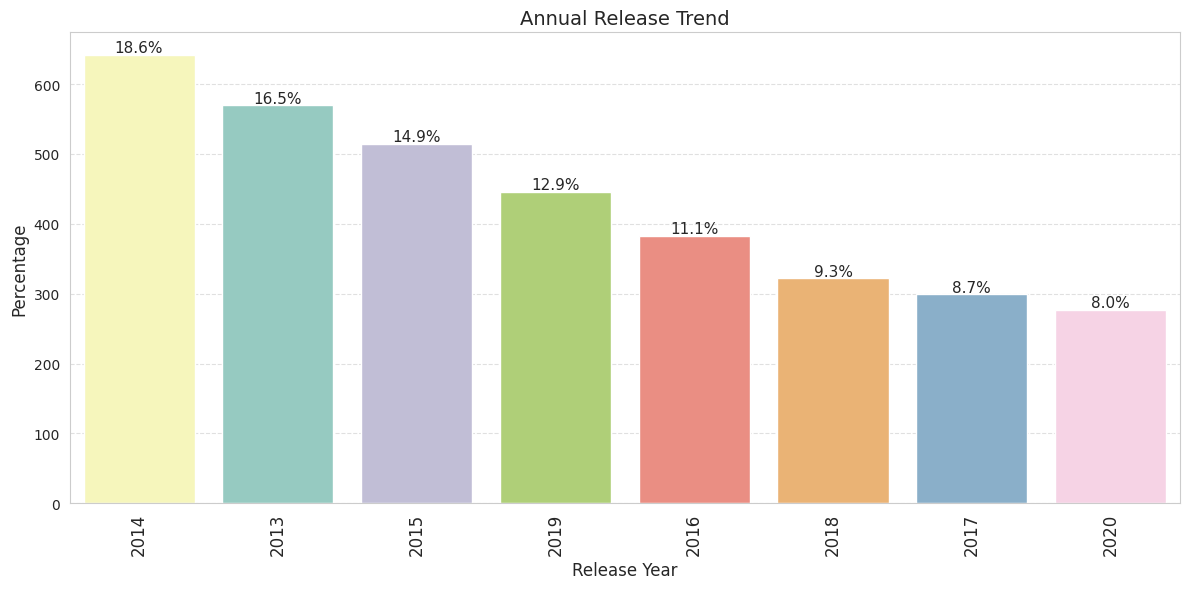

In [ ]:
labeled_barplot(df, 'release_year', perc=True, n=10, title='Annual Release Trend', palette='Set3')

Observations:

- Mayority of devise were released between 2013 and 2015.

Bivariate Analysis

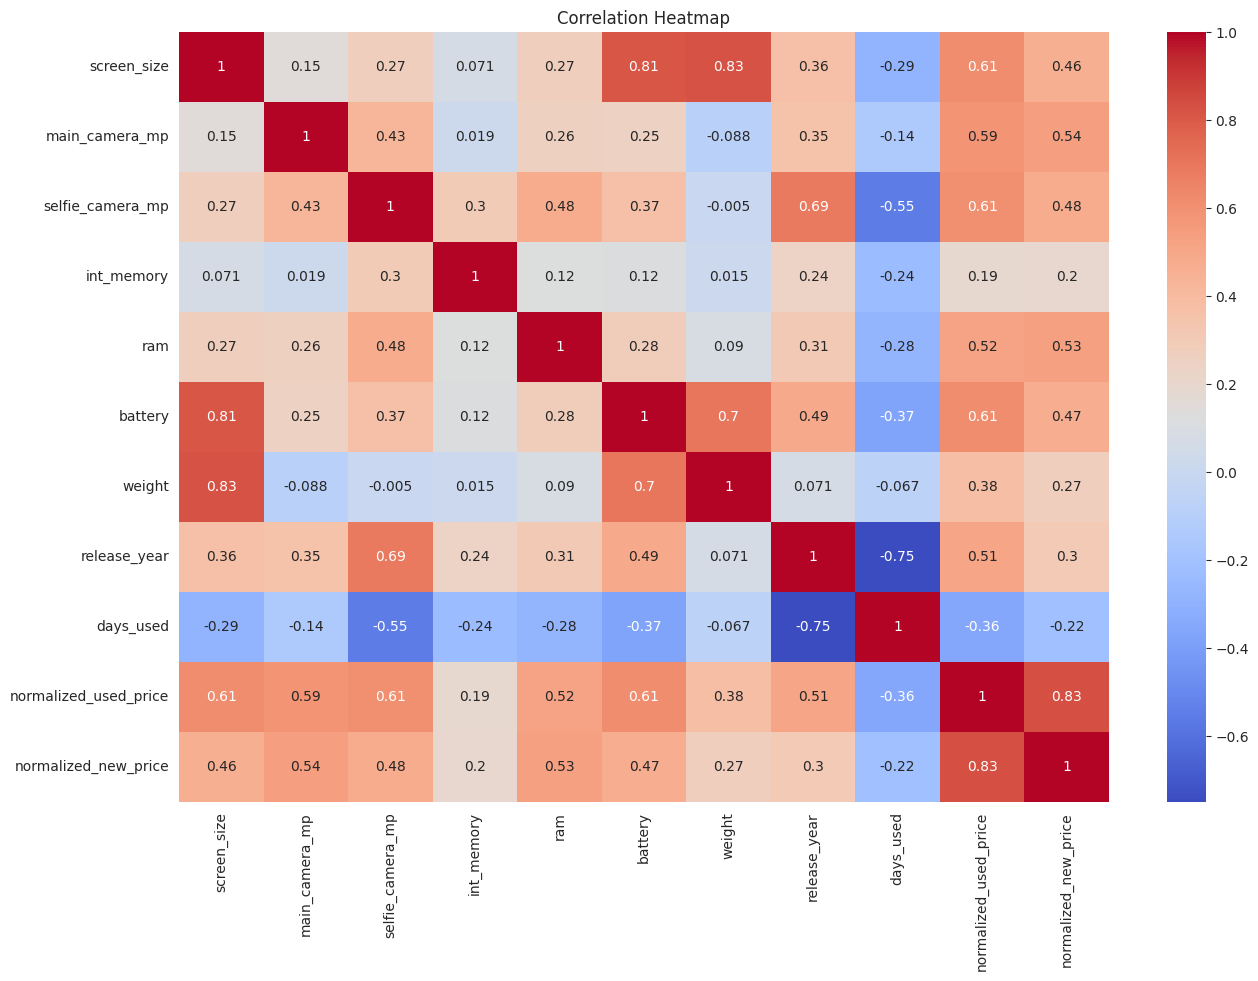

In [ ]:
#creating  variable with numerical variable
num_cols = df.select_dtypes(include=np.number).columns.tolist()

#plotting correlation
plt.figure(figsize=(15, 10))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Observations:

** Strong Positive Correlations (r > 0.7):**

- Battery vs Weight: 0.70

- Heavier devices tend to have larger batteries.

- Screen Size vs Battery: 0.81

- Bigger screens usually require larger batteries.

- Screen Size vs Weight: 0.83

- Devices with bigger screens are typically heavier.

- Normalized Used Price vs Normalized New Price: 0.83

- Strong expected relationship; expensive devices when new tend to have higher
  resale values.

** Negative Correlations (r < 0):**

Days Used vs Release Year: -0.75

Older phones have been used longer. Expected.

Days Used vs Used Price: -0.36

The longer a phone has been used, the lower its resale value.

Days Used vs Selfie Camera MP: -0.55

Suggests older devices have lower selfie camera specs.

Observations:

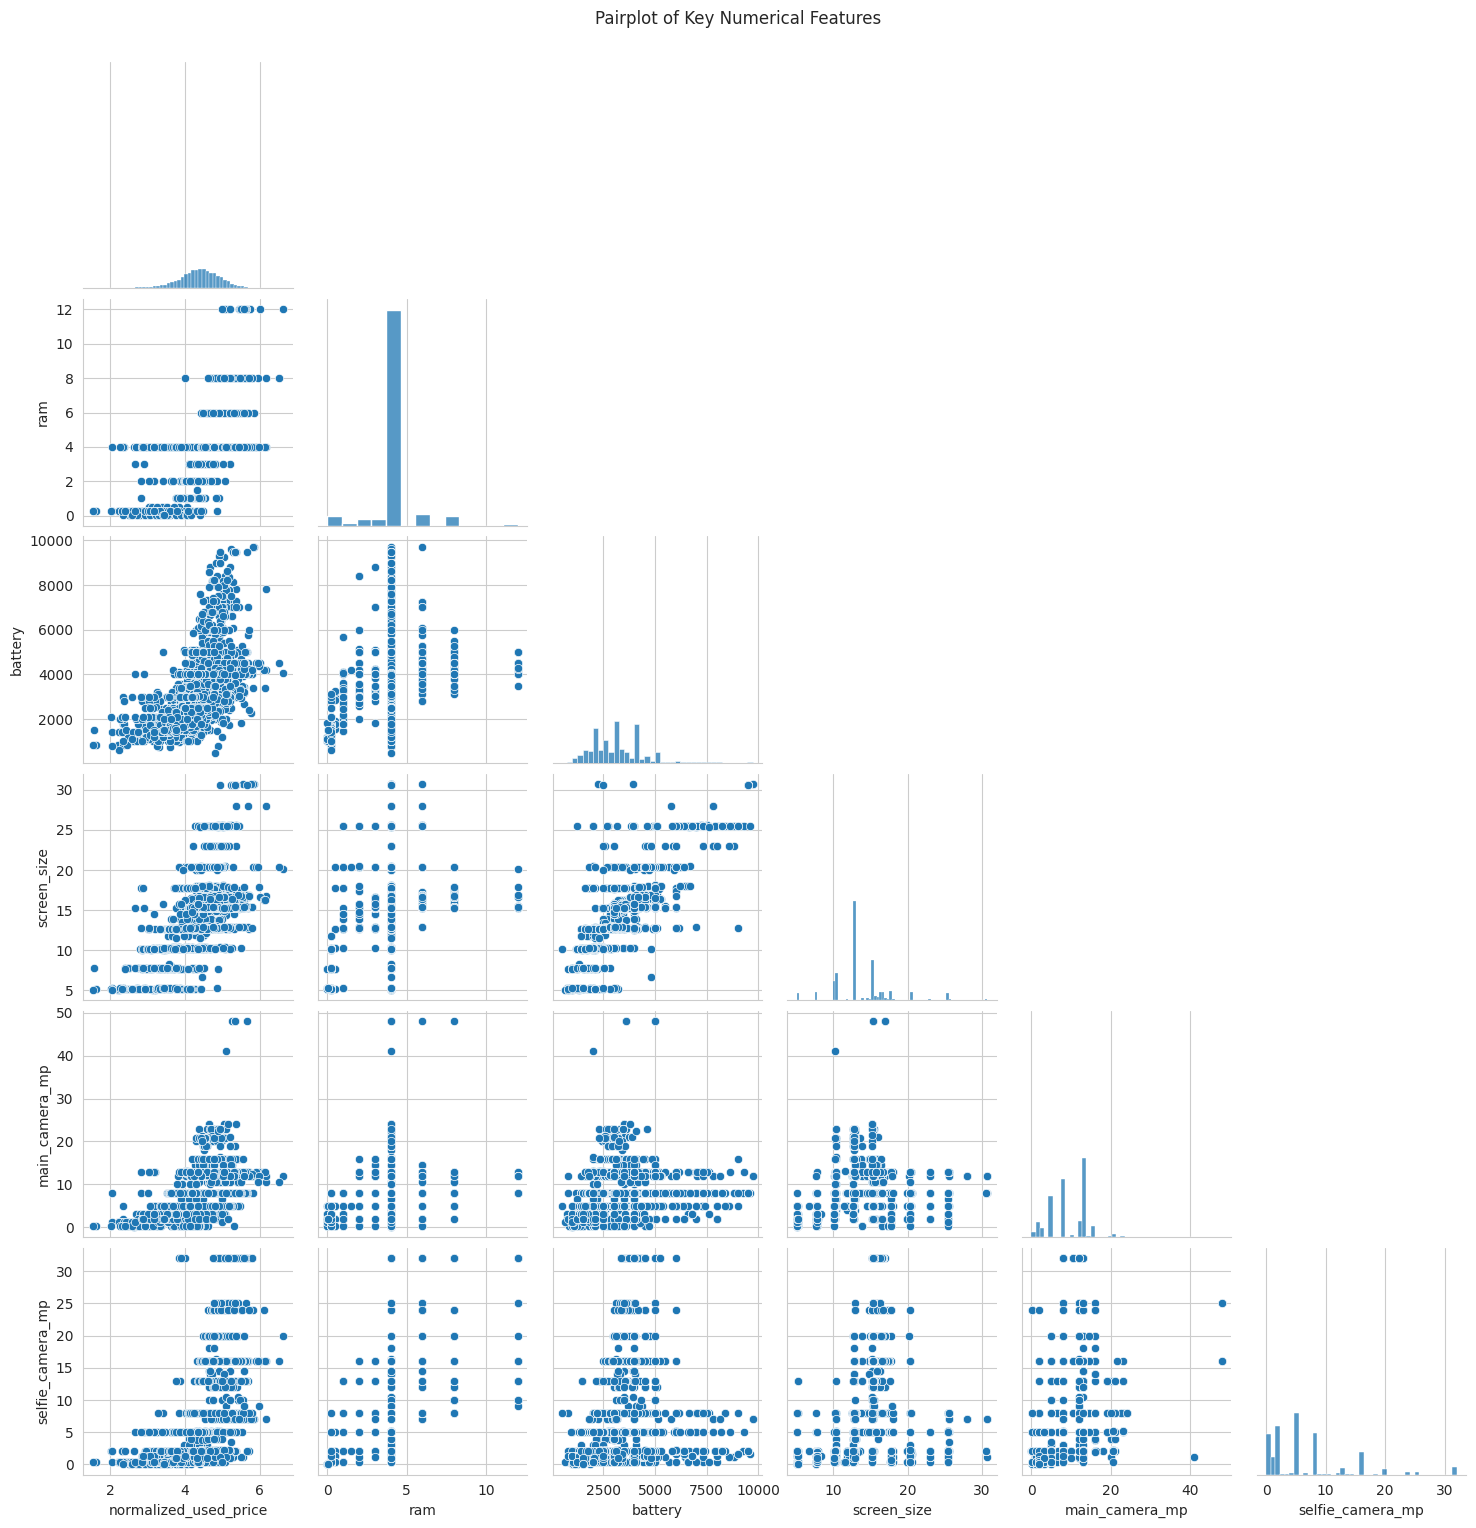

In [ ]:
selected_features = ['normalized_used_price', 'ram', 'battery', 'screen_size', 'main_camera_mp', 'selfie_camera_mp']
sns.pairplot(df[selected_features], corner=True)
plt.suptitle("Pairplot of Key Numerical Features", y=1.02)
plt.show()

Observations:

- battery: Higher battery capacity tends to be associated with higher used
  prices.

- screen_size: Devices with larger screens generally have higher used prices.

- main_camera_mp and selfie_camera_mp: Devices with better camera  
  specifications also fetch higher used prices.

- ram: More RAM generally increases the resale value.

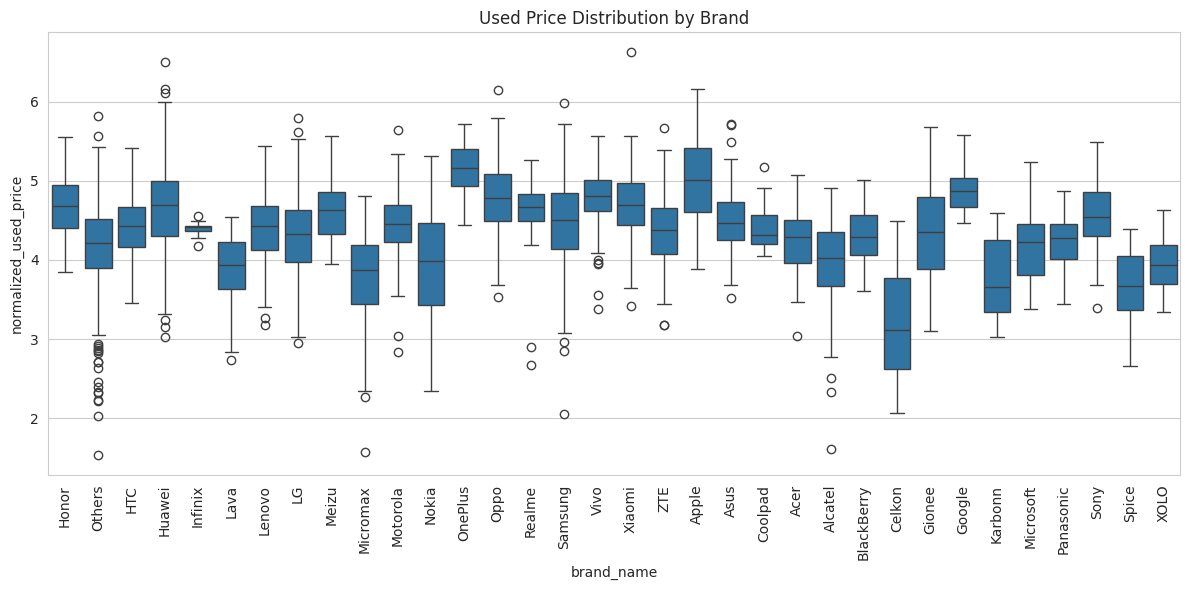

In [ ]:
#Boxplots of price vs categorical features
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='brand_name', y='normalized_used_price')
plt.title("Used Price Distribution by Brand")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Observations:

- Higher priced Brands: Apple, One Plus and Google.
- Micromax,Gionee and Spice some of the lowest used prices.

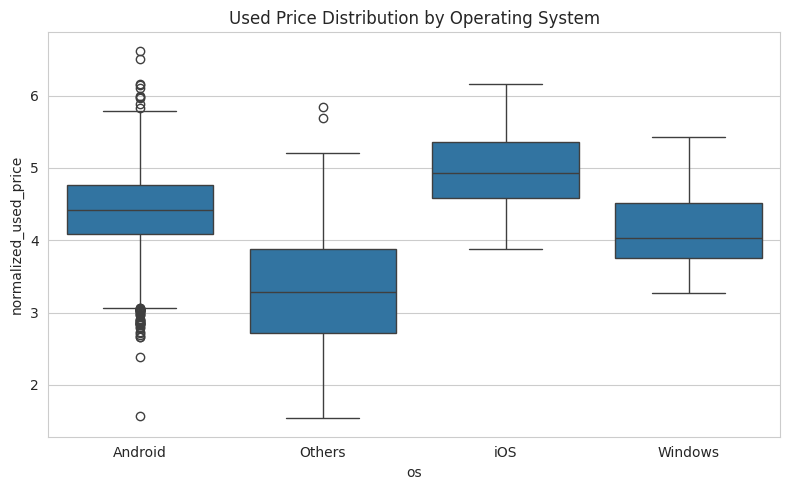

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='os', y='normalized_used_price')
plt.title("Used Price Distribution by Operating System")
plt.tight_layout()
plt.show()

Observations:
- iOS has higher median used price compared to all other operating systems.

- Android has the largest number of outliers.

- Others and Windows tend to have lower medians and wider spreads.

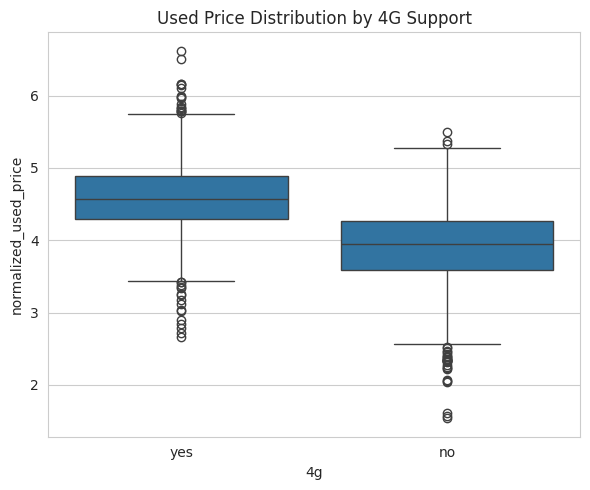

In [ ]:
plt.figure(figsize=(6, 5))
sns.boxplot(data=df, x='4g', y='normalized_used_price')
plt.title("Used Price Distribution by 4G Support")
plt.tight_layout()
plt.show()


Observations:
- Devices with 4G support have a higher median used price than those without.

- Devices without 4G support tend to have a lower price range.

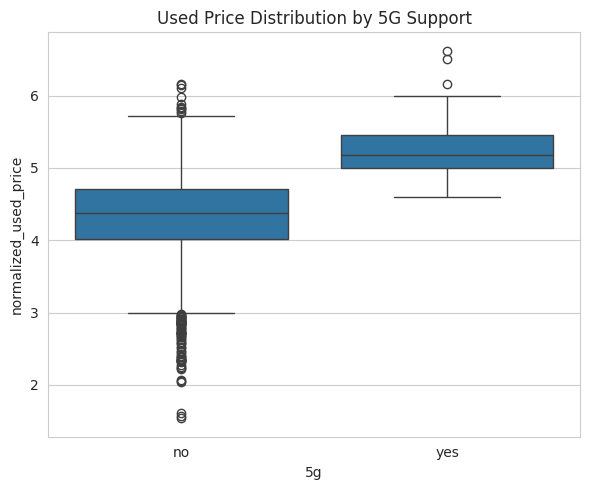

In [ ]:
plt.figure(figsize=(6, 5))
sns.boxplot(data=df, x='5g', y='normalized_used_price')
plt.title("Used Price Distribution by 5G Support")
plt.tight_layout()
plt.show()

Observations:
- Devices with 5G support have a higher median used price than those without.

- Devices without 5G support tend to have a lower price range.

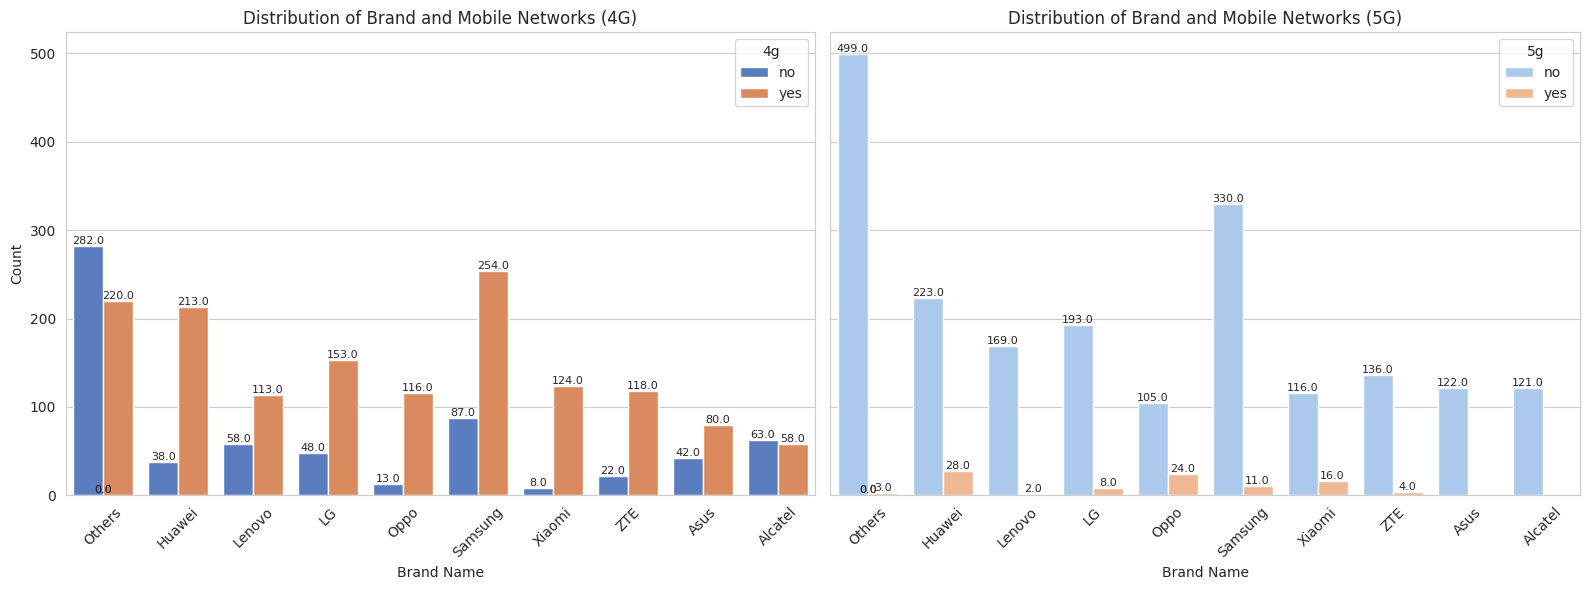

In [ ]:
# Step 1: Identify top 10 brands
top_brands = df['brand_name'].value_counts().nlargest(10).index

# Step 2: Filter dataframe to only those brands
filtered_df = df[df['brand_name'].isin(top_brands)]

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Plot for 4G
sns.countplot(data=filtered_df, x='brand_name', hue='4g', ax=axes[0], palette='muted')
axes[0].set_title("Distribution of Brand and Mobile Networks (4G)")
axes[0].set_xlabel("Brand Name")
axes[0].set_ylabel("Count")
axes[0].tick_params(axis='x', rotation=45)
for p in axes[0].patches:
    height = p.get_height()
    axes[0].annotate(f'{height:.1f}', (p.get_x() + p.get_width() / 2, height),
                     ha='center', va='bottom', fontsize=8)

# Plot for 5G
sns.countplot(data=filtered_df, x='brand_name', hue='5g', ax=axes[1], palette='pastel')
axes[1].set_title("Distribution of Brand and Mobile Networks (5G)")
axes[1].set_xlabel("Brand Name")
axes[1].tick_params(axis='x', rotation=45)
for p in axes[1].patches:
    height = p.get_height()
    axes[1].annotate(f'{height:.1f}', (p.get_x() + p.get_width() / 2, height),
                     ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

Observations:

**4G**

- Samsumg Leads with the highest number of 4G supported devises (254)

- Brands like, Huawei, Xiaomi, ZTE, and LG also show a strong preference for 4G
  support over non-4G.

**5G**

- Huawei leads with 28 5G-supported devices, but still has 330 non-5G.

- Rest of the brands follow with mimimal 5G support.

**General:**

- The market is still dominated by 4G.

- 5G adoption remains low.




In [ ]:
import warnings
warnings.filterwarnings("ignore", message="Glyph.*missing from font.*")


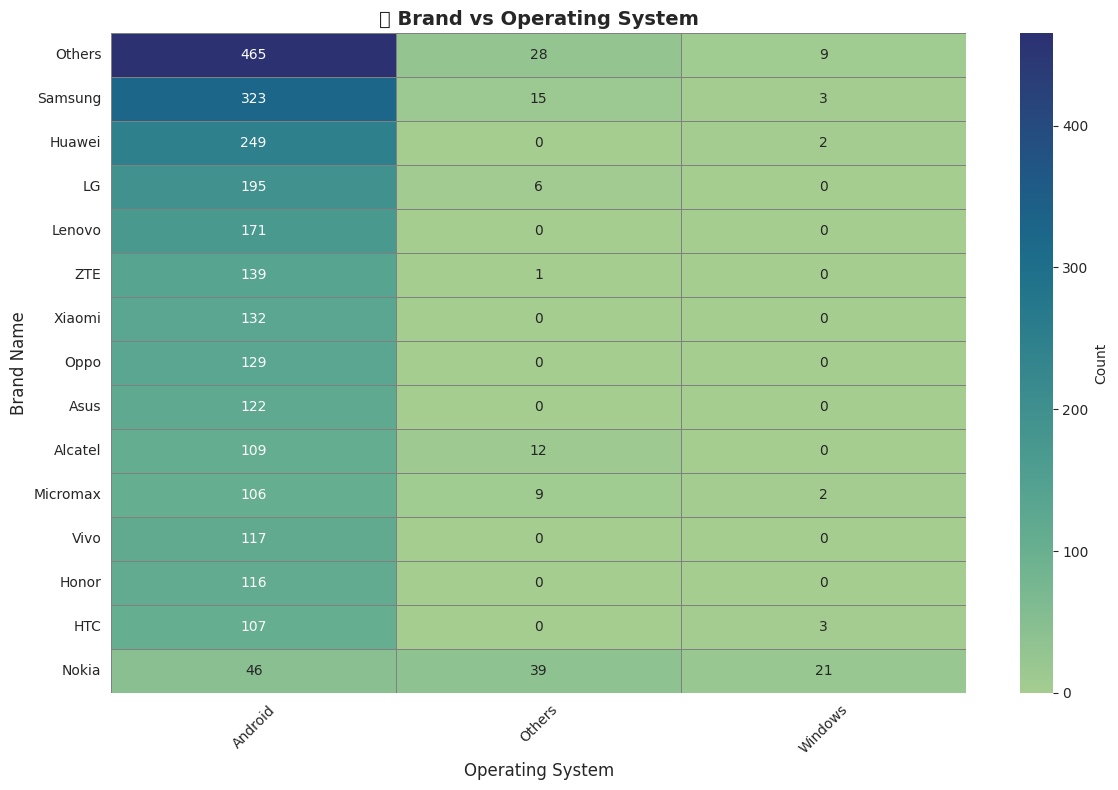

In [ ]:
# Step 1: Top 15 brands by frequency
top_brands = df['brand_name'].value_counts().nlargest(15).index
filtered_df = df[df['brand_name'].isin(top_brands)]

# Step 2: Cross-tabulation
cross_tab = pd.crosstab(filtered_df['brand_name'], filtered_df['os'])


cross_tab = cross_tab.loc[cross_tab.sum(axis=1).sort_values(ascending=False).index]

# Step 3: Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='crest', linewidths=0.5, linecolor='gray', cbar_kws={'label': 'Count'})
plt.title("🔍 Brand vs Operating System", fontsize=14, weight='bold')
plt.xlabel("Operating System", fontsize=12)
plt.ylabel("Brand Name", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Observations:

- All major brands in the top 15 run primarily on Android.

- Samsung (323), Huawei (249), LG (195), Lenovo (171), ZTE (139), Xiaomi (132),
  Oppo (129), Asus (122) all show Android as their exclusive or overwhelmingly dominant OS.

- Only a few brands have devices running Windows OS.

- ReCell can target Android-focused customers, since nearly all major used
  devices run Android.



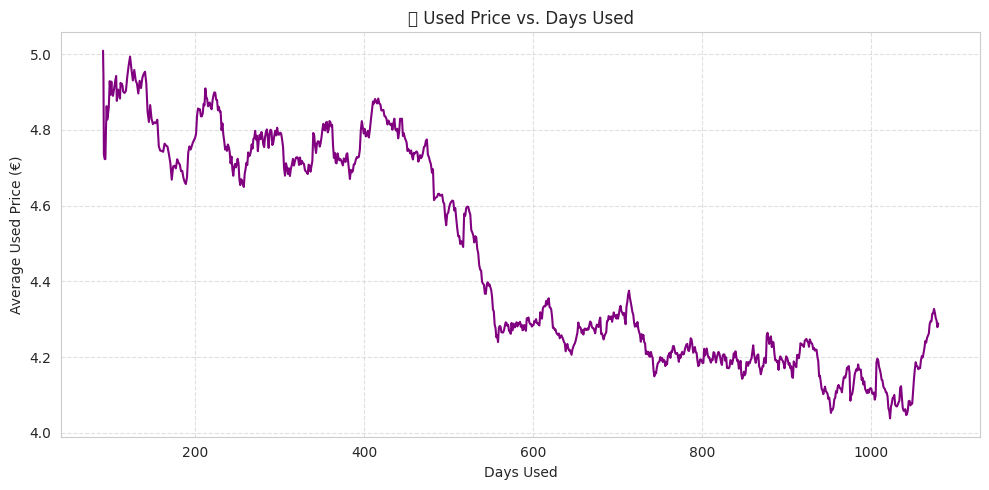

In [ ]:
# Group by usage duration
price_by_days = df.groupby('days_used')['normalized_used_price'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=price_by_days.rolling(30, min_periods=1).mean(), x='days_used', y='normalized_used_price', color='purple')
plt.title("📉 Used Price vs. Days Used")
plt.xlabel("Days Used")
plt.ylabel("Average Used Price (€)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Observations:

- As the number of days a phone has been used increases, the average normalized
  price steadily declines.

- There's a noticeable sharp drop in value between ~500 to 600 days.



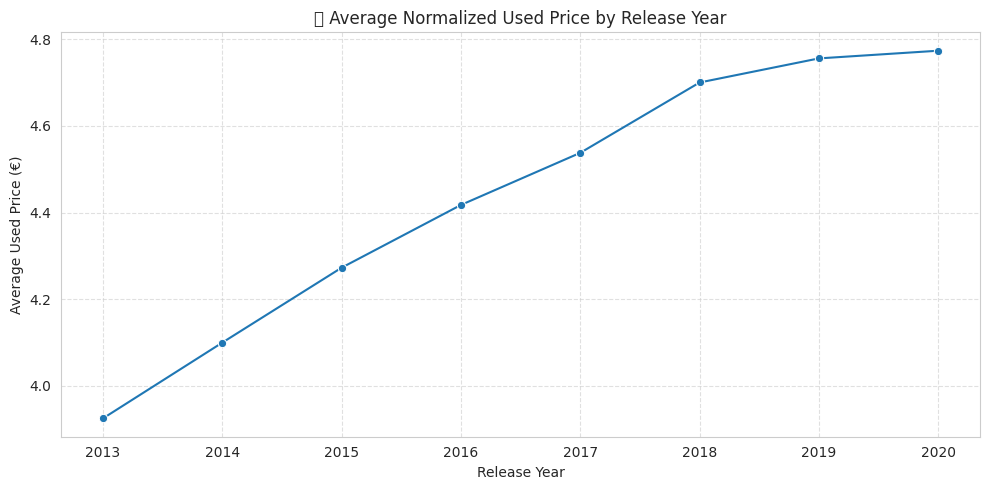

In [ ]:
# Group by release year
price_trend = df.groupby('release_year')['normalized_used_price'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=price_trend, x='release_year', y='normalized_used_price', marker='o')
plt.title("📈 Average Normalized Used Price by Release Year")
plt.xlabel("Release Year")
plt.ylabel("Average Used Price (€)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Observations:

- Devices released in more recent years (from 2013 to 2020) tend to have a
  higher average normalized used price.

- Devices from 2018 to 2020 have very similar average prices, showing better  
  value retention.  

**Insights based on EDA**

- Younger devices (≤ 1.5 years used) fetch higher resale value.

- Focus on 4G-enabled Android phones, especially from top 5 brands.

- Avoid overvaluing 5G devices as their prevalence is still low in the current
  used market.


## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

1. Missing value treatment

In [ ]:
df.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

Observations:

- There are missing values in several columns.

- We will imput missing values with medians.

In [ ]:
# Identify numeric columns with missing values
numeric_df = df.select_dtypes(include='number')
numeric_cols = numeric_df.columns[numeric_df.isnull().sum() > 0]

# Fill missing values with median grouped by brand_name
for col in numeric_cols:
    df[col] = df.groupby('brand_name')[col].transform(lambda x: x.fillna(x.median()))


In [ ]:
df.isnull().sum()

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           10
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64

In [ ]:
#displaying the rows with null values for column main_camera_mp
df[df['main_camera_mp'].isnull()]

brand_name       os  screen_size   4g  5g  main_camera_mp  \
59     Infinix  Android        17.32  yes  no             NaN   
60     Infinix  Android        15.39  yes  no             NaN   
61     Infinix  Android        15.39  yes  no             NaN   
62     Infinix  Android        15.39  yes  no             NaN   
63     Infinix  Android        15.29  yes  no             NaN   
278    Infinix  Android        17.32  yes  no             NaN   
279    Infinix  Android        15.39  yes  no             NaN   
280    Infinix  Android        15.39  yes  no             NaN   
281    Infinix  Android        15.39  yes  no             NaN   
282    Infinix  Android        15.29  yes  no             NaN   

     selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
59                8.0        32.0  2.0   6000.0   209.0          2020   
60                8.0        64.0  4.0   5000.0   185.0          2020   
61                8.0        32.0  2.0   5000.0   185.0          2020   
62               16.0        32.0  3.0   4000.0   178.0          2019   
63               16.0        32.0  2.0   4000.0   165.0          2019   
278               8.0        32.0  2.0   6000.0   209.0          2020   
279               8.0        64.0  4.0   5000.0   185.0          2020   
280               8.0        32.0  2.0   5000.0   185.0          2020   
281              16.0        32.0  3.0   4000.0   178.0          2019   
282              16.0        32.0  2.0   4000.0   165.0          2019   

     days_used  normalized_used_price  normalized_new_price  
59         245               4.282068              4.597642  
60         173               4.363608              4.711780  
61         256               4.181439              4.505460  
62         316               4.555244              4.602166  
63         468               4.416670              4.871297  
278        320               4.405133              4.605370  
279        173               4.495913              4.702115  
280        329               4.370713              4.487287  
281        356               4.417997              4.605970  
282        497               4.423289              4.866072

In [ ]:
#displaying main_camera_mp for years 2020 and 2019 for data without null values
df[(df['release_year']==2020) | (df['release_year']==2019)]['main_camera_mp']

0       13.0
1       13.0
2       13.0
3       13.0
4       13.0
        ... 
3448    13.0
3449    13.0
3451    13.0
3452    13.0
3453    13.0
Name: main_camera_mp, Length: 723, dtype: float64

In [ ]:
#cheking the avg main_camera_mp for years 2020 and 2019 for data without null values
df[(df['release_year']==2020) | (df['release_year']==2019)]['main_camera_mp'].mean()

np.float64(10.99733520336606)

In [ ]:
df['main_camera_mp']=df['main_camera_mp'].fillna(df['main_camera_mp'].median())

In [ ]:
df.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

Observations:

- All missing values haave been treated.

2. Feature engineering (if needed)

In [ ]:
df.head()

brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  release_year  \
0               5.0        64.0  3.0   3020.0   146.0          2020   
1              16.0       128.0  8.0   4300.0   213.0          2020   
2               8.0       128.0  8.0   4200.0   213.0          2020   
3               8.0        64.0  6.0   7250.0   480.0          2020   
4               8.0        64.0  3.0   5000.0   185.0          2020   

   days_used  normalized_used_price  normalized_new_price  
0        127               4.307572              4.715100  
1        325               5.162097              5.519018  
2        162               5.111084              5.884631  
3        345               5.135387              5.630961  
4        293               4.389995              4.947837

In [ ]:
df["years_since_release"] = 2021 - df["release_year"]
df.drop("release_year", axis=1, inplace=True)
df["years_since_release"].describe()

count    3454.000000
mean        5.034742
std         2.298455
min         1.000000
25%         3.000000
50%         5.500000
75%         7.000000
max         8.000000
Name: years_since_release, dtype: float64

3. Outlier detection and treatment (if needed)

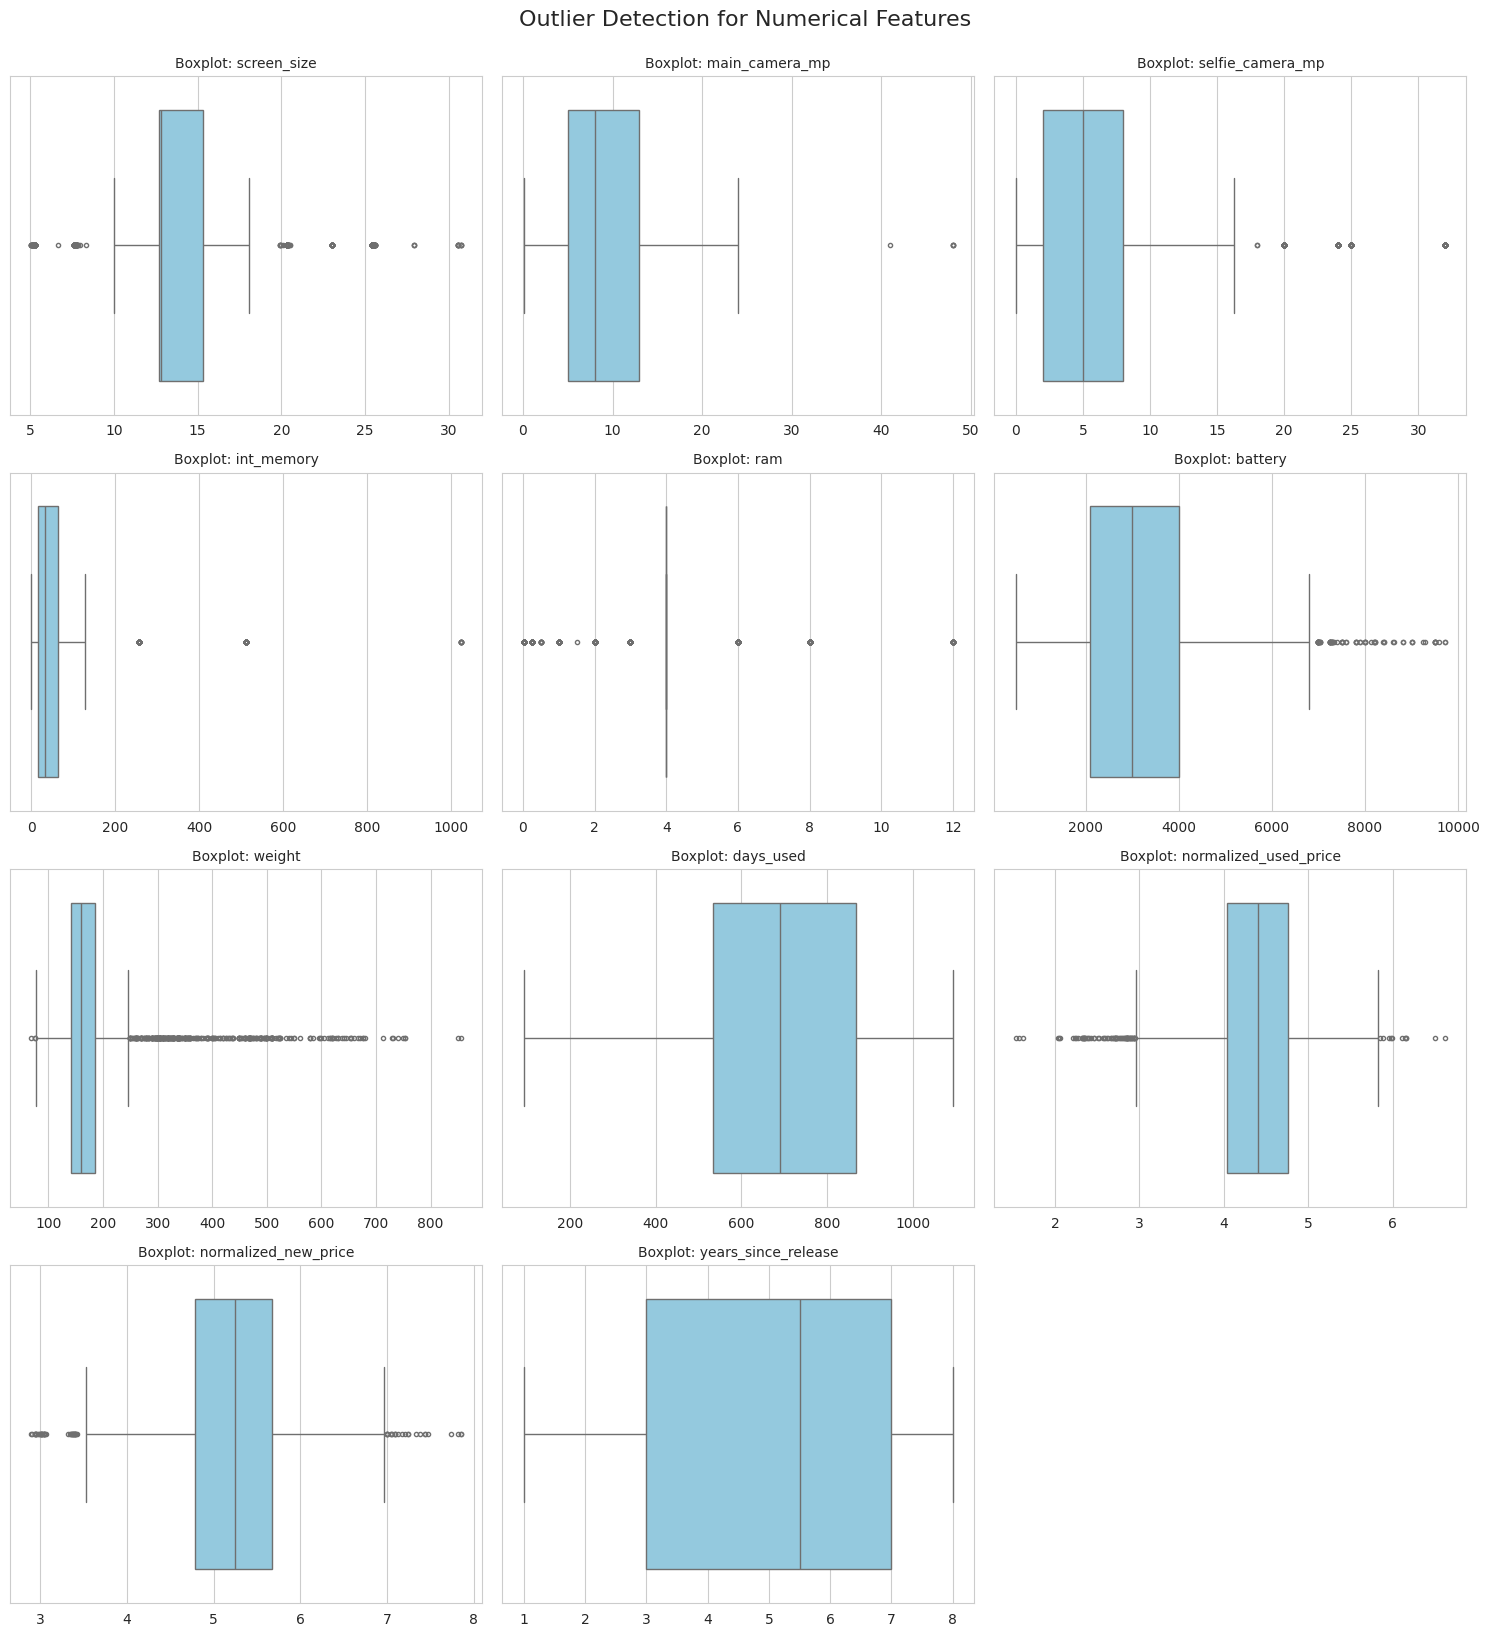

In [ ]:
# Select numerical columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()

# Set up the boxplot grid
n_cols = 3  # Number of plots per row
n_rows = int(np.ceil(len(num_cols) / n_cols))

plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, variable in enumerate(num_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(x=df[variable], color="skyblue", fliersize=3)
    plt.title(f"Boxplot: {variable}", fontsize=10)
    plt.xlabel("")
    plt.tight_layout()

plt.suptitle("Outlier Detection for Numerical Features", fontsize=16, y=1.02)
plt.show()

Observations:
- There are a few outliers in the data
- However, we will not treat them as they are proper values

4. Preparing data for modeling

In [ ]:
#defining X and y variables
X = df.drop(['normalized_used_price'], axis=1)
y = df['normalized_used_price']

print(X.head())
print(y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  days_used  \
0               5.0        64.0  3.0   3020.0   146.0        127   
1              16.0       128.0  8.0   4300.0   213.0        325   
2               8.0       128.0  8.0   4200.0   213.0        162   
3               8.0        64.0  6.0   7250.0   480.0        345   
4               8.0        64.0  3.0   5000.0   185.0        293   

   normalized_new_price  years_since_release  
0              4.715100                    1  
1              5.519018                    1  
2              5.884631                    1  
3              5.6

In [ ]:
#Adding the intercept to data
import statsmodels.api as sm
X=sm.add_constant(X)

In [ ]:
#Creating dummy variable
X= pd.get_dummies(
    X,
    columns=X.select_dtypes(include=['object','category']).columns.tolist(),
    drop_first=True
)
X.head()

const  screen_size  main_camera_mp  selfie_camera_mp  int_memory  ram  \
0    1.0        14.50            13.0               5.0        64.0  3.0   
1    1.0        17.30            13.0              16.0       128.0  8.0   
2    1.0        16.69            13.0               8.0       128.0  8.0   
3    1.0        25.50            13.0               8.0        64.0  6.0   
4    1.0        15.32            13.0               8.0        64.0  3.0   

   battery  weight  days_used  normalized_new_price  ...  brand_name_Spice  \
0   3020.0   146.0        127              4.715100  ...             False   
1   4300.0   213.0        325              5.519018  ...             False   
2   4200.0   213.0        162              5.884631  ...             False   
3   7250.0   480.0        345              5.630961  ...             False   
4   5000.0   185.0        293              4.947837  ...             False   

   brand_name_Vivo  brand_name_XOLO  brand_name_Xiaomi  brand_name_ZTE  \
0            False            False              False           False   
1            False            False              False           False   
2            False            False              False           False   
3            False            False              False           False   
4            False            False              False           False   

   os_Others  os_Windows  os_iOS  4g_yes  5g_yes  
0      False       False   False    True   False  
1      False       False   False    True    True  
2      False       False   False    True    True  
3      False       False   False    True    True  
4      False       False   False    True   False  

[5 rows x 49 columns]

In [ ]:
#converting the imput attributes into float
X = X.astype(float)
X.head()

const  screen_size  main_camera_mp  selfie_camera_mp  int_memory  ram  \
0    1.0        14.50            13.0               5.0        64.0  3.0   
1    1.0        17.30            13.0              16.0       128.0  8.0   
2    1.0        16.69            13.0               8.0       128.0  8.0   
3    1.0        25.50            13.0               8.0        64.0  6.0   
4    1.0        15.32            13.0               8.0        64.0  3.0   

   battery  weight  days_used  normalized_new_price  ...  brand_name_Spice  \
0   3020.0   146.0      127.0              4.715100  ...               0.0   
1   4300.0   213.0      325.0              5.519018  ...               0.0   
2   4200.0   213.0      162.0              5.884631  ...               0.0   
3   7250.0   480.0      345.0              5.630961  ...               0.0   
4   5000.0   185.0      293.0              4.947837  ...               0.0   

   brand_name_Vivo  brand_name_XOLO  brand_name_Xiaomi  brand_name_ZTE  \
0              0.0              0.0                0.0             0.0   
1              0.0              0.0                0.0             0.0   
2              0.0              0.0                0.0             0.0   
3              0.0              0.0                0.0             0.0   
4              0.0              0.0                0.0             0.0   

   os_Others  os_Windows  os_iOS  4g_yes  5g_yes  
0        0.0         0.0     0.0     1.0     0.0  
1        0.0         0.0     0.0     1.0     1.0  
2        0.0         0.0     0.0     1.0     1.0  
3        0.0         0.0     0.0     1.0     1.0  
4        0.0         0.0     0.0     1.0     0.0  

[5 rows x 49 columns]

In [ ]:
#splitting the data in 70:30 ratio for train to test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
print('Number of rows in train data =',X_train.shape[0])
print('Number of rows in test data =',X_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


## EDA

- It is a good idea to explore the data once again after manipulating it.

**Univariate Analysis**

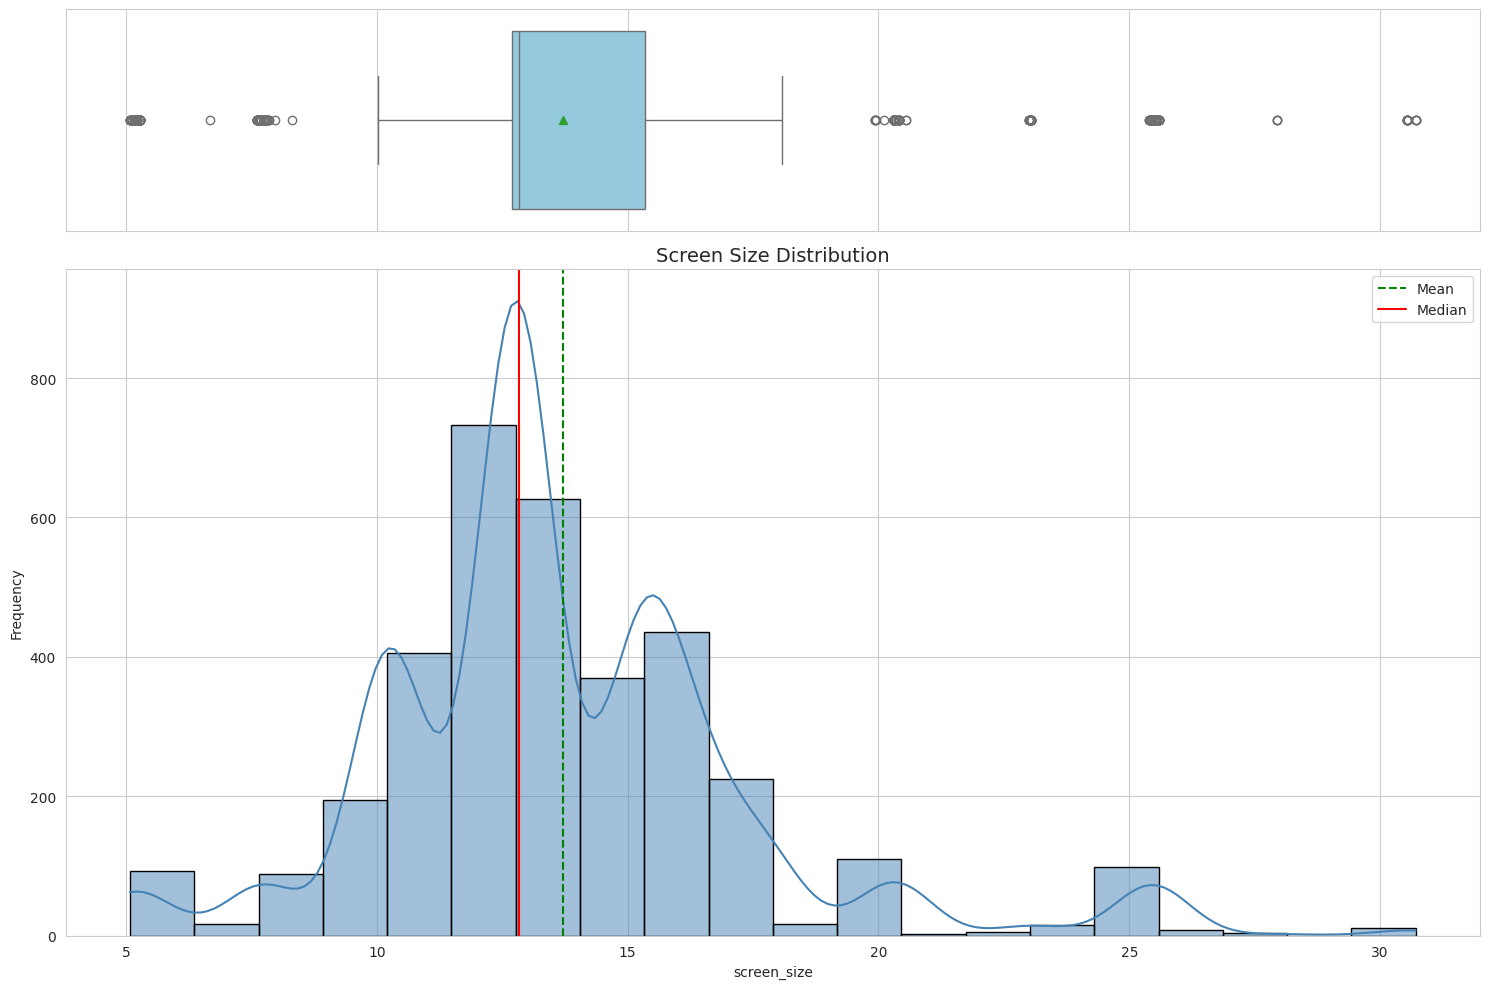

In [ ]:
histogram_boxplot(df,'screen_size',kde=True, bins=20, title="Screen Size Distribution")

Observations:

- The histogram shows a right- skewed distributio.

- The boxplot indicates the presence of multiple end outliers.

- Most values are conentrated below 18 inches.

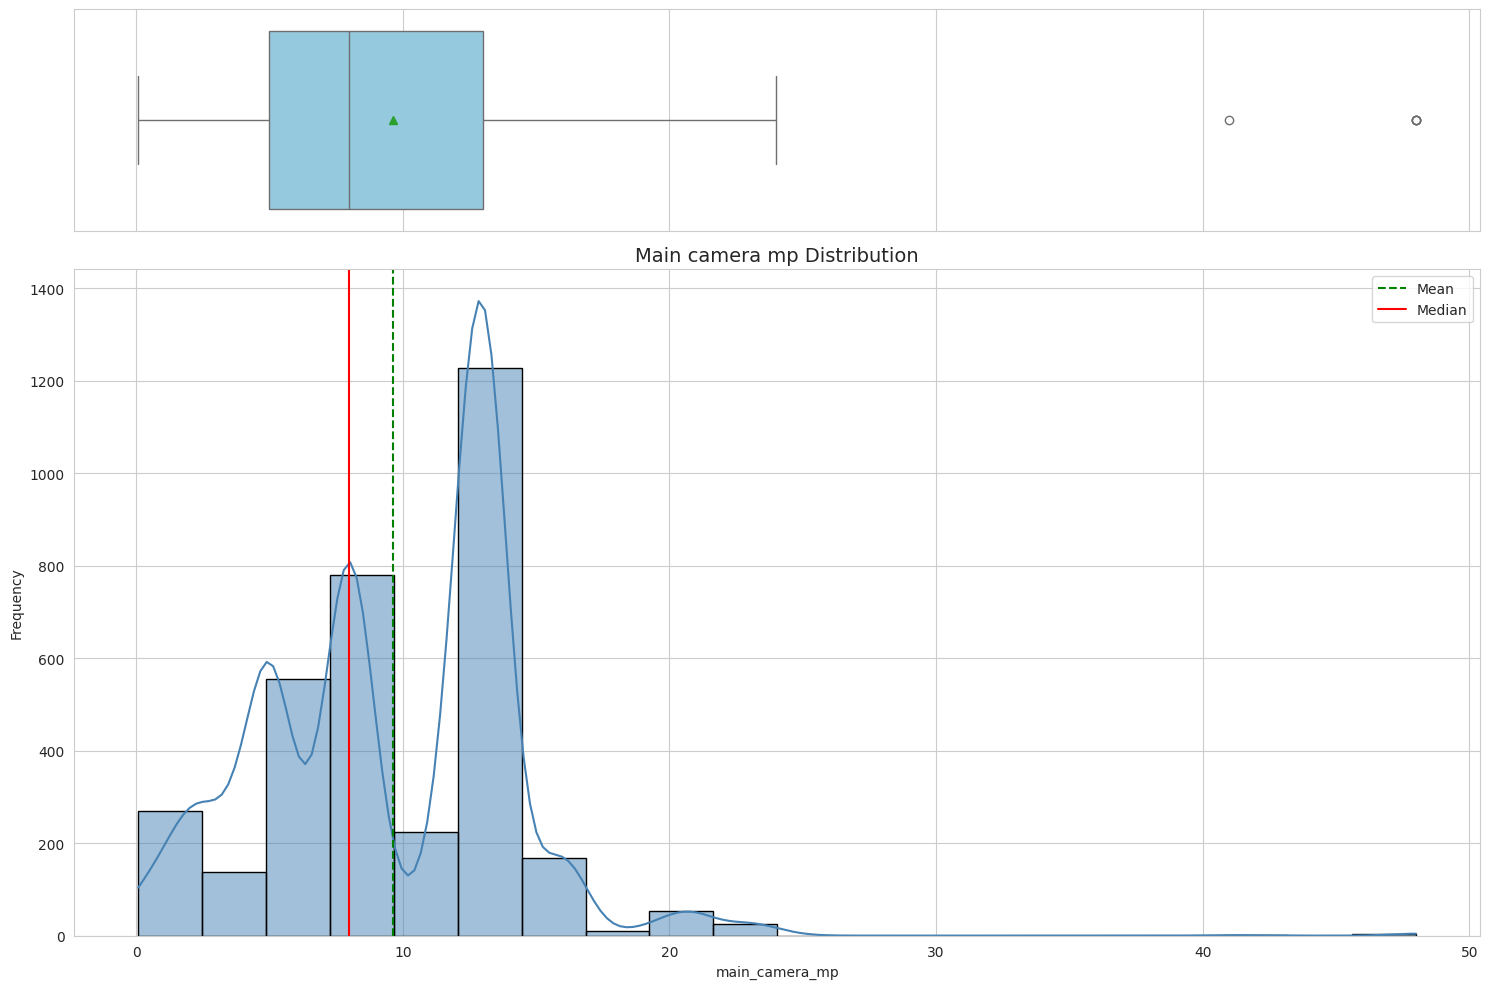

In [ ]:
histogram_boxplot(df,'main_camera_mp',kde=True, bins=20, title="Main camera mp Distribution")

Observations:
- The distribution is right skewed.

- Median is lower than the mean.

- The boxplot shows outliers.

After data processing:

Mean and median are closer, indicating a slightly improved symmetry.


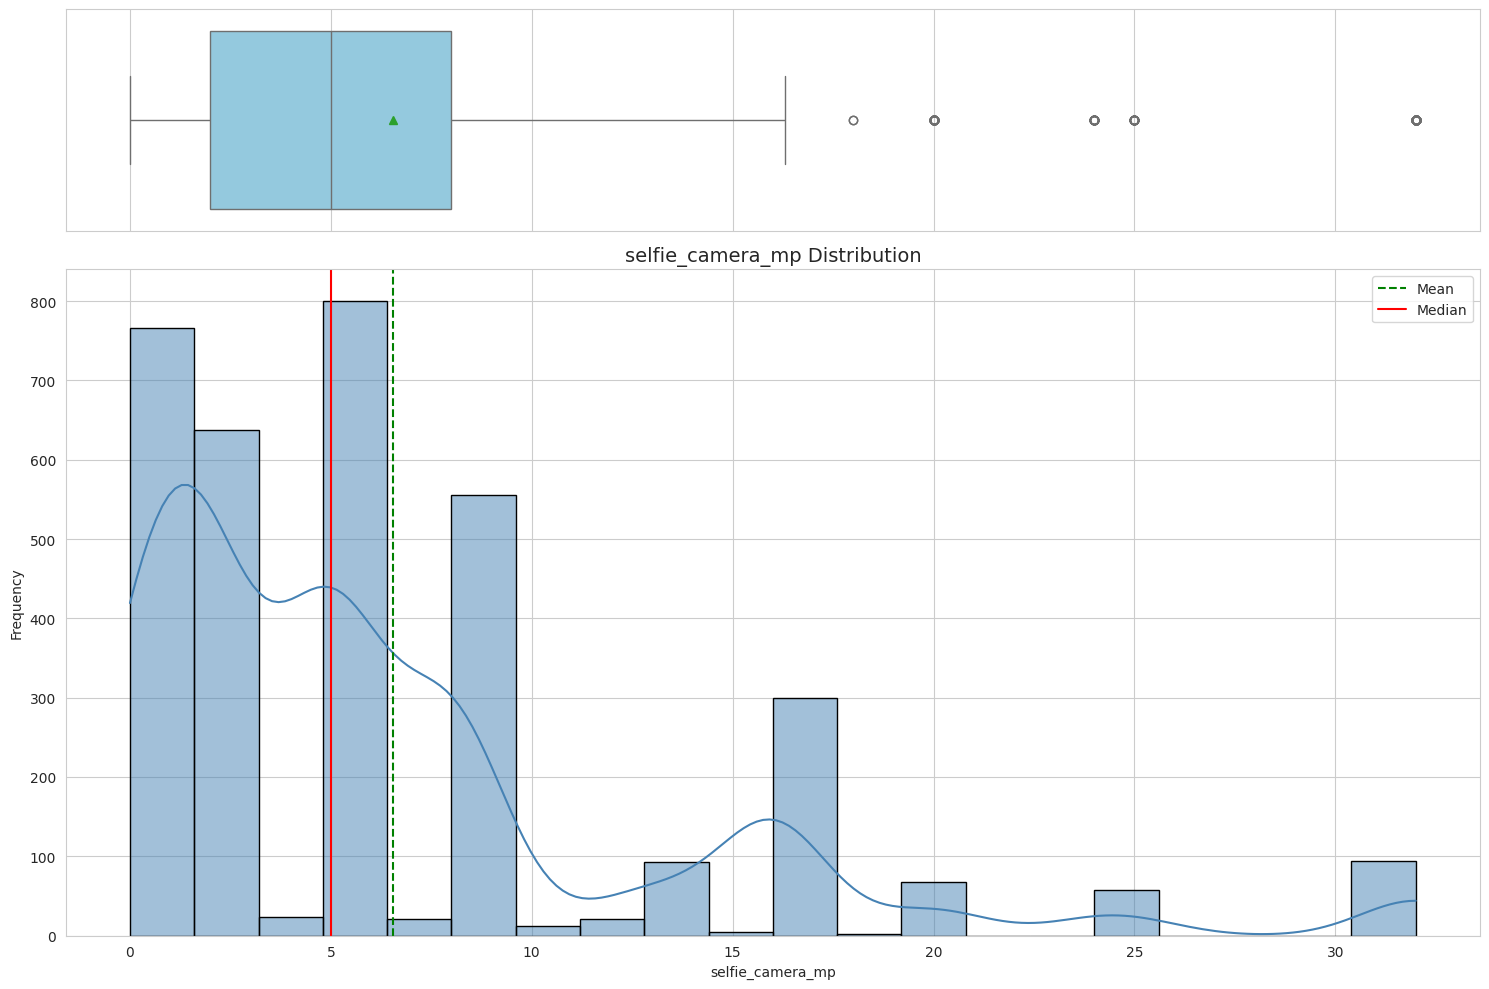

In [ ]:
histogram_boxplot(df,'selfie_camera_mp',kde=True, bins=20, title="selfie_camera_mp Distribution")

Observations:

- Outliers: Fewer outliers are present. Most extreme values seem handled.

- Distribution shape: The shape remains right-skewed, but it's smoother and  
  more continuous.

- Central Tendency: Mean and median are closer together, reducing the asymmetry.

- Histogram bins: More regularized bars; peaks remain but are better          distributed.

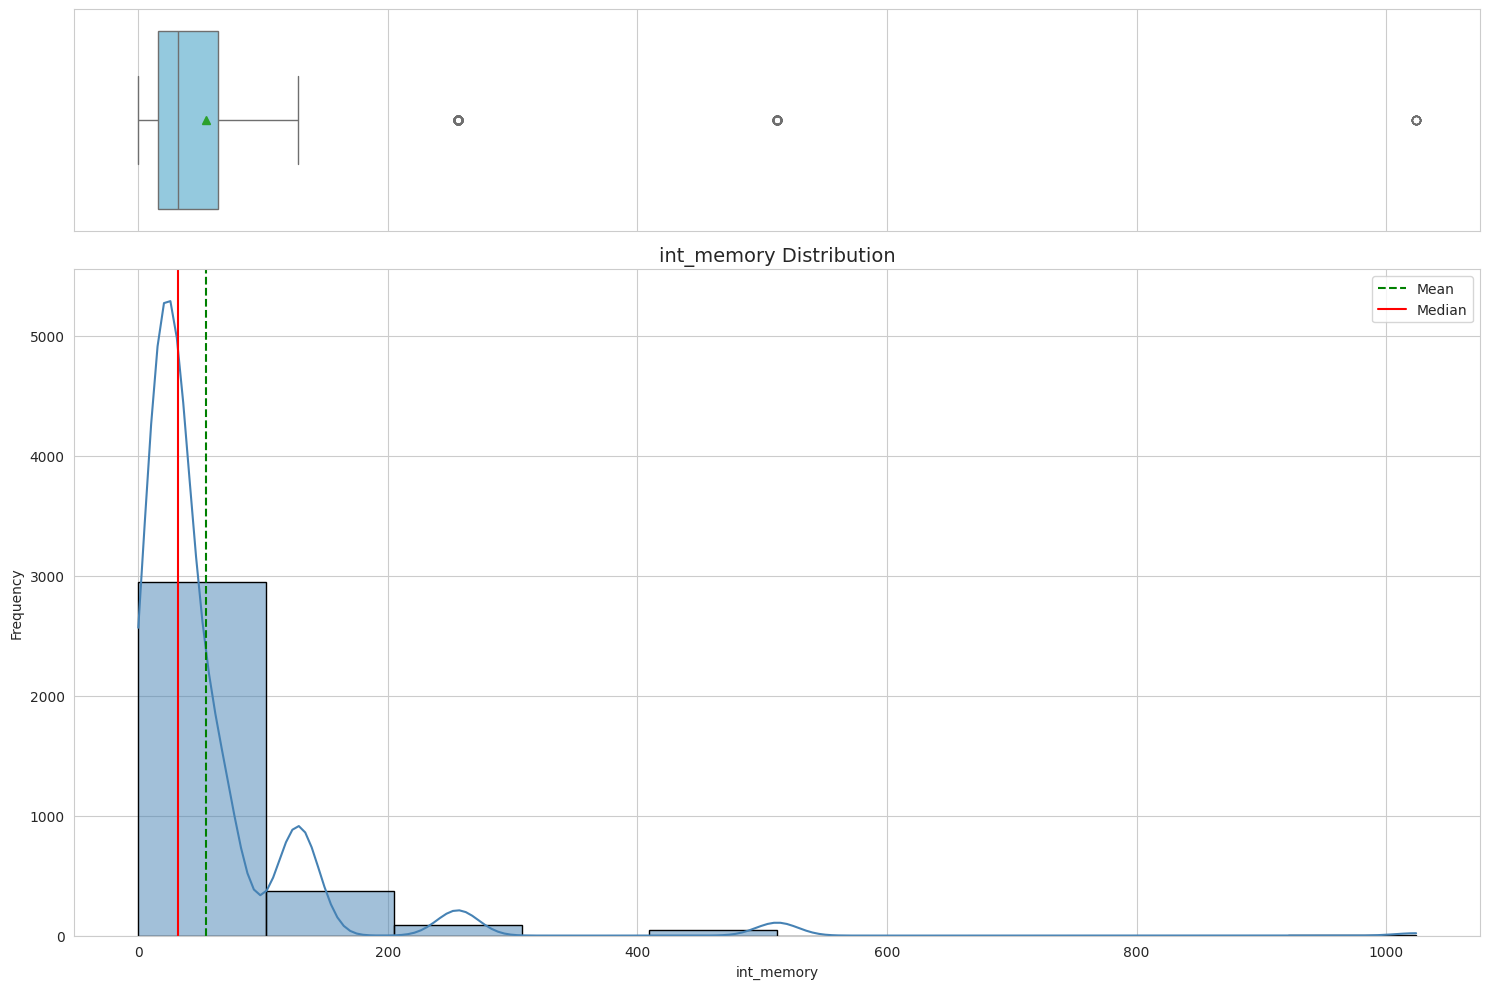

In [ ]:
histogram_boxplot(df,'int_memory',kde=True, bins=10, title="int_memory Distribution")

Observations:
No mayor changes.

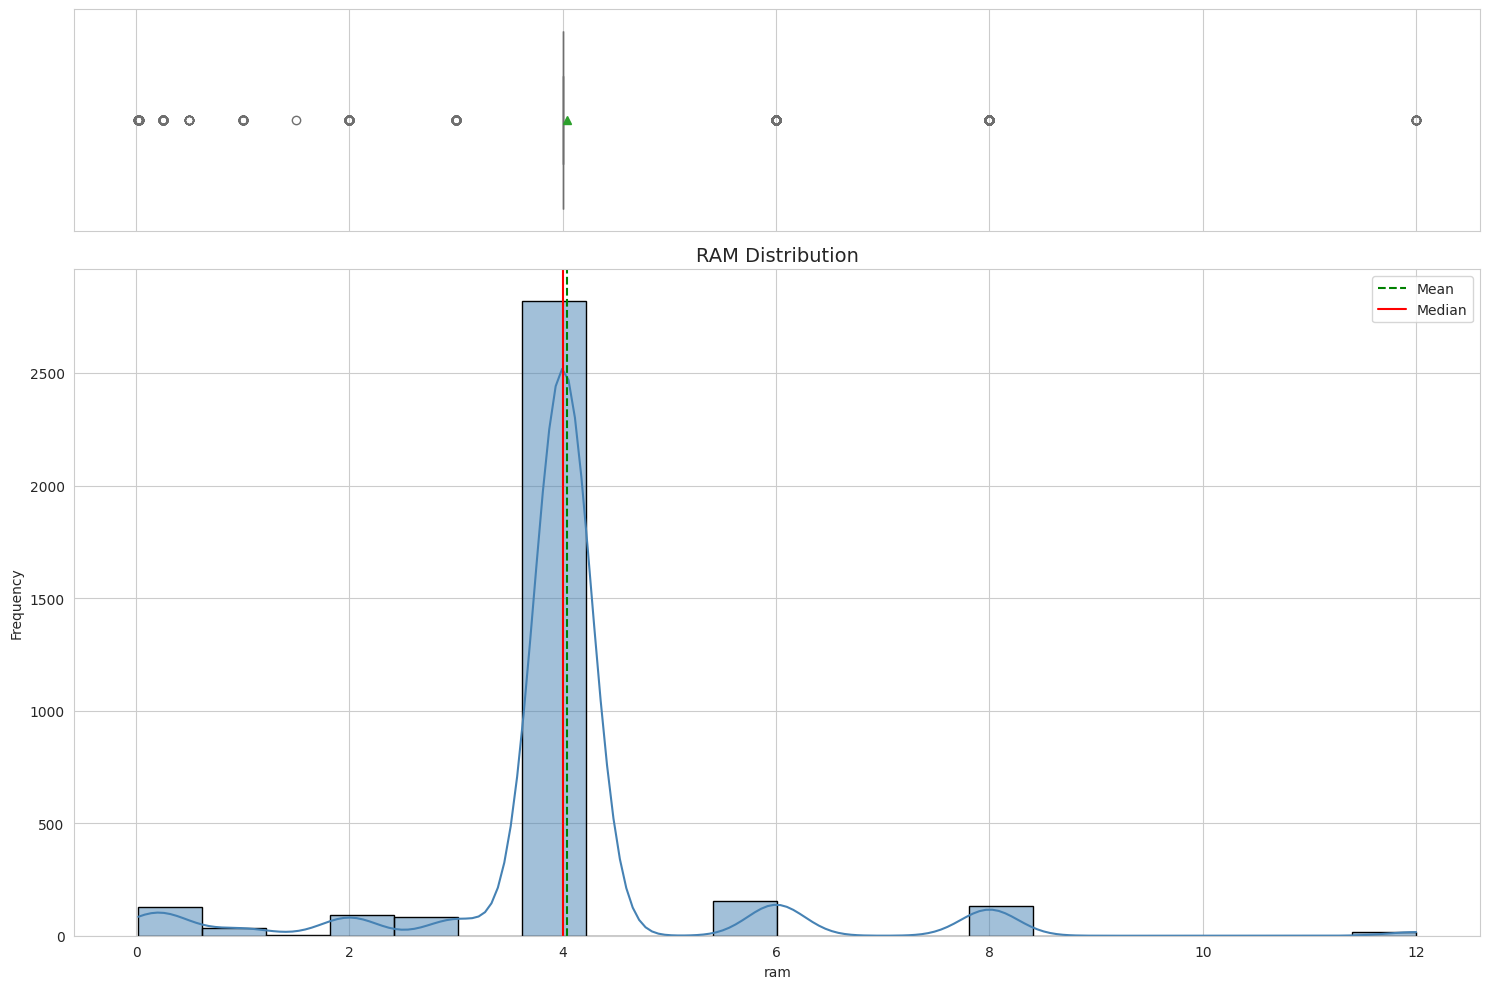

In [ ]:
histogram_boxplot(df,'ram',kde=True, bins=20, title="RAM Distribution")

Observations: No mayor changes.

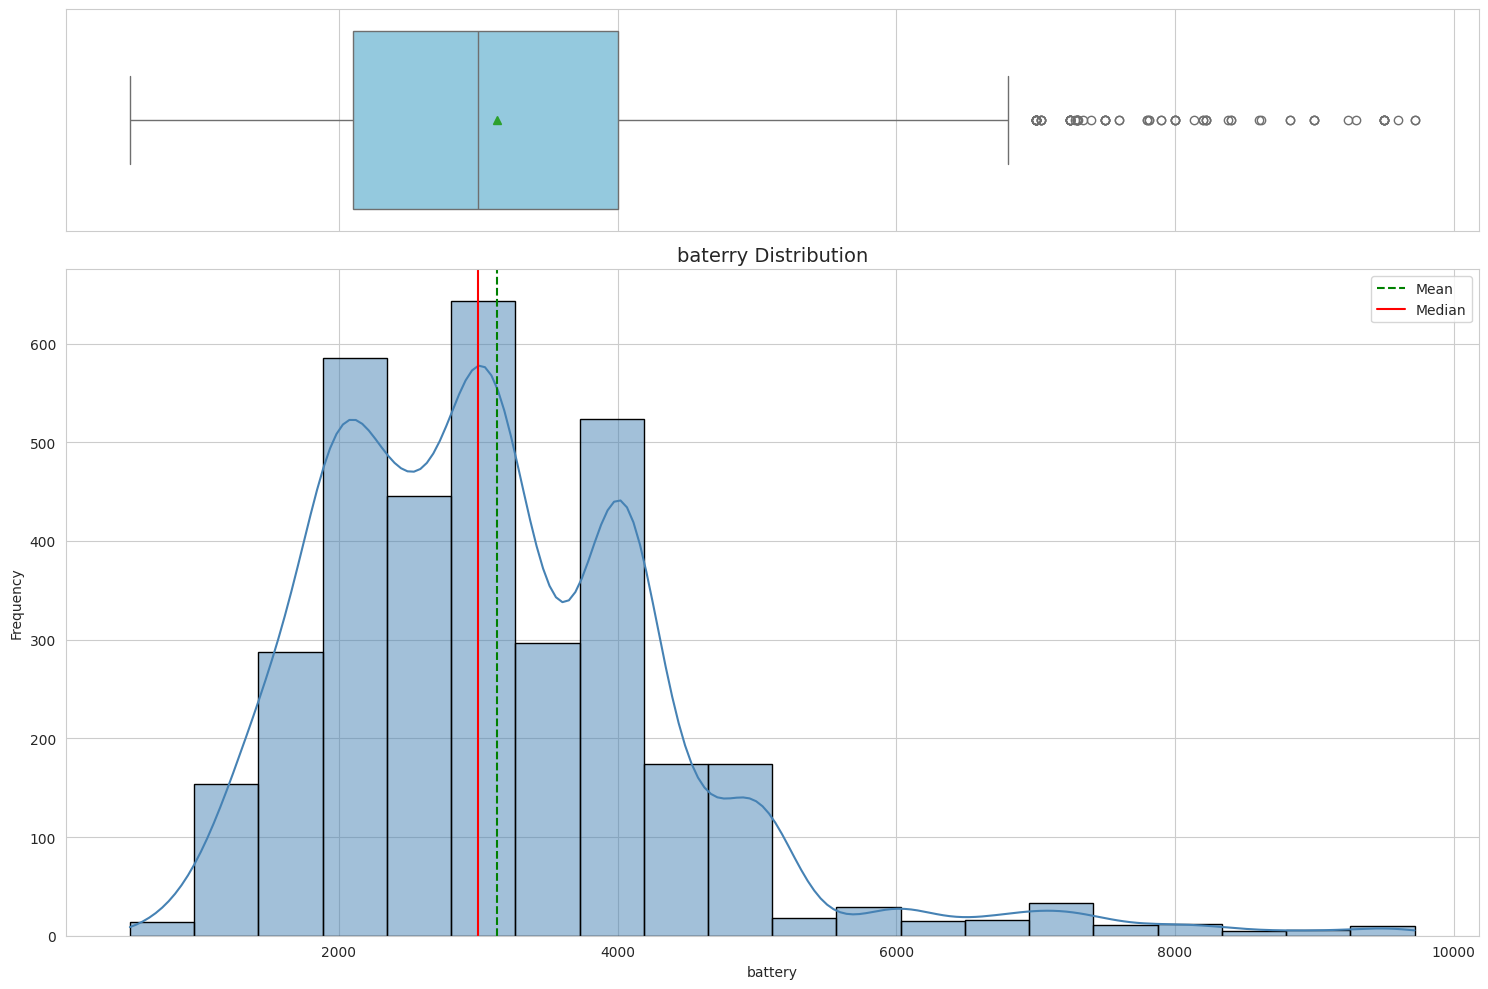

In [ ]:
histogram_boxplot(df,'battery',kde=True, bins=20, title="baterry Distribution")

Observations: No mayor changes.

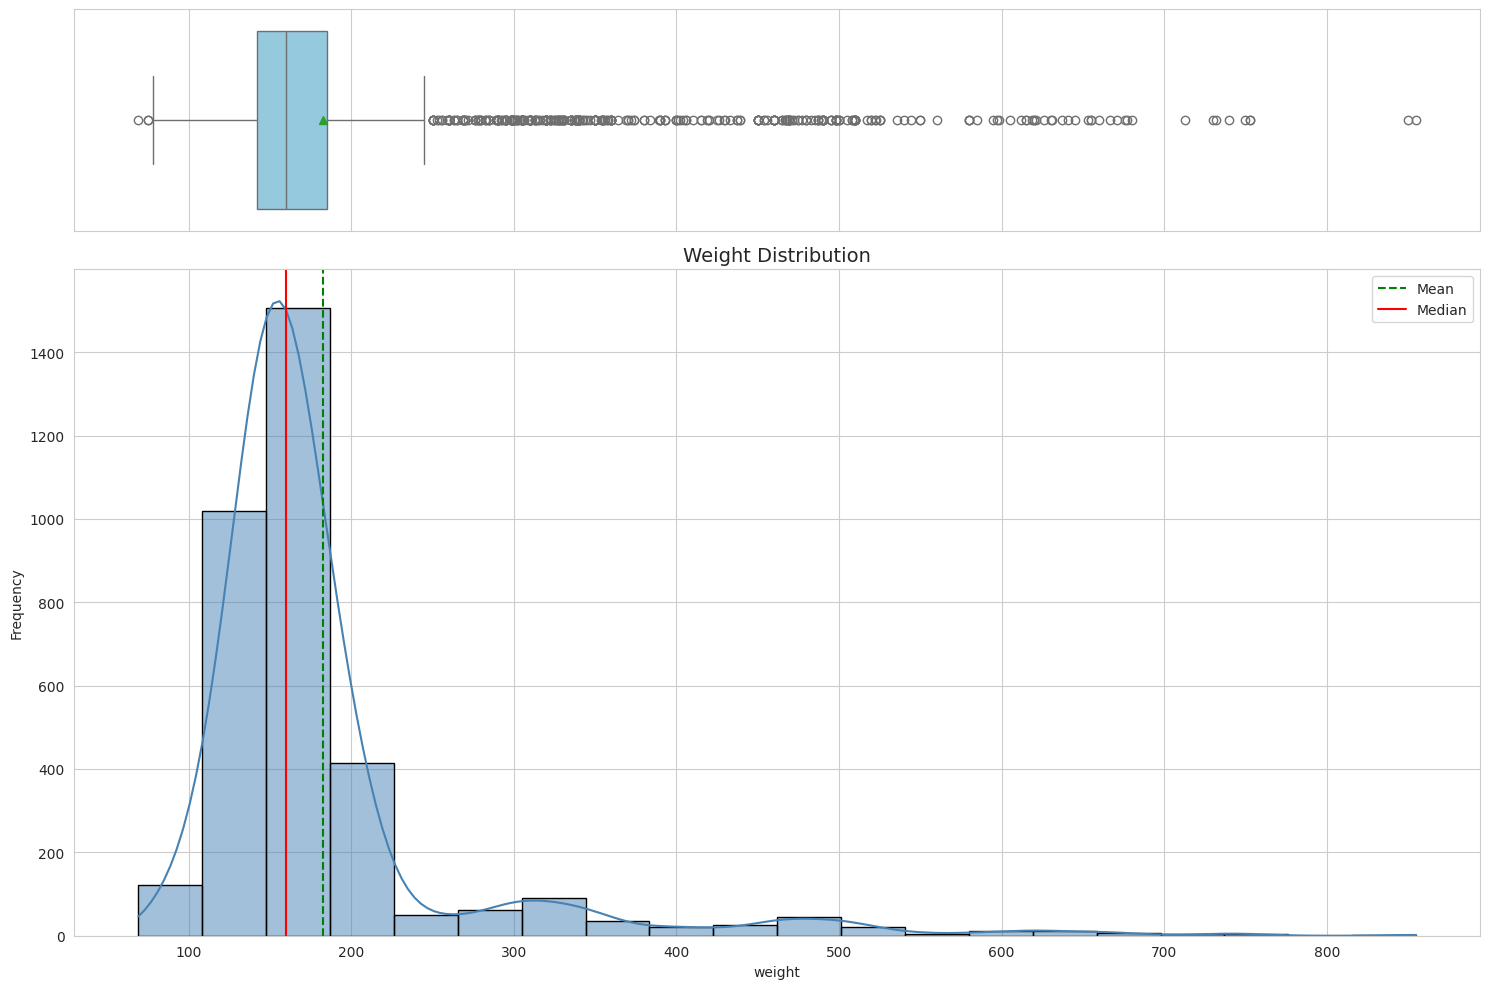

In [ ]:
histogram_boxplot(df,'weight',kde=True, bins=20, title="Weight Distribution")

Observations: No mayor changes.

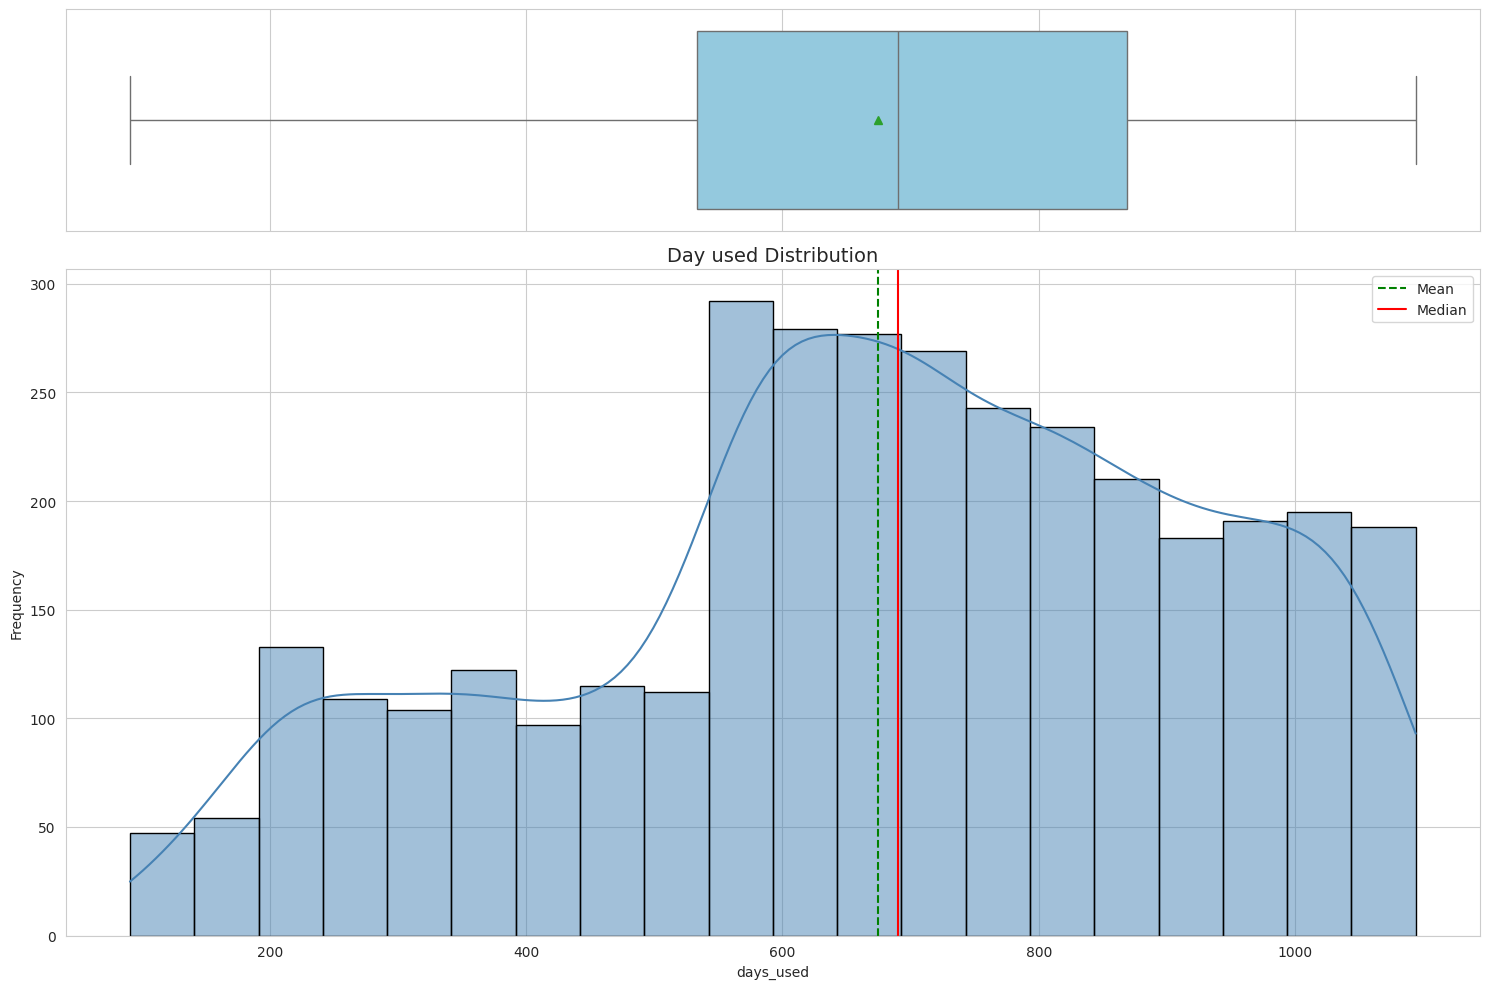

In [ ]:
histogram_boxplot(df,'days_used',kde=True, bins=20, title="Day used Distribution")

Observations: No mayor changes.

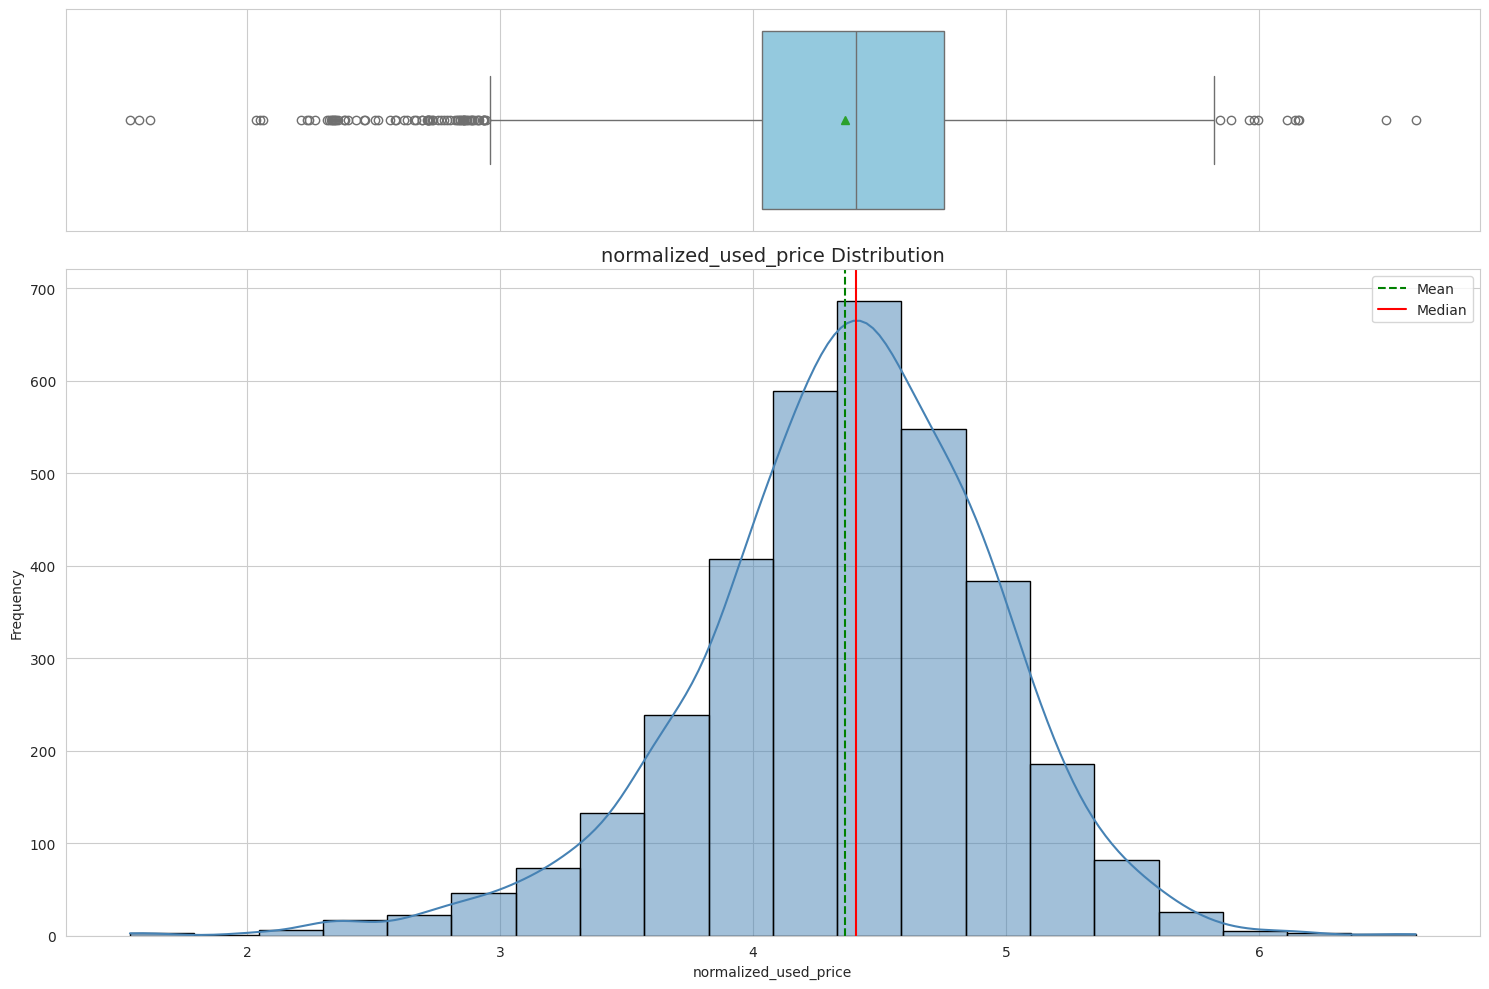

In [ ]:
histogram_boxplot(df,'normalized_used_price',kde=True, bins=20, title="normalized_used_price Distribution")

Observations: No mayor changes.

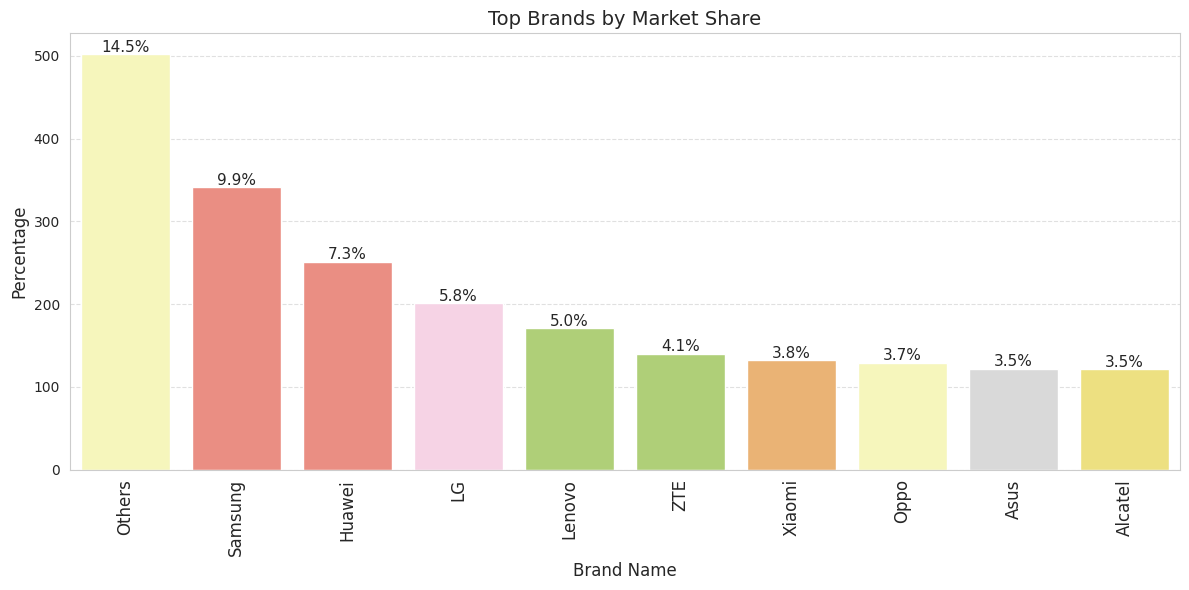

In [ ]:
labeled_barplot(df, 'brand_name', perc=True, n=10, title='Top Brands by Market Share', palette='Set3')

Observations: No mayor changes.

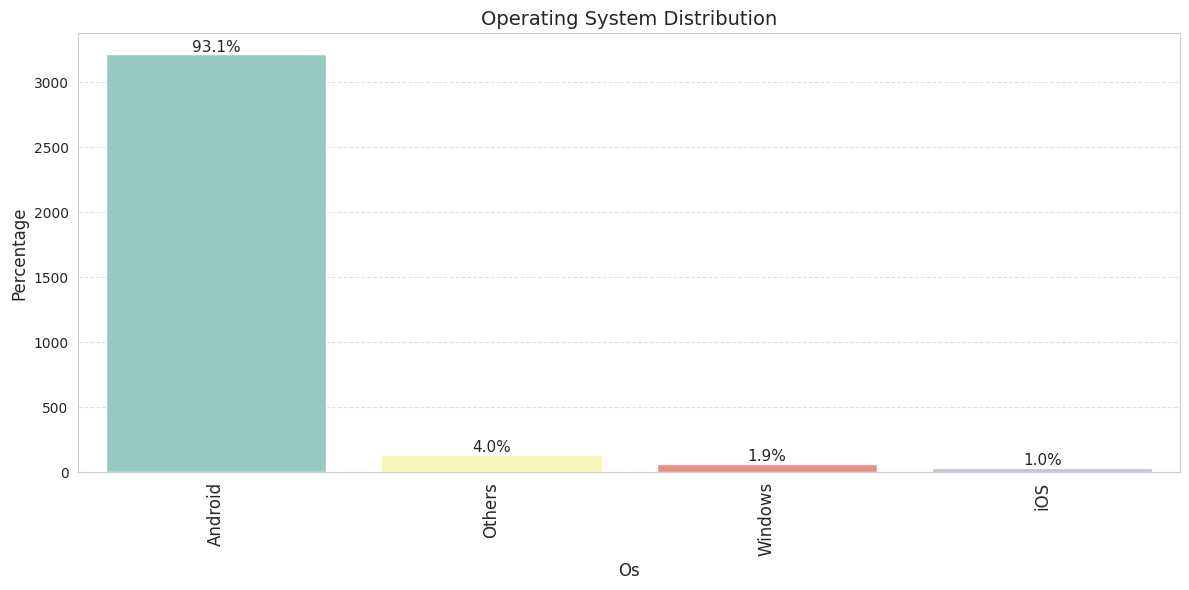

In [ ]:
labeled_barplot(df, 'os', perc=True, n=10, title='Operating System Distribution', palette='Set3')

Observations: No mayor changes.

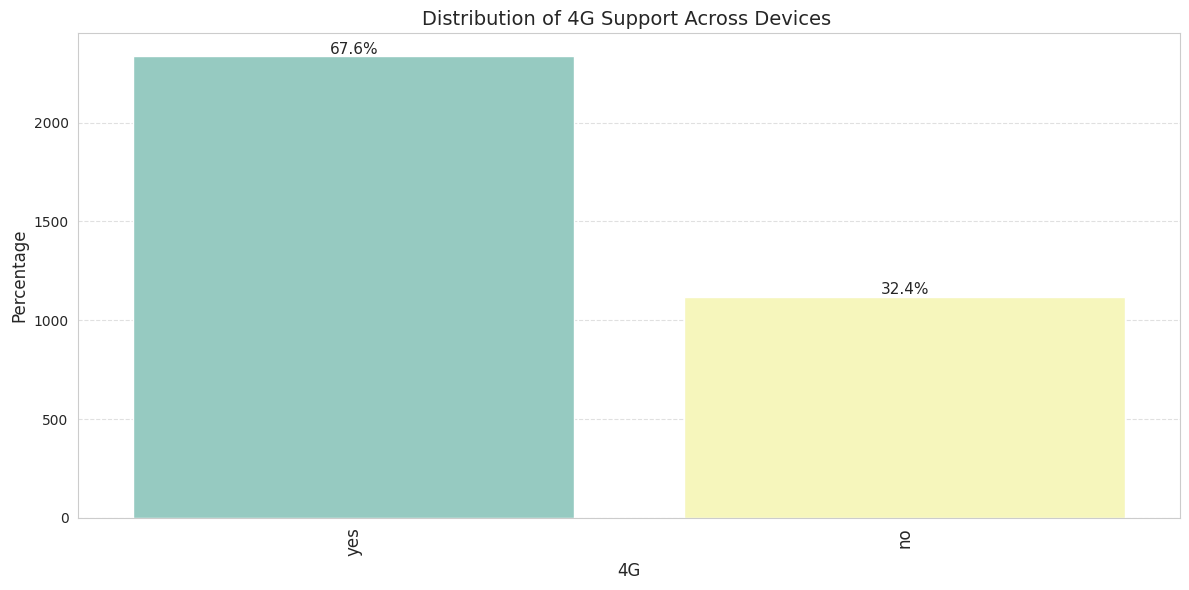

In [ ]:
labeled_barplot(df, '4g', perc=True, n=10, title='Distribution of 4G Support Across Devices ', palette='Set3')

Observations: No mayor changes.

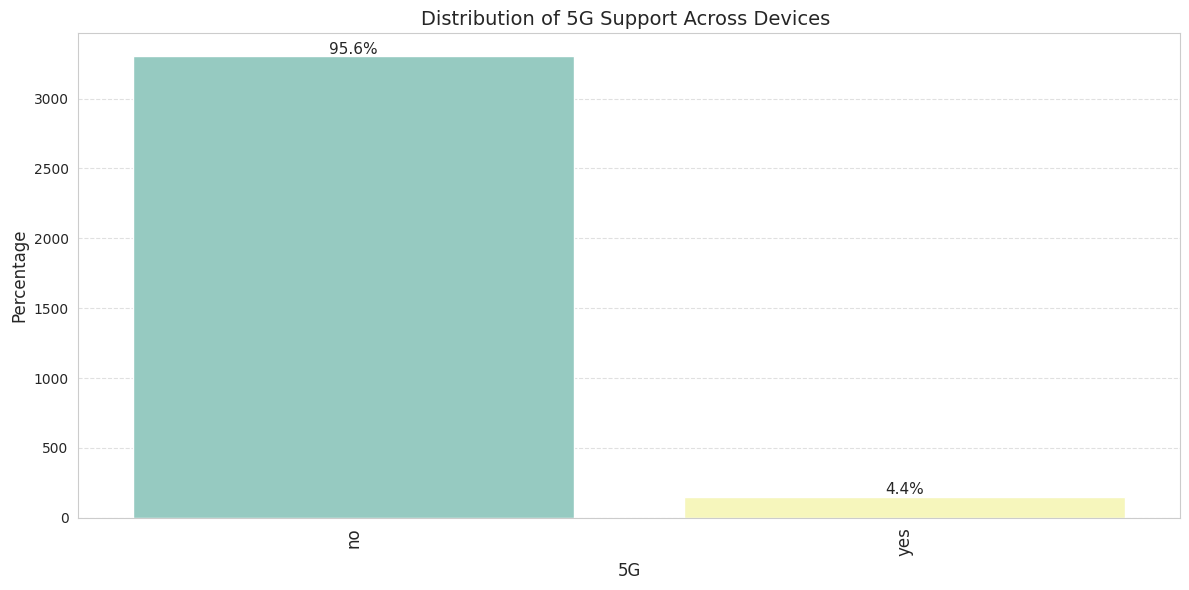

In [ ]:
labeled_barplot(df, '5g', perc=True, n=10, title='Distribution of 5G Support Across Devices ', palette='Set3')

Observations: No mayor changes.

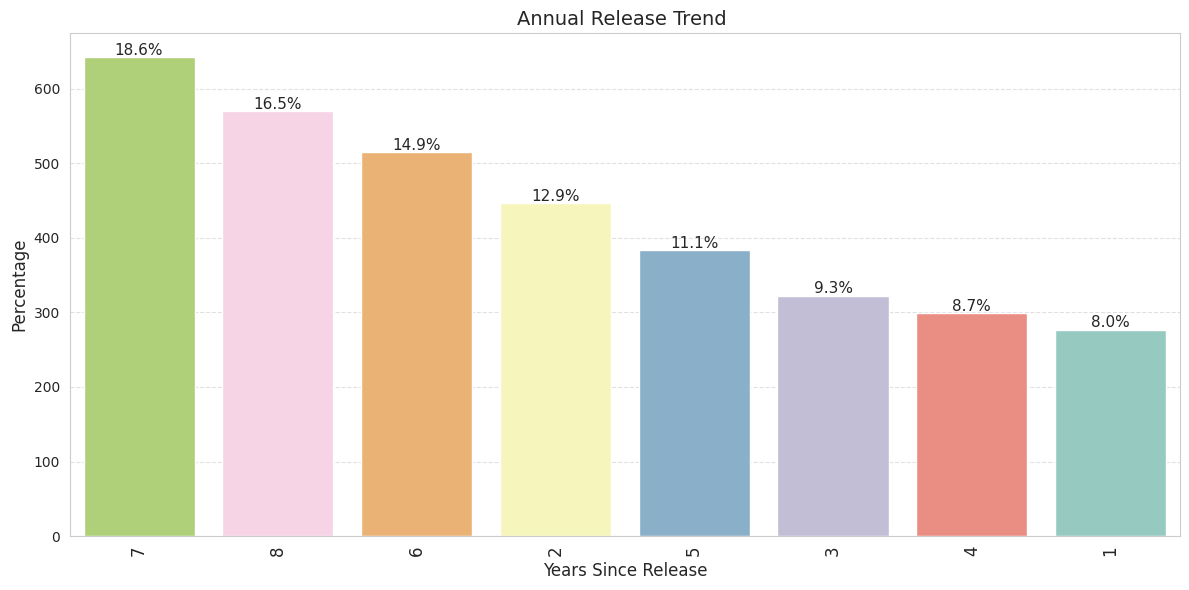

In [ ]:
labeled_barplot(df, 'years_since_release', perc=True, n=10, title='Annual Release Trend ', palette='Set3')

Observations: New Variable.

**Multivariate Analysis**

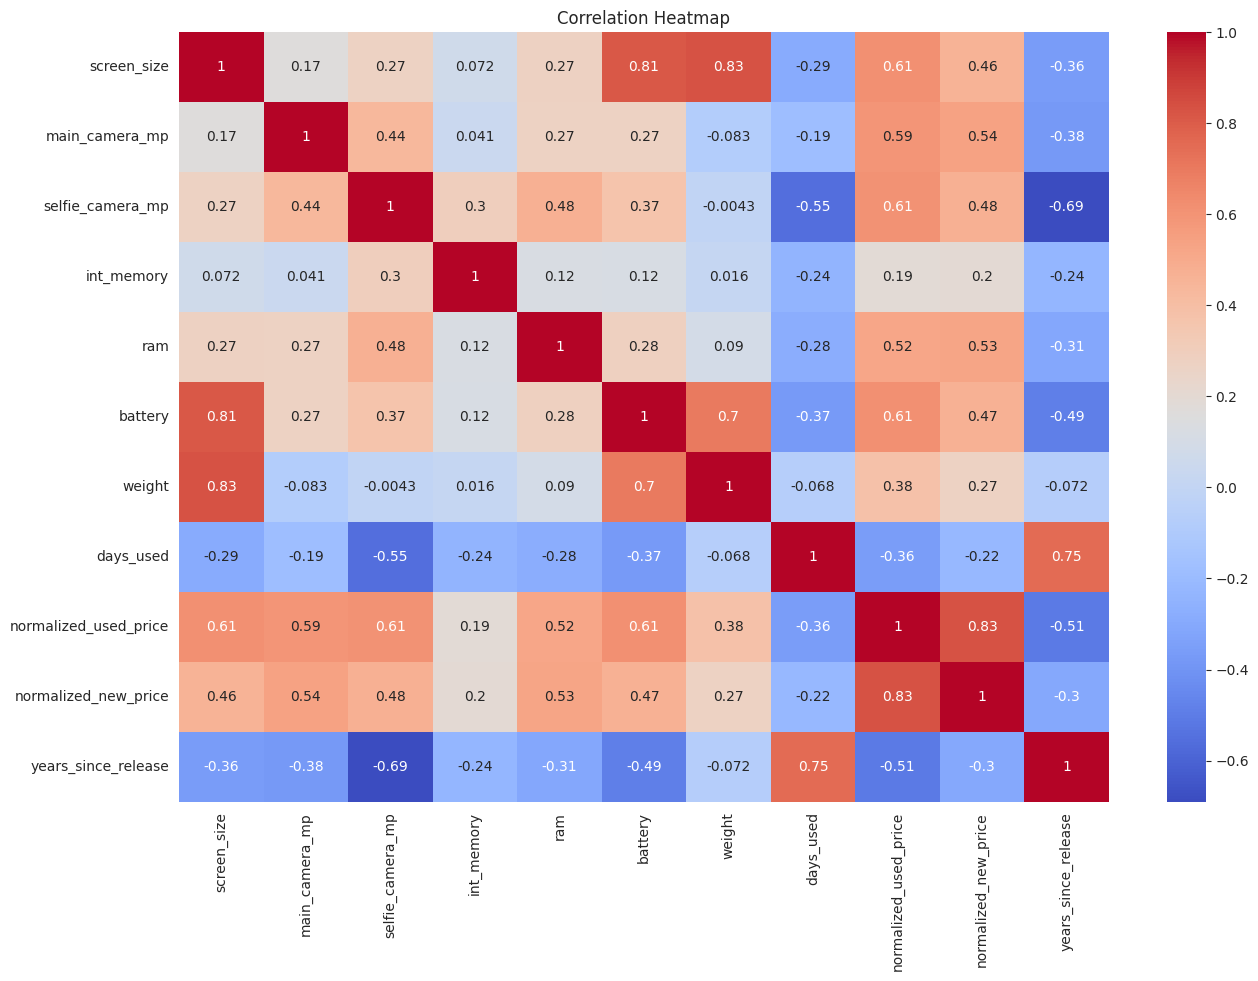

In [ ]:
#creating  variable with numerical variable
num_cols = df.select_dtypes(include=np.number).columns.tolist()

#plotting correlation
plt.figure(figsize=(15, 10))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Observations:

**Feature Set Changes**

**Old Heatmap includes:**

release_year

normalized_used_price

normalized_new_price

**New Heatmap includes:**

years_since_release (instead of release_year)

Same other features

Days used vs year since release old corr -0.75  new corr 0.75

Screen size vs normalized price  old corr 0.61 new 0.46 drop.

the rest reminds the same.

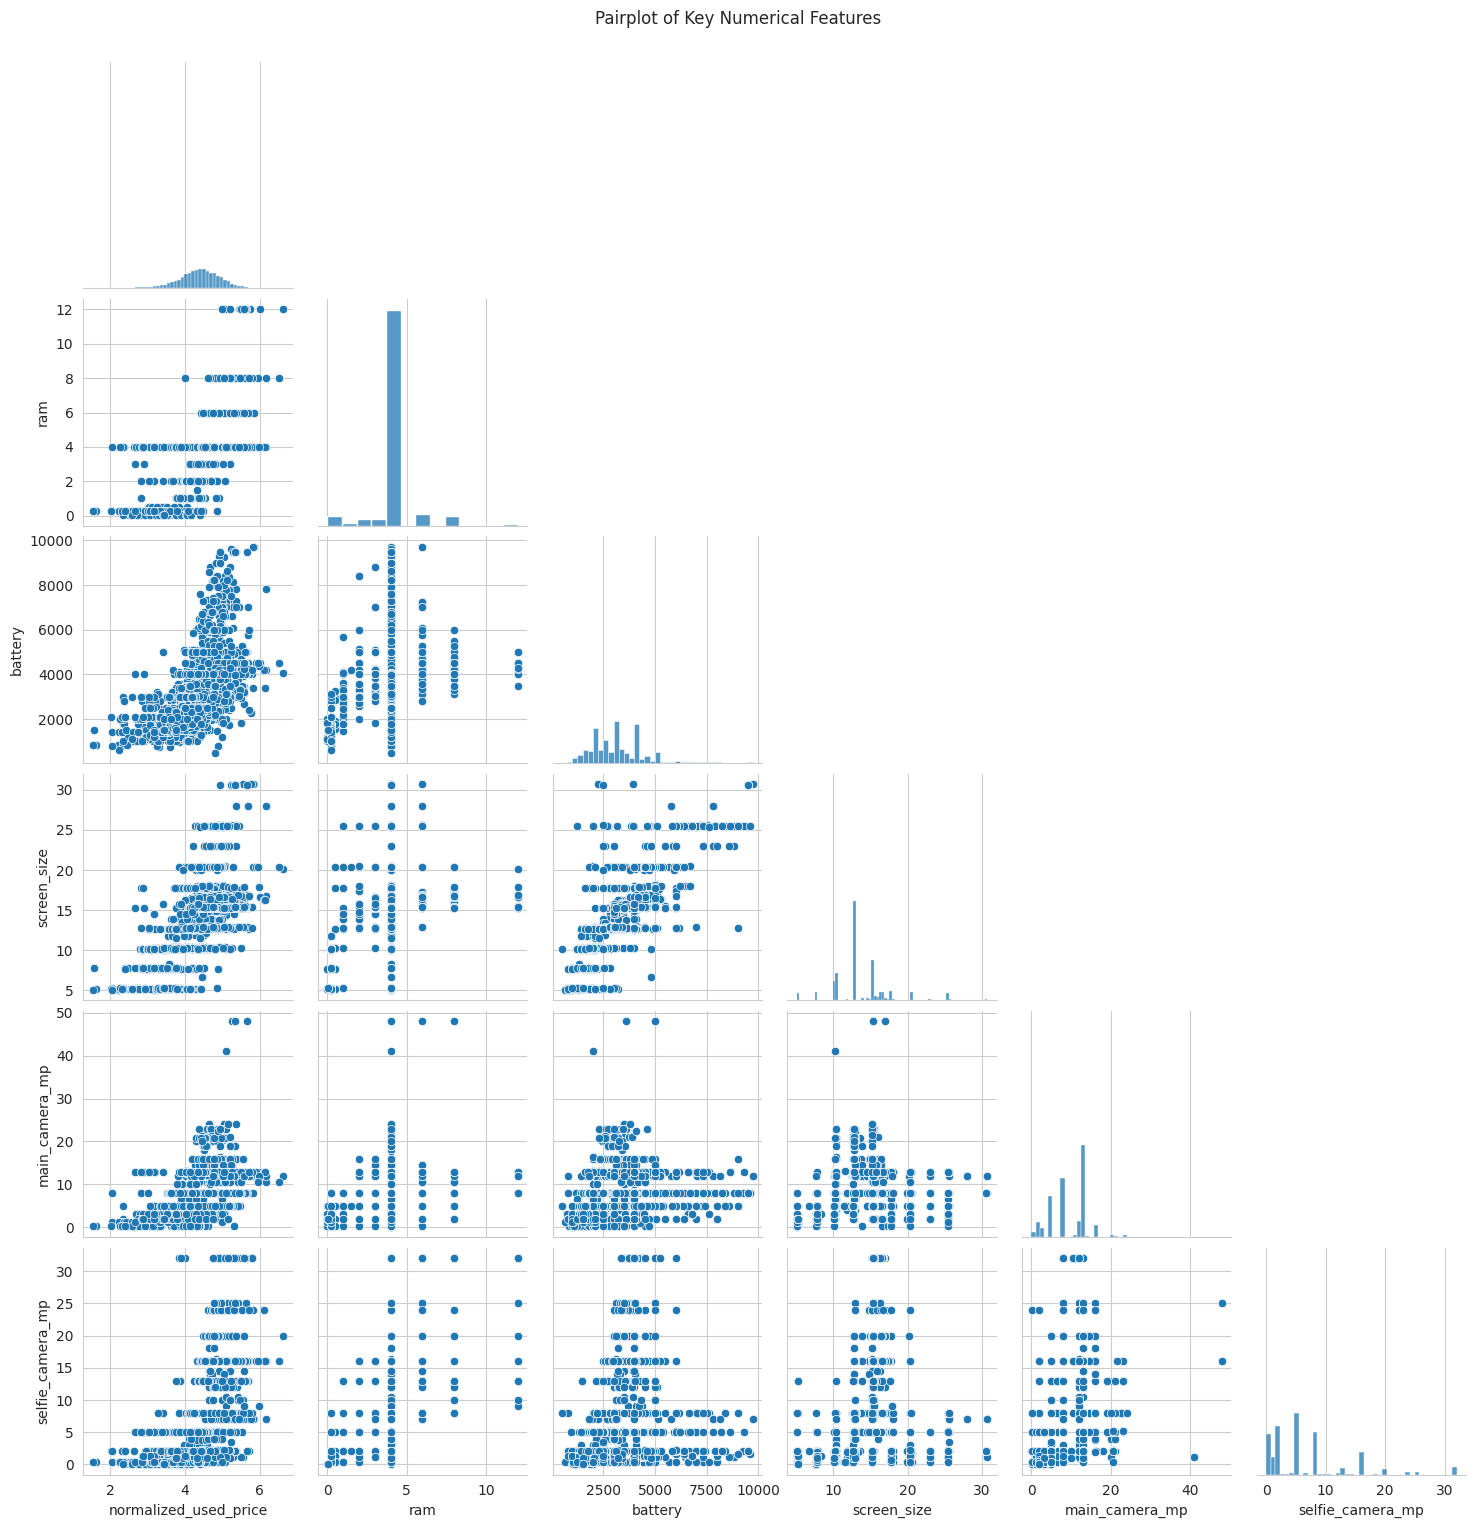

In [ ]:
selected_features = ['normalized_used_price', 'ram', 'battery', 'screen_size', 'main_camera_mp', 'selfie_camera_mp']
sns.pairplot(df[selected_features], corner=True)
plt.suptitle("Pairplot of Key Numerical Features", y=1.02)
plt.show()

Observations:

-  normalized_used_price vs:
   ram: Positive correlation — higher RAM → higher used price.

-  battery: Slight positive trend — larger battery = higher price.

-  screen_size: Moderate positive pattern — larger screens = more valuable
   devices.

-  main_camera_mp: Slight trend upwards — better camera → more expensive.

-  selfie_camera_mp: Weak correlation, some upward trend.

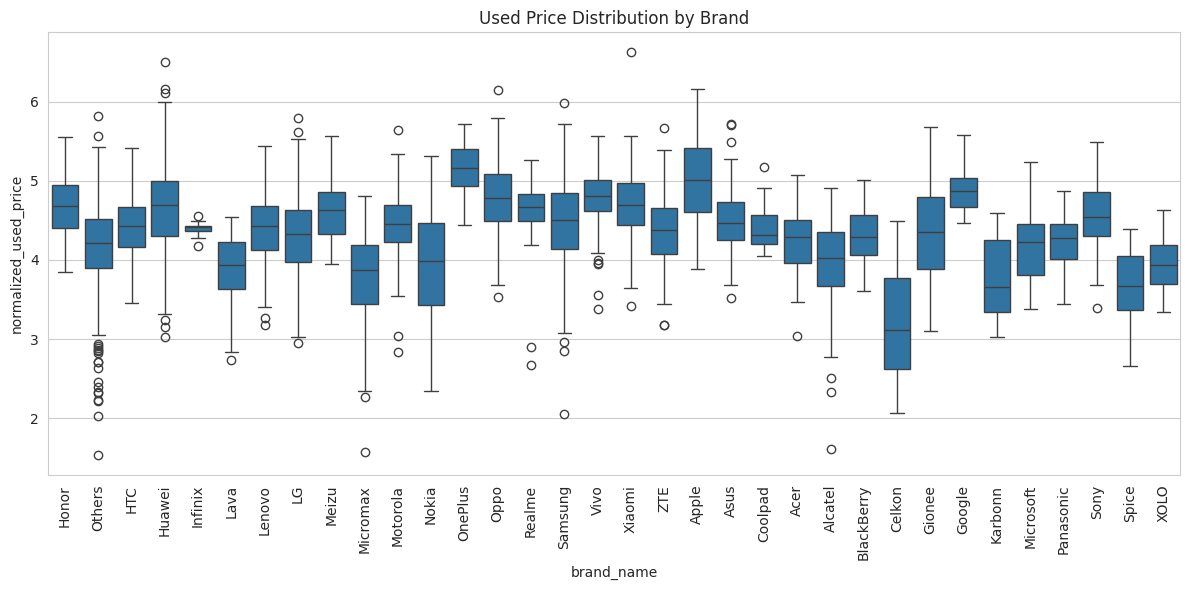

In [ ]:
#Boxplots of price vs categorical features
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='brand_name', y='normalized_used_price')
plt.title("Used Price Distribution by Brand")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Observations:

Higher priced Brands: Apple, One Plus and Google.
Micromax,Gionee and Spice some of the lowest used prices

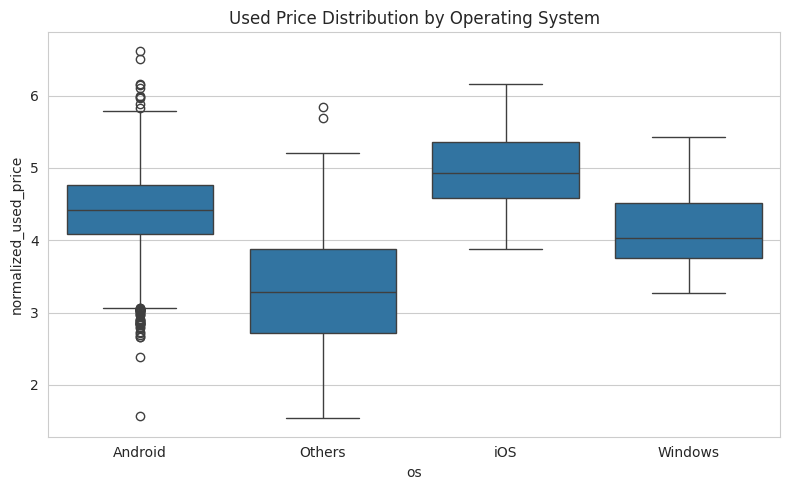

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='os', y='normalized_used_price')
plt.title("Used Price Distribution by Operating System")
plt.tight_layout()
plt.show()

Observations:
- iOS has higher median used price compared to all other operating systems.

- Android has the largest number of outliers.

- Others and Windows tend to have lower medians and wider spreads.

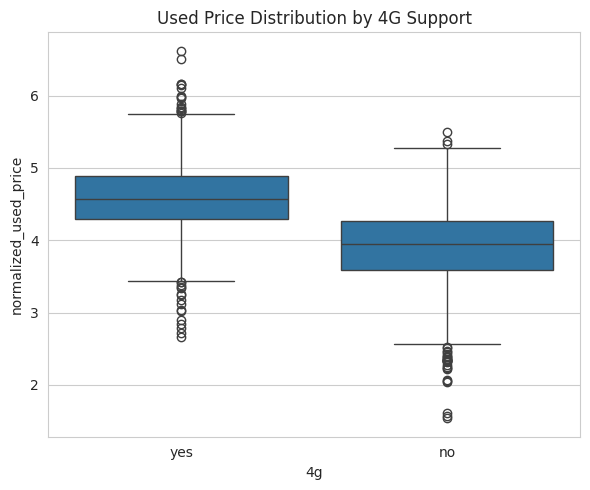

In [ ]:
plt.figure(figsize=(6, 5))
sns.boxplot(data=df, x='4g', y='normalized_used_price')
plt.title("Used Price Distribution by 4G Support")
plt.tight_layout()
plt.show()


Observations: No mayor changes.

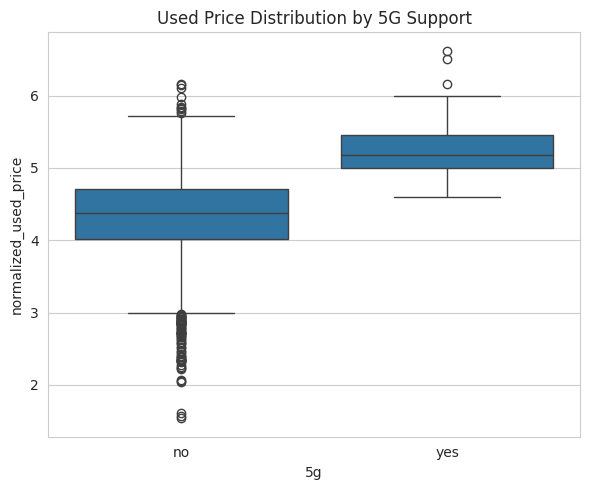

In [ ]:
plt.figure(figsize=(6, 5))
sns.boxplot(data=df, x='5g', y='normalized_used_price')
plt.title("Used Price Distribution by 5G Support")
plt.tight_layout()
plt.show()

Observations: No mayor changes.

## Model Building - Linear Regression

In [ ]:
X_train

const  screen_size  main_camera_mp  selfie_camera_mp  int_memory  ram  \
3026    1.0        10.29             8.0               0.3        16.0  4.0   
1525    1.0        15.34            13.0               5.0        32.0  4.0   
1128    1.0        12.70            13.0               5.0        32.0  4.0   
3003    1.0        12.83             8.0               5.0        16.0  4.0   
2907    1.0        12.88            13.0              16.0        16.0  4.0   
...     ...          ...             ...               ...         ...  ...   
2763    1.0        10.29             8.0               2.0        16.0  4.0   
905     1.0        10.29             5.0               0.3        16.0  4.0   
1096    1.0        15.77            13.0              24.0        64.0  4.0   
235     1.0        15.90            13.0              32.0       128.0  6.0   
1061    1.0        12.70            13.0               5.0        16.0  4.0   

      battery  weight  days_used  normalized_new_price  ...  brand_name_Spice  \
3026   1800.0   120.0      819.0              4.796204  ...               0.0   
1525   4050.0   225.0      585.0              5.434595  ...               0.0   
1128   2550.0   162.0      727.0              5.137914  ...               0.0   
3003   3200.0   126.0      800.0              5.189228  ...               0.0   
2907   2900.0   160.0      560.0              5.016220  ...               0.0   
...       ...     ...        ...                   ...  ...               ...   
2763   2100.0   155.0      802.0              5.006694  ...               1.0   
905    1800.0   145.0      850.0              5.195454  ...               0.0   
1096   3400.0   162.0      720.0              5.345392  ...               0.0   
235    3750.0   172.0      311.0              5.515845  ...               0.0   
1061   2300.0   133.0      699.0              5.602635  ...               0.0   

      brand_name_Vivo  brand_name_XOLO  brand_name_Xiaomi  brand_name_ZTE  \
3026              0.0              1.0                0.0             0.0   
1525              0.0              0.0                0.0             0.0   
1128              0.0              0.0                0.0             0.0   
3003              0.0              1.0                0.0             0.0   
2907              0.0              0.0                0.0             0.0   
...               ...              ...                ...             ...   
2763              0.0              0.0                0.0             0.0   
905               0.0              0.0                0.0             0.0   
1096              0.0              0.0                0.0             0.0   
235               0.0              0.0                0.0             0.0   
1061              0.0              0.0                0.0             0.0   

      os_Others  os_Windows  os_iOS  4g_yes  5g_yes  
3026        0.0         0.0     0.0     0.0     0.0  
1525        0.0         0.0     0.0     1.0     0.0  
1128        0.0         0.0     0.0     0.0     0.0  
3003        0.0         0.0     0.0     1.0     0.0  
2907        0.0         0.0     0.0     1.0     0.0  
...         ...         ...     ...     ...     ...  
2763        0.0         0.0     0.0     0.0     0.0  
905         0.0         0.0     0.0     0.0     0.0  
1096        0.0         0.0     0.0     1.0     0.0  
235         0.0         0.0     0.0     1.0     0.0  
1061        0.0         0.0     0.0     0.0     0.0  

[2417 rows x 49 columns]

In [ ]:
olsmodel = sm.OLS(y_train, X_train).fit()
print(olsmodel.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     268.8
Date:                   Sun, 01 Jun 2025   Prob (F-statistic):               0.00
Time:                           22:27:03   Log-Likelihood:                 124.15
No. Observations:                   2417   AIC:                            -150.3
Df Residuals:                       2368   BIC:                             133.4
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


## Model Performance Check

In [ ]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, X_train, y_train)
olsmodel_train_perf

Training Performance



RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.229856  0.180302   0.844924        0.841713  4.326213

In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, X_test, y_test)
olsmodel_test_perf

Test Performance



RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.238482  0.184868   0.842315        0.834487  4.505694

Observations:

- The model performs well on both the training and the test, suggesting it generalizes well and is not overtitting.

- The R squared values are relatively high 0.84, indicating that the model explains the 84% of the variance in the target variable.

- MAPE is under 5% which suggests the predictions are quite accurate and reliable.


## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

1. TEST FOR MULTICOLLINEARITY.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# we will define a function to check VIF
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [ ]:
#checking vif for xtrain ascending false
checking_vif(X_train).sort_values(by='VIF', ascending=False)

feature         VIF
0                   const  227.678565
12       brand_name_Apple   13.054832
46                 os_iOS   11.780766
34      brand_name_Others    9.710921
1             screen_size    7.677118
37     brand_name_Samsung    7.539832
7                  weight    6.397183
21      brand_name_Huawei    5.983857
10    years_since_release    4.898360
24          brand_name_LG    4.849589
26      brand_name_Lenovo    4.558847
6                 battery    4.081715
33        brand_name_Oppo    3.971065
43         brand_name_ZTE    3.797527
42      brand_name_Xiaomi    3.719678
40        brand_name_Vivo    3.651320
31       brand_name_Nokia    3.473140
19         brand_name_HTC    3.410252
11     brand_name_Alcatel    3.405674
28    brand_name_Micromax    3.363518
20       brand_name_Honor    3.340621
13        brand_name_Asus    3.332003
30    brand_name_Motorola    3.274455
9    normalized_new_price    3.119569
38        brand_name_Sony    2.943127
3        selfie_camera_mp    2.810716
8               days_used    2.660002
47                 4g_yes    2.468374
2          main_camera_mp    2.284685
5                     ram    2.255246
27       brand_name_Meizu    2.179607
41        brand_name_XOLO    2.138074
35   brand_name_Panasonic    2.105711
17      brand_name_Gionee    1.951247
36      brand_name_Realme    1.946675
29   brand_name_Microsoft    1.869558
44              os_Others    1.854134
48                 5g_yes    1.811042
15      brand_name_Celkon    1.774820
25        brand_name_Lava    1.711317
39       brand_name_Spice    1.688868
14  brand_name_BlackBerry    1.632250
45             os_Windows    1.595291
23     brand_name_Karbonn    1.573683
16     brand_name_Coolpad    1.467981
32     brand_name_OnePlus    1.437047
4              int_memory    1.364057
18      brand_name_Google    1.321771
22     brand_name_Infinix    1.283814

Observations:

- There are multiple columns with high VIF values, indicating the presence of
  strong multicollinearity.

- High VIF for dummy variables will be ignored.   

**Removing Multicollinearity**

In [ ]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [ ]:
# list of high VIF columns
col_list = ['screen_size','weight']

res = treating_multicollinearity(X_train, y_train, col_list)
res

col  Adj. R-squared after_dropping col  RMSE after dropping col
0  screen_size                           0.838427                 0.234670
1       weight                           0.838102                 0.234906

In [ ]:
col_to_drop = "weight"
x_train2 = X_train.loc[:, ~X_train.columns.str.startswith(col_to_drop)]
x_test2 = X_test.loc[:, ~X_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  weight


feature         VIF
0                   const  208.922580
1             screen_size    3.592842
2          main_camera_mp    2.188419
3        selfie_camera_mp    2.786299
4              int_memory    1.363914
5                     ram    2.253162
6                 battery    3.681148
7               days_used    2.648007
8    normalized_new_price    3.116373
9     years_since_release    4.726162
10     brand_name_Alcatel    3.405614
11       brand_name_Apple   13.049255
12        brand_name_Asus    3.329491
13  brand_name_BlackBerry    1.632202
14      brand_name_Celkon    1.774351
15     brand_name_Coolpad    1.467907
16      brand_name_Gionee    1.951199
17      brand_name_Google    1.321649
18         brand_name_HTC    3.408324
19       brand_name_Honor    3.339001
20      brand_name_Huawei    5.983687
21     brand_name_Infinix    1.282261
22     brand_name_Karbonn    1.573602
23          brand_name_LG    4.848760
24        brand_name_Lava    1.711094
25      brand_name_Lenovo    4.557480
26       brand_name_Meizu    2.179174
27    brand_name_Micromax    3.363420
28   brand_name_Microsoft    1.867493
29    brand_name_Motorola    3.269448
30       brand_name_Nokia    3.467817
31     brand_name_OnePlus    1.436755
32        brand_name_Oppo    3.971041
33      brand_name_Others    9.680222
34   brand_name_Panasonic    2.105695
35      brand_name_Realme    1.946643
36     brand_name_Samsung    7.537301
37        brand_name_Sony    2.939129
38       brand_name_Spice    1.687000
39        brand_name_Vivo    3.650605
40        brand_name_XOLO    2.136751
41      brand_name_Xiaomi    3.719672
42         brand_name_ZTE    3.795567
43              os_Others    1.739066
44             os_Windows    1.595291
45                 os_iOS   11.746983
46                 4g_yes    2.448407
47                 5g_yes    1.808867

Observations;

- After weight drop the variable screen size drecresead to 3.592842.

- Multicollinearity assumption is satisfied.

In [ ]:
olsmod1 = sm.OLS(y_train, x_train2).fit()
print(olsmod1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.841
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     267.1
Date:                   Sun, 01 Jun 2025   Prob (F-statistic):               0.00
Time:                           22:27:04   Log-Likelihood:                 95.864
No. Observations:                   2417   AIC:                            -95.73
Df Residuals:                       2369   BIC:                             182.2
Df Model:                             47                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


Observations;

- We can see that adj. R-squared has dropped from 0.842 to 0.838, which shows
  that the dropped columns did not have much effect on the model.

- As there is no multicollinearity, we can look at the p-values of predictor
  variables to check their significance.

**Dealing with high p-value variables**

In [ ]:
# initial list of columns
predictors = x_train2.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'days_used', 'normalized_new_price', 'years_since_release', 'brand_name_Lenovo', 'brand_name_Nokia', 'brand_name_Xiaomi', '4g_yes']


In [ ]:
x_train3 = x_train2[selected_features]
x_test3 = x_test2[selected_features]

In [ ]:
olsmod2 = sm.OLS(y_train, x_train3).fit()
print(olsmod2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.839
Method:                    Least Squares   F-statistic:                     1142.
Date:                   Sun, 01 Jun 2025   Prob (F-statistic):               0.00
Time:                           22:27:04   Log-Likelihood:                 81.263
No. Observations:                   2417   AIC:                            -138.5
Df Residuals:                       2405   BIC:                            -69.04
Df Model:                             11                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmod2, x_train3, y_train)
olsmod2_train_perf

Training Performance



RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.233971  0.183164   0.839322         0.83852  4.391883

In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmod2, x_test3, y_test)
olsmod2_test_perf

Test Performance



RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.238649  0.185079   0.842094        0.840244  4.503761

Observations:

- Adjusted R-squared is 0.839, and the model explains approximately 84% of the
  variance.

- X_train3 will be used as predictor variable.



2. TEST FOR LINEARITY AND INDEPENDENCE.

In [ ]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head()

Actual Values  Fitted Values  Residuals
3026       4.087488       3.858597   0.228891
1525       4.448399       4.613881  -0.165481
1128       4.315353       4.277473   0.037879
3003       4.282068       4.252306   0.029762
2907       4.456438       4.440256   0.016182

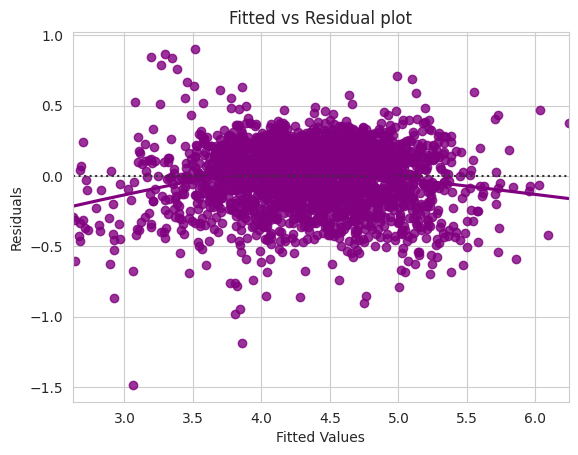

In [ ]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

Observations:
- We see no pattern in the plot above. Hence, the assumptions of linearity and
  independence are satisfied.

3. TEST FOR NORMALITY.

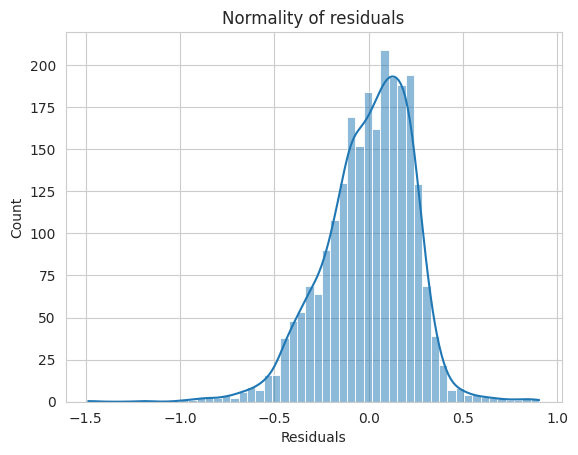

In [ ]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

Observations:
- The histogram of residuals does have a bell shape.

  Let's check the Q-Q plot.  

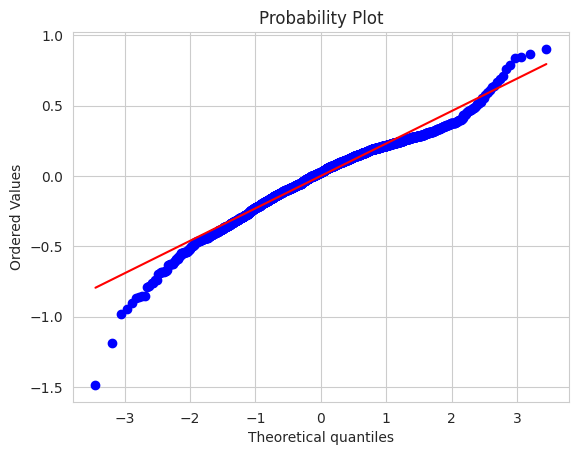

In [ ]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

Observations:
- The residuals more or less follow a straight line except for the tails.

In [ ]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=np.float64(0.9724241004267455), pvalue=np.float64(3.531041146339637e-21))

Observations:

- Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk
  test.

- Strictly speaking, the residuals are not normal.

However, as an approximation, we can accept this distribution as close to being normal.
So, the assumption is satisfied.

4. TEST FOR HOMOSCEDASTICITY

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3)
lzip(name, test)

[('F statistic', np.float64(1.0549547928161285)),
 ('p-value', np.float64(0.17747729397306325))]

Observations:

- Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied.




5. Predictions on test data

In [ ]:
# predictions on the test set
pred = olsmod2.predict(x_test3)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

Actual  Predicted
1995  4.566741   4.370129
2341  3.696103   3.954351
1913  3.592093   3.760839
688   4.306495   4.099458
650   4.522115   5.117711
2291  4.259294   4.392155
40    4.997685   5.404694
1884  3.875359   4.103666
2538  4.206631   4.044502
45    5.380450   5.301431

Observations:

- We can observe here that our model has returned pretty good prediction
  results, and the actual and predicted values are comparable.

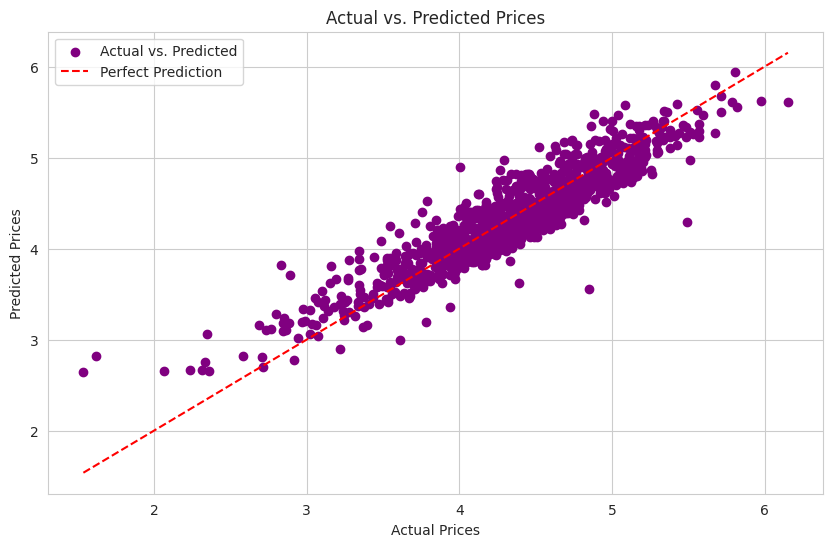

In [ ]:
#Visualize actual vs. predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, pred, color="purple", label="Actual vs. Predicted")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", label="Perfect Prediction")
plt
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices")
plt.legend()
plt.show()

Observations:

Tight clustering around the red line (perfect prediction) indicates:

- High accuracy.

- Low variance in residuals.

- Only minor dispersion at the extremes.

- olsmod2 will be used for our final model.

## Final Model

In [ ]:
x_train_final = x_train3.copy()
x_test_final = x_test3.copy()

In [ ]:
olsmodel_final = sm.OLS(y_train, x_train_final).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.839
Method:                    Least Squares   F-statistic:                     1142.
Date:                   Sun, 01 Jun 2025   Prob (F-statistic):               0.00
Time:                           22:27:06   Log-Likelihood:                 81.263
No. Observations:                   2417   AIC:                            -138.5
Df Residuals:                       2405   BIC:                            -69.04
Df Model:                             11                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(
    olsmodel_final, x_train_final, y_train
)
olsmodel_final_train_perf

Training Performance



RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.233971  0.183164   0.839322         0.83852  4.391883

In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(
    olsmodel_final, x_test_final, y_test
)
olsmodel_final_test_perf

Test Performance



RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.238649  0.185079   0.842094        0.840244  4.503761

## Actionable Insights and Recommendations

**Insights:**

- Top Predictors of used devise price:

   * Camera Specs (main + selfie): Positively and significantly influence  
     resale value.

   * RAM: A core determinant — higher RAM = higher resale value.

   * Normalized_new_price: A strong predictor of retained value, as expected.

   * Years Since Release: Negatively correlated with price, the longer the phone has been on the market, the less it is worth.

   * Brands like Xiaomi, Nokia, and Lenovo show significant positive price
     influence compared to the base brand.

   *  4G support significantly increases price, even more than 5G in some cases.



**Conclusion**


**Model Performance:**

The linear regression model explains approximately 83.9% of the variance in the normalized used price of devices.

This high R², along with strong performance on both training and test sets, indicates that the model is suitable for both prediction and inference.

- For each additional 1 cm in the screen_size, the normalized used price increases by  0.0433 units.

- For each additional 1 MP increase in the main camera, the normalized used
  price increases by 0.0189 units.

- A 1 MP increase in selfie camera results in a 0.0131 unit increase.

- A 1 GB increase in RAM increases price by 0.0174 units.

- For every additional year since release, the price drops by 0.0161 units.


- A 1-unit increase in the original price corresponds to a 0.4280 unit increase
  in the resale price.

- Each additional day of usage slightly reduces price (+0.0001), likely due to
  wear and perceived usage.


- Xiaomi, Nokia, and Lenovo devices show significantly higher resale prices  
  than baseline brands.

- E.g., Xiaomi boosts resale by 0.0851 units, Nokia by 0.0722, Lenovo by 0.0489.


- Devices with 4G support add 0.0371 units to the resale price.

   
- Multicollinearyty controlled:

  * By excluding high VIF variables, the final model avoids multicollinearity and delivers more reliable coefficients.


- Hence, we can conclude the model olsmodel_final is good for prediction as  
  well as inference purposes.   


**Recommendations:**

- Prioritize sourcing devices with:

  * 4G/5G support. Avoid acquiring older-generations
    models for resale.

  * Good camera specs (13MP+) have strong positive impact on resale value.

  * High RAM (≥4GB) higher RAM are valued more in the second market.

  * Brands like Xiaomi, Lenovo, and Nokia retain higher resale value. Focus on acquiring and reselling devices from these brands.


___

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "/content/drive/MyDrive/May_KB_SLF_Project_LearnerNotebook_FullCode"

ls: cannot access '/content/drive/MyDrive/May_KB_SLF_Project_LearnerNotebook_FullCode': No such file or directory


In [ ]:
!jupyter nbconvert --to html "/content/drive/MyDrive/Colab Notebooks/May_KB_SLF_Project_LearnerNotebook_FullCode.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/May_KB_SLF_Project_LearnerNotebook_FullCode.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 47 image(s).
[NbConvertApp] Writing 4332855 bytes to /content/drive/MyDrive/Colab Notebooks/May_KB_SLF_Project_LearnerNotebook_FullCode.html


In [ ]:
from google.colab import files
files.download("/content/drive/MyDrive/Colab Notebooks/May_KB_SLF_Project_LearnerNotebook_FullCode.html")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import joblib
joblib.dump(olsmodel_final, "used_price_model_kb.pkl")
joblib.dump(selected_features, "selected_features_kb.pkl")


['selected_features_kb.pkl']

In [ ]:
#download the model
from google.colab import files
files.download('used_price_model_kb.pkl')
files.download('selected_features_kb.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#checking the model columns
olsmodel_final.model.exog_names

['const',
 'screen_size',
 'main_camera_mp',
 'selfie_camera_mp',
 'ram',
 'days_used',
 'normalized_new_price',
 'years_since_release',
 'brand_name_Lenovo',
 'brand_name_Nokia',
 'brand_name_Xiaomi',
 '4g_yes']